# **Trabalho Introdução a Ciência de Dados - Animes**

**Grupo**: 6

**Integrantes**:
*   Gabriel Nunes (2017021177)
*   João Costa (2019029027)
*   Rubia Alice (2022043507)
*   Vitor Hugo (2018076706)

# Configurações Padrões
___

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats as ss
import statsmodels.api as sm

In [ ]:
plt.rcParams['figure.figsize']  = (16, 10)
#plt.rcParams['axes.labelsize']  = 20
#plt.rcParams['axes.titlesize']  = 20
#plt.rcParams['legend.fontsize'] = 20
#plt.rcParams['xtick.labelsize'] = 20
#plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

plt.ion()
plt.style.use('seaborn-colorblind')

<ipython-input-2-6e870ec1b8d0>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


# Carregando as Bases de Dados
___

## Carregando Base do IMDB

**Fonte**: [Japanese Anime: An In-Depth IMDb Data Set](https://www.kaggle.com/datasets/lorentzyeung/all-japanese-anime-titles-in-imdb)

Observação: Decidimos não utilizar essa base de dados, pois a do My Anime List estava mais completa e organizada.

In [ ]:
# Definindo as constantes de acesso
URL_BASES_DADOS = "https://raw.githubusercontent.com/Rubia-Souza/UFMG-ICD-Animes/main/BasesDados/"

NOME_CSV_IMDB = "imdb_animes.csv"
NOME_CSV_MY_ANIME_LIST = "my-anime-list-animes.csv"

In [ ]:
# Importando base de dados de Animes do IMDB
url_imdb = URL_BASES_DADOS + NOME_CSV_IMDB
df_animes_imdb = pd.read_csv(url_imdb)

In [ ]:
df_animes_imdb.head(5)

Title                         Genre  \
0                                    One Piece  Animation, Action, Adventure   
1  Teenage Mutant Ninja Turtles: Mutant Mayhem  Animation, Action, Adventure   
2                  The Super Mario Bros. Movie  Animation, Adventure, Comedy   
3                              Attack on Titan  Animation, Action, Adventure   
4                               Jujutsu Kaisen  Animation, Action, Adventure   

  User Rating Number of Votes Runtime         Year  \
0         8.9         187,689  24 min     (1999– )   
1         7.4          28,895  99 min       (2023)   
2         7.1         189,108  92 min       (2023)   
3         9.1         434,457  24 min  (2013–2023)   
4         8.5          82,909  24 min     (2020– )   

                                             Summary  \
0  Follows the adventures of Monkey D. Luffy and ...   
1  The film follows the Turtle brothers as they w...   
2  A plumber named Mario travels through an under...   
3  After his hometown is destroyed and his mother...   
4  A boy swallows a cursed talisman - the finger ...   

                                               Stars Certificate   Metascore  \
0  Mayumi Tanaka,Laurent Vernin,Akemi Okamura,Ton...       TV-14         NaN   
1                                                NaN          PG  74           
2                                                NaN          PG  46           
3  Josh Grelle,Bryce Papenbrook,Yûki Kaji,Yui Ish...       TV-MA         NaN   
4  Junya Enoki,Yûichi Nakamura,Adam McArthur,Yuma...       TV-MA         NaN   

    Gross Episode Episode Title  
0  187689       0           NaN  
1   28895       0           NaN  
2  189108       0           NaN  
3  434457       0           NaN  
4   82909       0           NaN

In [ ]:
df_animes_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45717 entries, 0 to 45716
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            45717 non-null  object
 1   Genre            45717 non-null  object
 2   User Rating      25009 non-null  object
 3   Number of Votes  25009 non-null  object
 4   Runtime          32549 non-null  object
 5   Year             45591 non-null  object
 6   Summary          23547 non-null  object
 7   Stars            13676 non-null  object
 8   Certificate      28694 non-null  object
 9   Metascore        341 non-null    object
 10  Gross            25009 non-null  object
 11  Episode          45717 non-null  object
 12  Episode Title    34910 non-null  object
dtypes: object(13)
memory usage: 4.5+ MB


## Carregando Base do My Anime List

**Fonte**: [Anime Database 2022](https://www.kaggle.com/datasets/harits/anime-database-2022)


As colunas da base são:
* **ID**: É o ID do anime no site MyAnimeList.net
* **Title**: É o titulo original do anime
* **Synonyms**: São nomes sinônimos aos titulos do anime
* **Japanese**: É o título do anime em japonês
* **English**: É o título do anime em inglês
* **Synopsis**: É a sinopse do anime
* **Type**: É o tipo do anime
* **Episodes**: É a quatindade de episódios do anime
* **Status**: É o status do anime: Se ele já foi estreado ou não ou está em andamento
* **Start_Aired**: É a data ou ano que o anime foi estreado
* **End_Aired**: É a data ou ano que o anime foi encerrado
* **Premiered**: A temporada de estreia do anime
* **Broadcast**: É a grade de horários do anime, com o horário e dia em que ele é exibido
* **Producers**: A lista de produtoras do anime
* **Licensors**: A lista de licenciantes do anime
* **Studios**: A lista de estúdios
* **Source**: A mídia em que o anime foi baseado
* **Genres**: A lista de gêneros do anime
* **Themes**: A lista de temas que o anime aborda
* **Demographics**: A lista de demografias do anime
* **Duration_Minutes**: Tempo de duração de cada episódio
* **Rating**: Classificação indicativa do anime
* **Score**: Média das notas atribuidas pelos usuários do MyAnimeList.net
* **Scored_Users**: Quantidade de usuários que deram uma avaliação para o anime
* **Ranked**: É o Ranking do anime com base no Score
* **Popularity**: É o Ranking do anime com base em sua popularidade, que é a quantidade de usuários que o adicionaram a lista do MyAnimeList
* **Members**: Quantidade de usuários que adicionaram o anime a sua lista do MyAnimeList
* **Favorites**: Quantidade de usuários que marcaram o anime como Favorito


In [ ]:
# Importando base de dados de Animes do My Anime List
url_anime_list = URL_BASES_DADOS + NOME_CSV_MY_ANIME_LIST
df_animes_anime_list = pd.read_csv(url_anime_list)

In [ ]:
df_animes_anime_list.head(5)

ID                             Title  \
0  16498                Shingeki no Kyojin   
1   1535                        Death Note   
2   5114  Fullmetal Alchemist: Brotherhood   
3  30276                     One Punch Man   
4  11757                  Sword Art Online   

                                            Synonyms  \
0                                           AoT, SnK   
1                                                 DN   
2  Hagane no Renkinjutsushi Fullmetal Alchemist, ...   
3                  One Punch-Man, One-Punch Man, OPM   
4                                         S.A.O, SAO   

                     Japanese                          English  \
0                       進撃の巨人                  Attack on Titan   
1                       デスノート                       Death Note   
2  鋼の錬金術師 FULLMETAL ALCHEMIST  Fullmetal Alchemist Brotherhood   
3                      ワンパンマン                    One Punch Man   
4                ソードアート・オンライン                 Sword Art Online   

                                            Synopsis Type  Episodes  \
0  Centuries ago, mankind was slaughtered to near...   TV      25.0   
1  Brutal murders, petty thefts, and senseless vi...   TV      37.0   
2  After a horrific alchemy experiment goes wrong...   TV      64.0   
3  The seemingly unimpressive Saitama has a rathe...   TV      12.0   
4  Ever since the release of the innovative Nerve...   TV      25.0   

            Status  Start_Aired  ...                    Themes Demographics  \
0  Finished Airing  Apr 7, 2013  ...  Gore, Military, Survival      Shounen   
1  Finished Airing  Oct 4, 2006  ...             Psychological      Shounen   
2  Finished Airing  Apr 5, 2009  ...                  Military      Shounen   
3  Finished Airing  Oct 5, 2015  ...       Parody, Super Power       Seinen   
4  Finished Airing  Jul 8, 2012  ...  Love Polygon, Video Game      Unknown   

  Duration_Minutes                          Rating  Score Scored_Users  \
0             24.0  R - 17+ (violence & profanity)  8.531     519803.0   
1             23.0  R - 17+ (violence & profanity)  8.621     485487.0   
2             24.0  R - 17+ (violence & profanity)  9.131     900398.0   
3             24.0  R - 17+ (violence & profanity)  8.511      19066.0   
4             23.0       PG-13 - Teens 13 or older  7.201     990254.0   

    Ranked Popularity  Members Favorites  
0   1002.0          1  3524109    155695  
1    732.0          2  3504535    159701  
2     12.0          3  2978455    207772  
3   1112.0          4  2879907     59651  
4  29562.0          5  2813565     64997  

[5 rows x 28 columns]

In [ ]:
df_animes_anime_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21460 entries, 0 to 21459
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                21460 non-null  int64  
 1   Title             21460 non-null  object 
 2   Synonyms          21460 non-null  object 
 3   Japanese          21460 non-null  object 
 4   English           21460 non-null  object 
 5   Synopsis          21460 non-null  object 
 6   Type              21460 non-null  object 
 7   Episodes          20913 non-null  float64
 8   Status            21460 non-null  object 
 9   Start_Aired       21460 non-null  object 
 10  End_Aired         21460 non-null  object 
 11  Premiered         21460 non-null  object 
 12  Broadcast         21460 non-null  object 
 13  Producers         21460 non-null  object 
 14  Licensors         21460 non-null  object 
 15  Studios           21460 non-null  object 
 16  Source            21460 non-null  object

# Limpeza e Manipulação dos Dados
___

Nesta base temos diferentes tipos de mídia em que os animes foram publicados:

*   **TV**: São as animações que foram produzidas e exibidas na TV do Japão.
*   **Movie**: São filmes de animações japonesas.
*   **ONA**: Animações que foram publicadas apenas em meio digital, como aplicatvios de streaming.
*   **OVA**: Animações que foram publicadas apenas em mídia física, como DVDs e
*   **Special**: Animações especiais que foram produzidas para a TV, mas possui uma história fechada ou a parte da franquia principal.
*   **Music**: São animações criadas para videoclipes de músicas.
*   **Unknown**: São animações que não tem um tipo definido ou conhecido.

In [ ]:
df_animes_anime_list["Type"].unique()

array(['TV', 'Movie', 'ONA', 'OVA', 'Special', 'Music', 'Unknown'],
      dtype=object)

A fim de deixar a análise mais direcionada, iremos apenas considerar os animes que foram exibidos na TV do Japão, uma vez que é o estilo mais comum.

In [ ]:
df_my_anime_list = df_animes_anime_list[df_animes_anime_list['Type'] == 'TV']
df_my_anime_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6280 entries, 0 to 21453
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                6280 non-null   int64  
 1   Title             6280 non-null   object 
 2   Synonyms          6280 non-null   object 
 3   Japanese          6280 non-null   object 
 4   English           6280 non-null   object 
 5   Synopsis          6280 non-null   object 
 6   Type              6280 non-null   object 
 7   Episodes          6017 non-null   float64
 8   Status            6280 non-null   object 
 9   Start_Aired       6280 non-null   object 
 10  End_Aired         6280 non-null   object 
 11  Premiered         6280 non-null   object 
 12  Broadcast         6280 non-null   object 
 13  Producers         6280 non-null   object 
 14  Licensors         6280 non-null   object 
 15  Studios           6280 non-null   object 
 16  Source            6280 non-null   object 

Além disso, temos que alguns dados estão agrupados em listas em uma mesma linha, como no caso de Themes e Genres, pois um anime pode abordar vários temas e ser de um ou mais temas.

Assim, podemos criar bases que possuem essas linhas separadas, gerando uma nova linha para cada valor diferente em uma mesma entrada.

In [ ]:
# Essa função separa as linhas por tipos de Themes diferentes
def criar_dataframe_com_temas_separados():
  df_filtrado = df_my_anime_list.copy()
  df_filtrado = df_filtrado[df_filtrado["Themes"] != "Unknown"].copy()

  df_filtrado["Themes"] = df_filtrado["Themes"].str.split(",")
  df_filtrado = df_filtrado.explode("Themes", ignore_index = True)
  df_filtrado["Themes"] = df_filtrado["Themes"].str.strip()

  return df_filtrado.copy()

In [ ]:
# Essa função separa as linhas por Genres diferentes
def criar_dataframe_com_generos_separados():
  df_filtrado = df_my_anime_list.copy()
  df_filtrado = df_filtrado[df_filtrado["Genres"] != "Unknown"].copy()

  df_filtrado["Genres"] = df_filtrado["Genres"].str.split(",")
  df_filtrado = df_filtrado.explode("Genres", ignore_index = True)
  df_filtrado["Genres"] = df_filtrado["Genres"].str.strip()

  return df_filtrado.copy()

In [ ]:
def criar_dataframe_com_todos_grupos_separados():
  df_separado = df_my_anime_list.copy()

  # Separa strings por ','
  df_separado["Themes"] = df_separado["Themes"].str.split(",")
  df_separado["Genres"] = df_separado["Genres"].str.split(",")
  df_separado["Demographics"] = df_separado["Demographics"].str.split(",")

  # Separa linhas para cada entrada diferente dos grupos
  df_separado = df_separado.explode("Themes", ignore_index = True)
  df_separado = df_separado.explode("Genres", ignore_index = True)
  df_separado = df_separado.explode("Demographics", ignore_index = True)

  # Remove espaços em branco das strings
  df_separado["Themes"] = df_separado["Themes"].str.strip()
  df_separado["Genres"] = df_separado["Genres"].str.strip()
  df_separado["Demographics"] = df_separado["Demographics"].str.strip()

  return df_separado

# Visualização de Dados
___

## Contagem de Animes por Temas
Quais os temas mais comuns de serem abordados em animes?

A primeira pergunta que desejamos responder é: "Quais os temas mais comuns de serem abordados em animes?".

Para isso, podemos contar a quantidade de animes que abordam cada tema. Como um anime pode abordar mais de um tema, criar uma linha nova para cada tema que um anime aborda.

In [ ]:
def plot_contagem_temas_presentes_animes():
  df_temas = criar_dataframe_com_temas_separados()

  df_temas = df_temas[["Title", "Themes",  "Demographics", "Favorites", "Members", "Score", "Scored_Users"]].copy()
  df_temas = df_temas[df_temas["Themes"] != "Unknown"].copy()

  df_temas = (
                df_temas[["Themes", "Title"]].
                  groupby("Themes").
                  count().
                  rename(columns = {"Title": "Quantidade_Animes"}).
                  sort_values(by="Quantidade_Animes", ascending = False).
                  reset_index()
              )

  plot = sns.barplot(df_temas, x="Quantidade_Animes", y="Themes", color="steelblue")

  plot.set(title="Temas mais prevalentes em animes")
  plot.set_ylabel("Tema")
  plot.set_xlabel("Quantidade de Animes")

  plt.show()

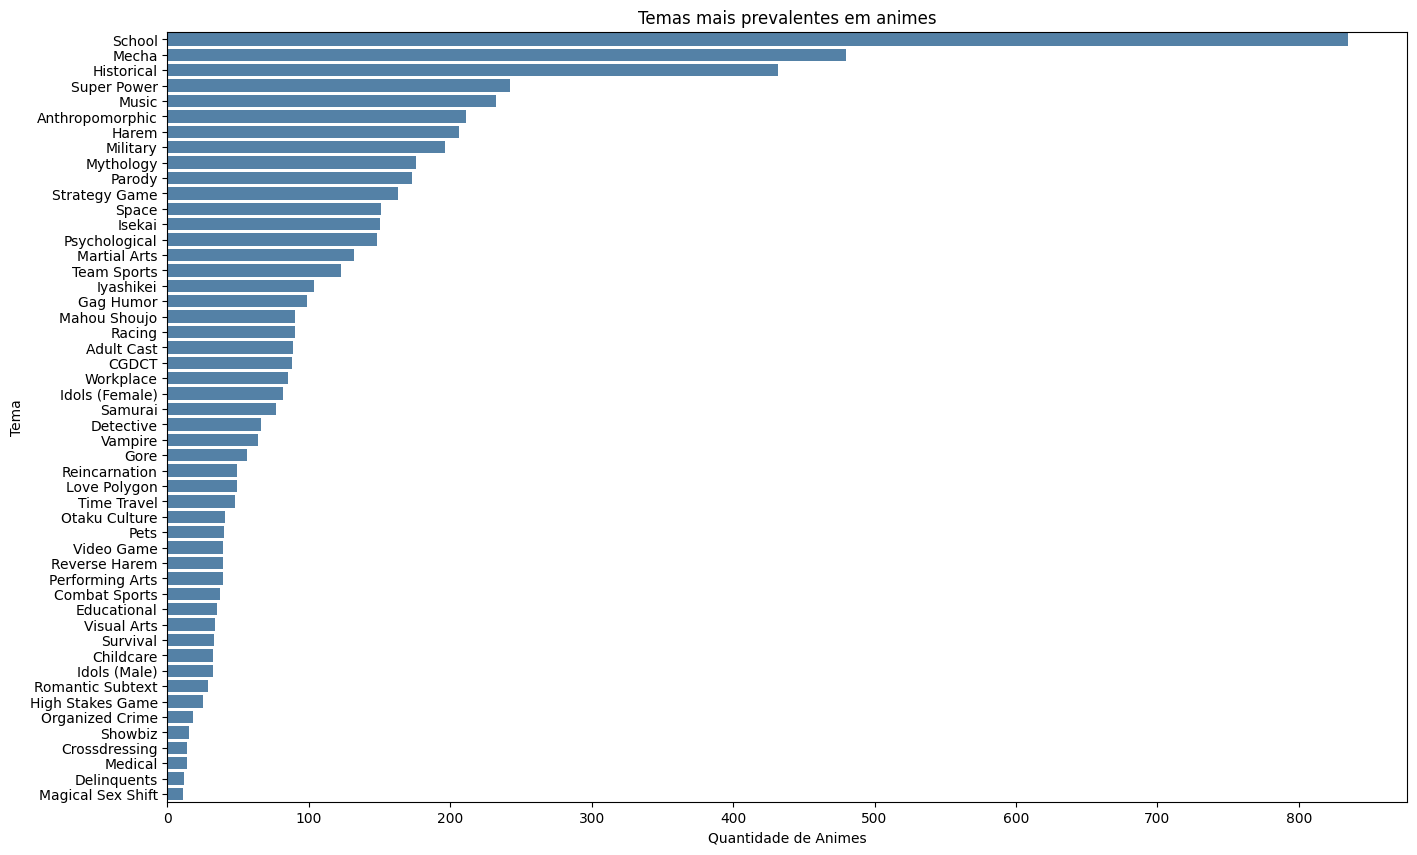

In [ ]:
plot_contagem_temas_presentes_animes()

## Contagem de Animes por Gênero

Quais os gêneros mais comuns entre animes?

Também podemos responder uma pergunta semelhate: "Quais os gêneros mais comuns entre animes?".

Usaremos uma lógica parecida. Iremos contar a quantidade de cada anime de um determinado gênero.

In [ ]:
def plot_contagem_animes_por_genero():
  df_generos = criar_dataframe_com_generos_separados()

  df_generos = df_generos[["Title", "Genres", "Demographics", "Favorites", "Members", "Score", "Scored_Users"]]
  df_generos = df_generos[df_generos["Genres"] != "Unknown"].copy()

  df_contagem_animes_por_genero = (
                                    df_generos[["Genres", "Title"]].
                                      groupby("Genres").
                                      count().
                                      rename(columns = {"Title": "Quantidade_Animes"}).
                                      sort_values(by="Quantidade_Animes", ascending = False).
                                      reset_index()
                                  )

  plot = sns.barplot(df_contagem_animes_por_genero, x="Quantidade_Animes", y="Genres", color="steelblue")

  plot.set(title="Quantidade de Animes de determinado Gênero")
  plot.set_ylabel("Gênero")
  plot.set_xlabel("Quantidade de Animes")

  plt.show()

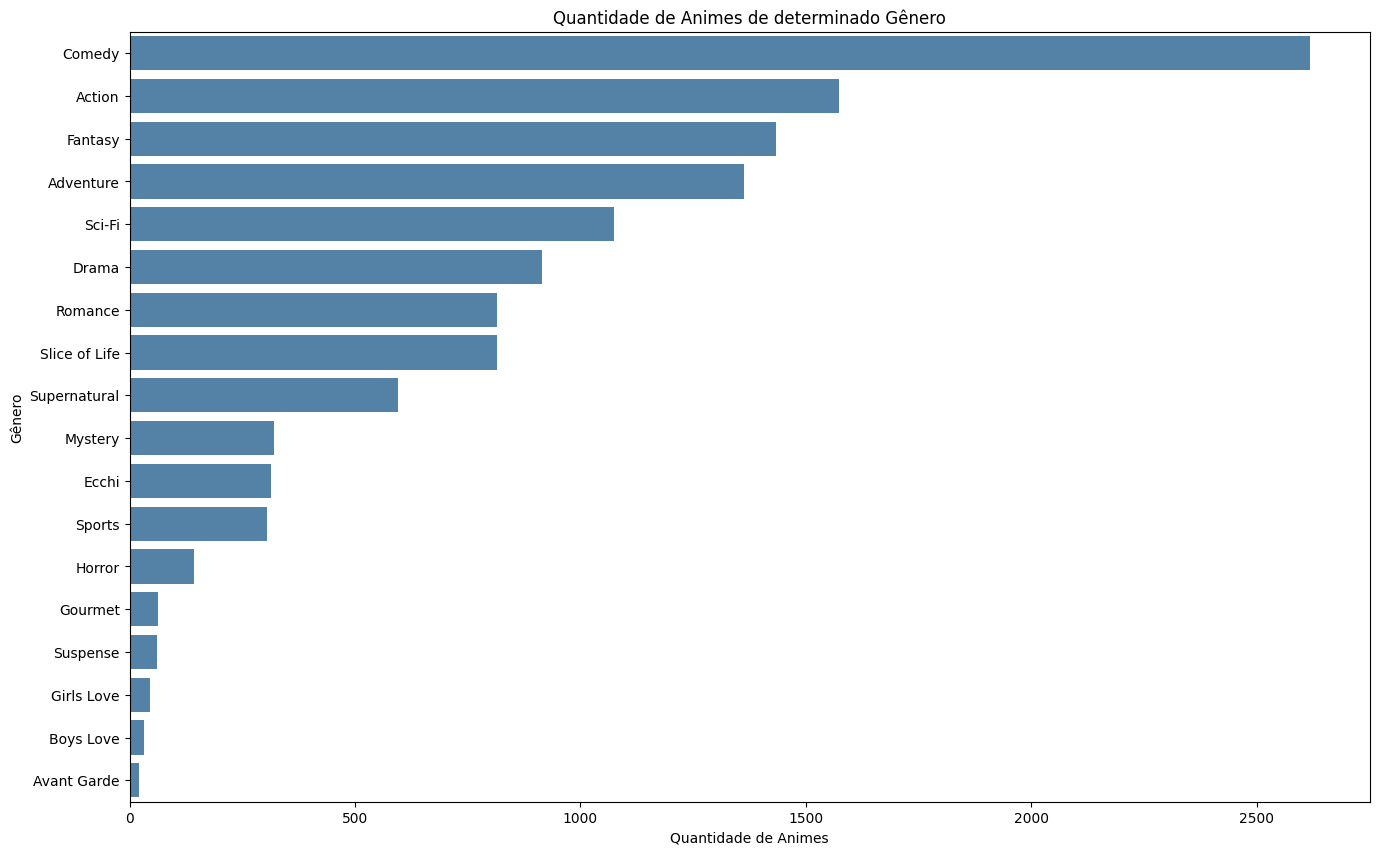

In [ ]:
plot_contagem_animes_por_genero()

## Gêneros Mais Bem Avaliados

Quais são os gêneros mais bem avaliados?

Outra pergunta que podemos responder é: "Quais os gêneros de animes melhores avaliados?".

Para isso, devemos definir qual métrica de comparação iremos utilizar. Nesta base, temos 3 métricas:

*   **Score**: Nota média atribuida com base nas avaliações dos usuários (Scored_Users é a quantidade de usuários que deram uma nota para determinado anime).

*   **Members**: A quantidade de usuários que adicionaram aquele anime a sua lista do My Anime Liste.

*   **Favorites**: A quantidade de usuários que marcaram aquele anime como favorito.

Além disso, podemos utilizar tanto a média quanto a mediana para essa comparação.

In [ ]:
def descrever_animes_por_genero_e(coluna_alvo):
  df_generos = criar_dataframe_com_generos_separados()

  df_generos = df_generos[["Title", "Genres", "Demographics", "Favorites", "Members", "Score", "Scored_Users"]]
  df_generos = df_generos[df_generos["Genres"] != "Unknown"].copy()

  return df_generos[["Genres", coluna_alvo]].groupby("Genres").describe()

### Avaliando Gêneros por Média

In [ ]:
def plot_bar_por_genero(coluna, operacao):
  df_generos = criar_dataframe_com_generos_separados()
  df_medias_generos = (
                        df_generos.
                          groupby("Genres").
                          agg(operacao, numeric_only = True).
                          reset_index()
                      )

  df_medias_scores_generos = df_medias_generos[["Genres", coluna]].sort_values(by = coluna, ascending = False)
  plot = sns.barplot(df_medias_scores_generos, x="Genres", y=coluna, color="steelblue")

  plt.xticks(rotation=45)
  plt.show()

#### Avaliando Gêneros por Score

In [ ]:
descrever_animes_por_genero_e("Score")

Score                                                         
                count      mean       std    min     25%    50%     75%    max
Genres                                                                        
Action         1385.0  6.902892  0.801314  2.911  6.3810  6.911  7.4210  9.131
Adventure      1005.0  6.850254  0.708126  4.601  6.3610  6.821  7.2910  9.131
Avant Garde      18.0  6.780444  0.827892  5.761  6.1310  6.626  7.2185  8.341
Boys Love        30.0  7.037667  0.694631  4.881  6.7110  7.031  7.4785  8.341
Comedy         1930.0  6.819870  0.783989  3.151  6.3110  6.851  7.3410  9.121
Drama           863.0  7.197709  0.741968  4.801  6.7060  7.221  7.6510  9.131
Ecchi           301.0  6.685485  0.626800  4.521  6.3210  6.711  7.0610  8.731
Fantasy         990.0  6.874010  0.753224  3.301  6.3810  6.886  7.3610  9.131
Girls Love       42.0  6.950048  0.601031  5.341  6.5960  6.996  7.3910  7.921
Gourmet          55.0  6.749727  0.955813  4.591  6.2810  7.001  7.5260  8.171
Horror          133.0  6.705737  0.862711  3.301  6.3110  6.841  7.2410  8.541
Mystery         294.0  7.229299  0.772751  3.291  6.7435  7.246  7.7660  8.891
Romance         769.0  7.067450  0.652221  4.601  6.6310  7.121  7.4810  9.031
Sci-Fi          867.0  6.821761  0.756121  2.911  6.3310  6.811  7.2660  9.081
Slice of Life   646.0  6.955567  0.792587  4.471  6.4310  6.971  7.5385  8.951
Sports          247.0  7.011162  0.809002  4.711  6.4360  6.961  7.4960  8.791
Supernatural    548.0  7.090544  0.802234  3.291  6.5960  7.121  7.5910  9.031
Suspense         60.0  7.585833  0.899767  4.651  7.1810  7.631  8.2510  9.121

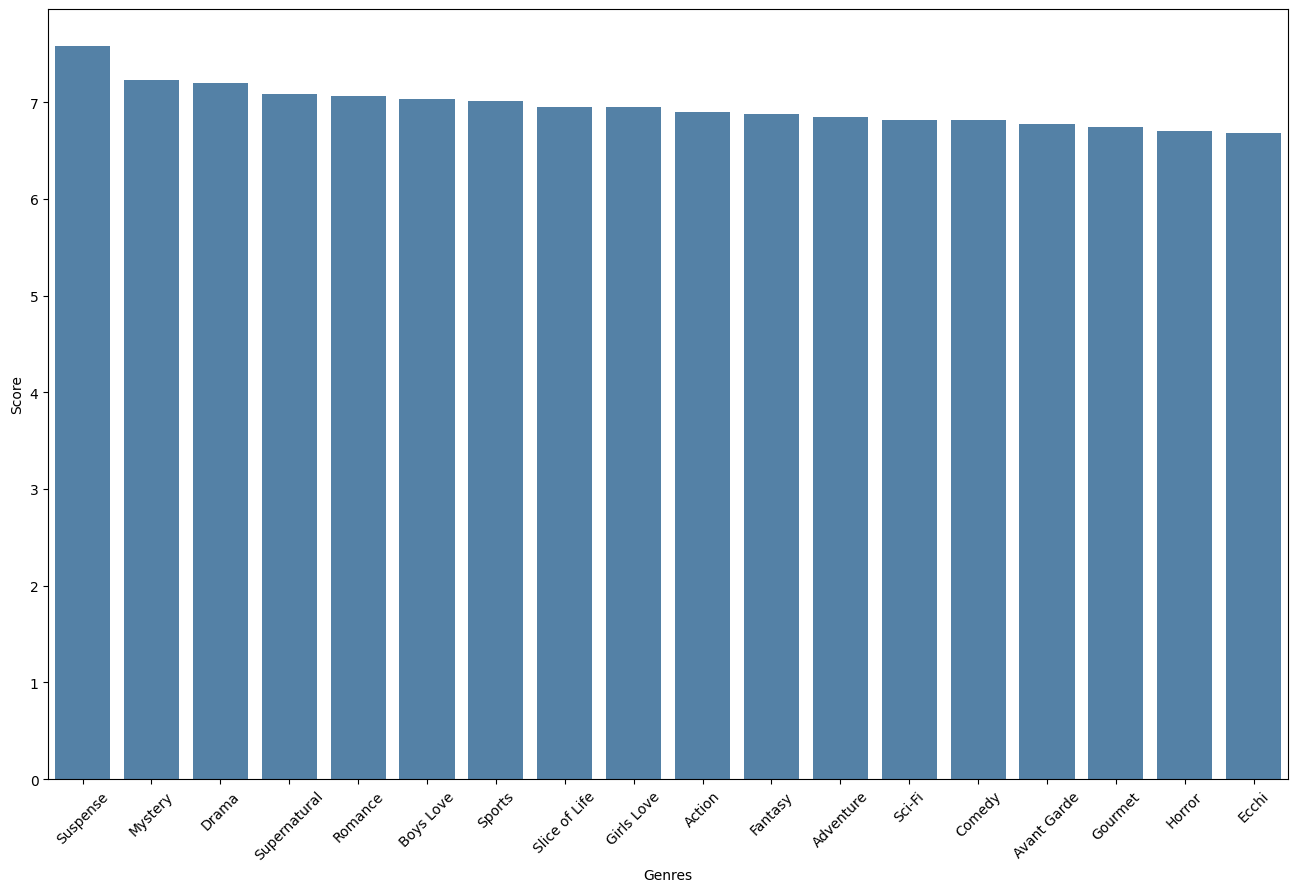

In [ ]:
plot_bar_por_genero("Score", "mean")

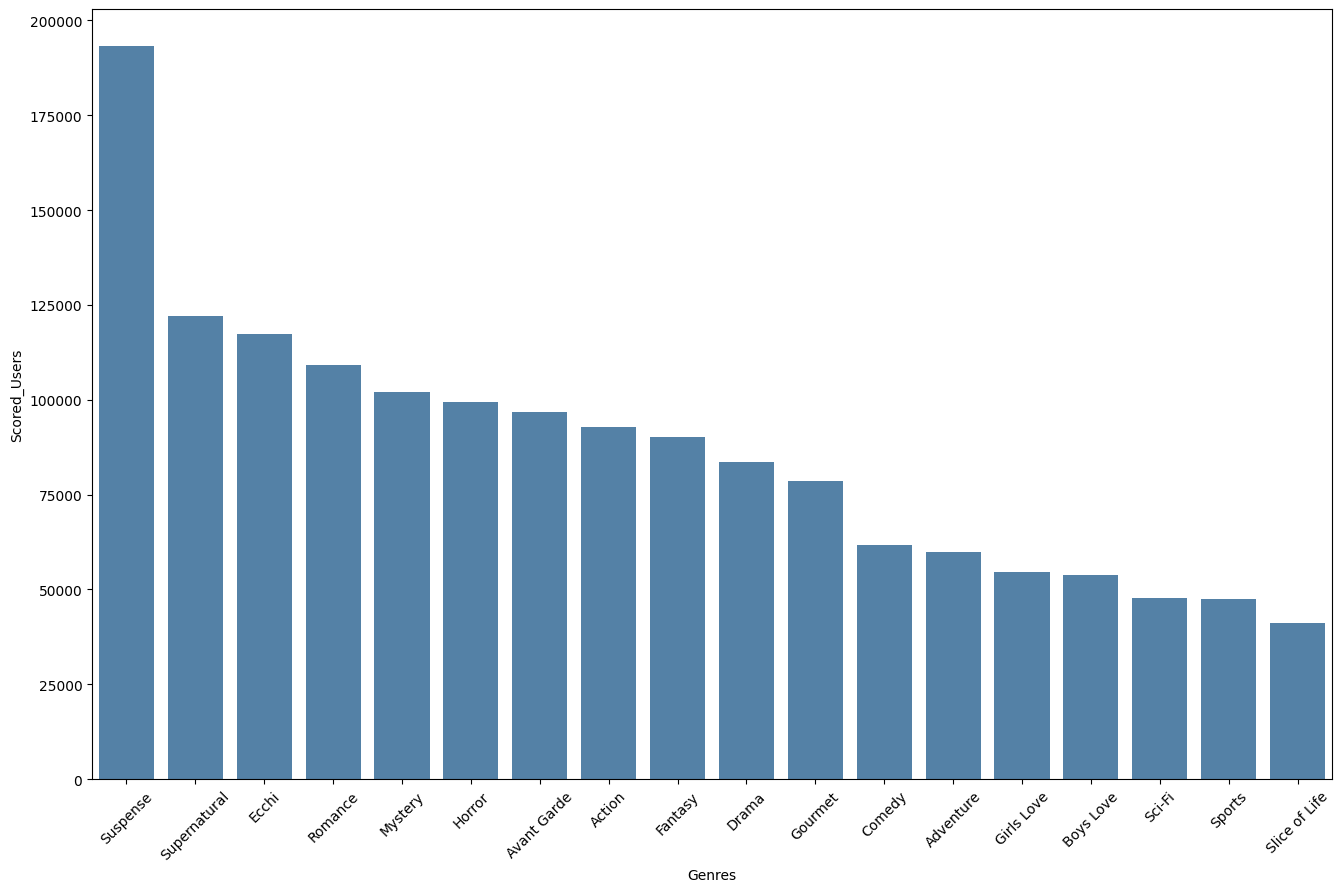

In [ ]:
plot_bar_por_genero("Scored_Users", "mean")

Comparando a média dos Scores, elas são bem próxmas entre os Gêneros, sendo que os Gênros de Mistério e Suspense foram os que tiveram maiores notas. Além disso, é possível notar que Suspense é o Gênero que mais recebe avaliações dos usuários.

#### Avaliando Gêneros por Quantidade de Membros

In [ ]:
descrever_animes_por_genero_e("Members")

Members                                                  \
                count           mean            std     min       25%   
Genres                                                                  
Action         1574.0  189067.040025  390925.452070    21.0   4451.50   
Adventure      1363.0   95736.596478  276893.290714    18.0    662.00   
Avant Garde      21.0  179267.619048  364282.442871  5424.0  17338.00   
Boys Love        32.0   99629.500000   98220.059326  3780.0  35568.25   
Comedy         2619.0   93688.337915  214951.519879    19.0    715.00   
Drama           915.0  182153.980328  357652.545033    23.0  11723.50   
Ecchi           313.0  216363.952077  277978.354095   359.0  35208.00   
Fantasy        1433.0  139995.635031  327334.012694    15.0    597.00   
Girls Love       45.0  115565.133333   99031.818059  2769.0  40130.00   
Gourmet          63.0  126178.730159  273987.873693    16.0   3027.00   
Horror          144.0  211510.729167  389250.219653   210.0  11562.00   
Mystery         321.0  209383.021807  299232.824212    21.0  18276.00   
Romance         815.0  207740.473620  293660.893175   128.0  21316.50   
Sci-Fi         1075.0   88579.491163  226546.984503    21.0   1322.50   
Slice of Life   814.0   72787.606880  152897.559353    24.0   1512.75   
Sports          305.0   78621.727869  192203.270630    18.0   1330.00   
Supernatural    596.0  236700.083893  355553.228239    23.0  22304.75   
Suspense         61.0  537264.868852  679650.152312  3659.0  87144.00   

                                               
                    50%        75%        max  
Genres                                         
Action          36388.5  175576.25  3524109.0  
Adventure        4950.0   45716.50  2978455.0  
Avant Garde     34824.0  119527.00  1606315.0  
Boys Love       73803.5  137043.75   489421.0  
Comedy           9764.0   79476.00  2879907.0  
Drama           50802.0  176938.50  3524109.0  
Ecchi          120357.0  306379.00  2201000.0  
Fantasy         14392.0  119285.00  2978455.0  
Girls Love      95472.0  165668.00   468304.0  
Gourmet         15510.0   79858.50  1512757.0  
Horror          46163.5  216951.75  2556441.0  
Mystery         94126.0  286811.00  1879761.0  
Romance         99430.0  280978.00  2813565.0  
Sci-Fi          10925.0   65269.00  2299690.0  
Slice of Life   18083.0   78823.75  1560150.0  
Sports          13781.0   66038.00  1751173.0  
Supernatural   109558.0  290512.75  3504535.0  
Suspense       280934.0  736092.00  3504535.0

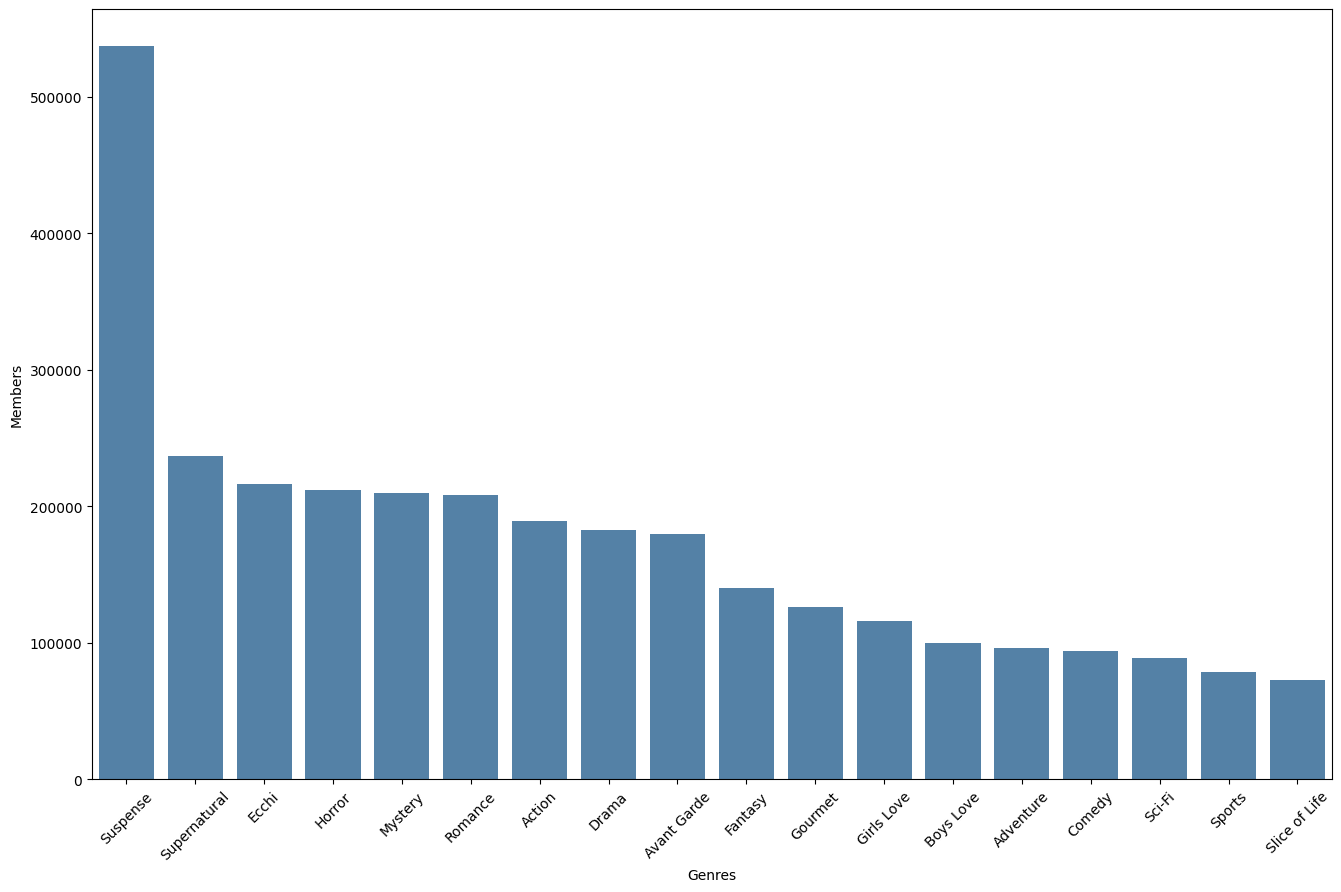

In [ ]:
plot_bar_por_genero("Members", "mean")

Entre os diferentes Gêneros, os animes de Suspense tendem a ter mais Membros inscritos em média que os outros.

#### Avaliando Gêneros por Favoritos

In [ ]:
descrever_animes_por_genero_e("Favorites")

Favorites                                                   \
                  count          mean           std  min     25%     50%   
Genres                                                                     
Action           1574.0   2861.763024  12704.918196  0.0   10.00   109.0   
Adventure        1363.0   1675.983859  10803.456657  0.0    1.00    13.0   
Avant Garde        21.0   6337.952381  20818.618899  6.0   23.00   107.0   
Boys Love          32.0   1268.468750   2802.797945  3.0  151.50   338.5   
Comedy           2619.0    987.212295   4248.641193  0.0    1.00    19.0   
Drama             915.0   3448.313661  13686.407604  0.0   31.00   220.0   
Ecchi             313.0   1287.559105   4208.500962  0.0   49.00   251.0   
Fantasy          1433.0   2000.364969  11076.569409  0.0    1.00    36.0   
Girls Love         45.0    783.955556   1148.276910  9.0  103.00   405.0   
Gourmet            63.0    693.206349   2938.753824  0.0    4.50    36.0   
Horror            144.0   2236.409722   6167.763737  0.0   18.75   105.5   
Mystery           321.0   2865.401869   6808.636587  0.0   55.00   345.0   
Romance           815.0   2204.512883   6459.285779  0.0   51.00   354.0   
Sci-Fi           1075.0   1360.145116   8511.521370  0.0    2.00    26.0   
Slice of Life     814.0    804.830467   3238.556694  0.0    2.00    39.5   
Sports            305.0   1029.563934   4686.337413  0.0    2.00    42.0   
Supernatural      596.0   3012.651007   9580.595263  0.0   41.75   357.5   
Suspense           61.0  13615.983607  31493.437452  4.0  436.00  2823.0   

                                   
                    75%       max  
Genres                             
Action           824.25  207772.0  
Adventure        177.50  207772.0  
Avant Garde      763.00   94328.0  
Boys Love       1149.00   15493.0  
Comedy           277.00   73405.0  
Drama           1312.00  207772.0  
Ecchi            940.00   46672.0  
Fantasy          467.00  207772.0  
Girls Love       898.00    5509.0  
Gourmet          370.50   23156.0  
Horror          1072.25   47433.0  
Mystery         2174.00   46837.0  
Romance         1506.50   80730.0  
Sci-Fi           252.00  175248.0  
Slice of Life    311.00   53631.0  
Sports           289.00   68055.0  
Supernatural    1585.75  159701.0  
Suspense       10881.00  175248.0

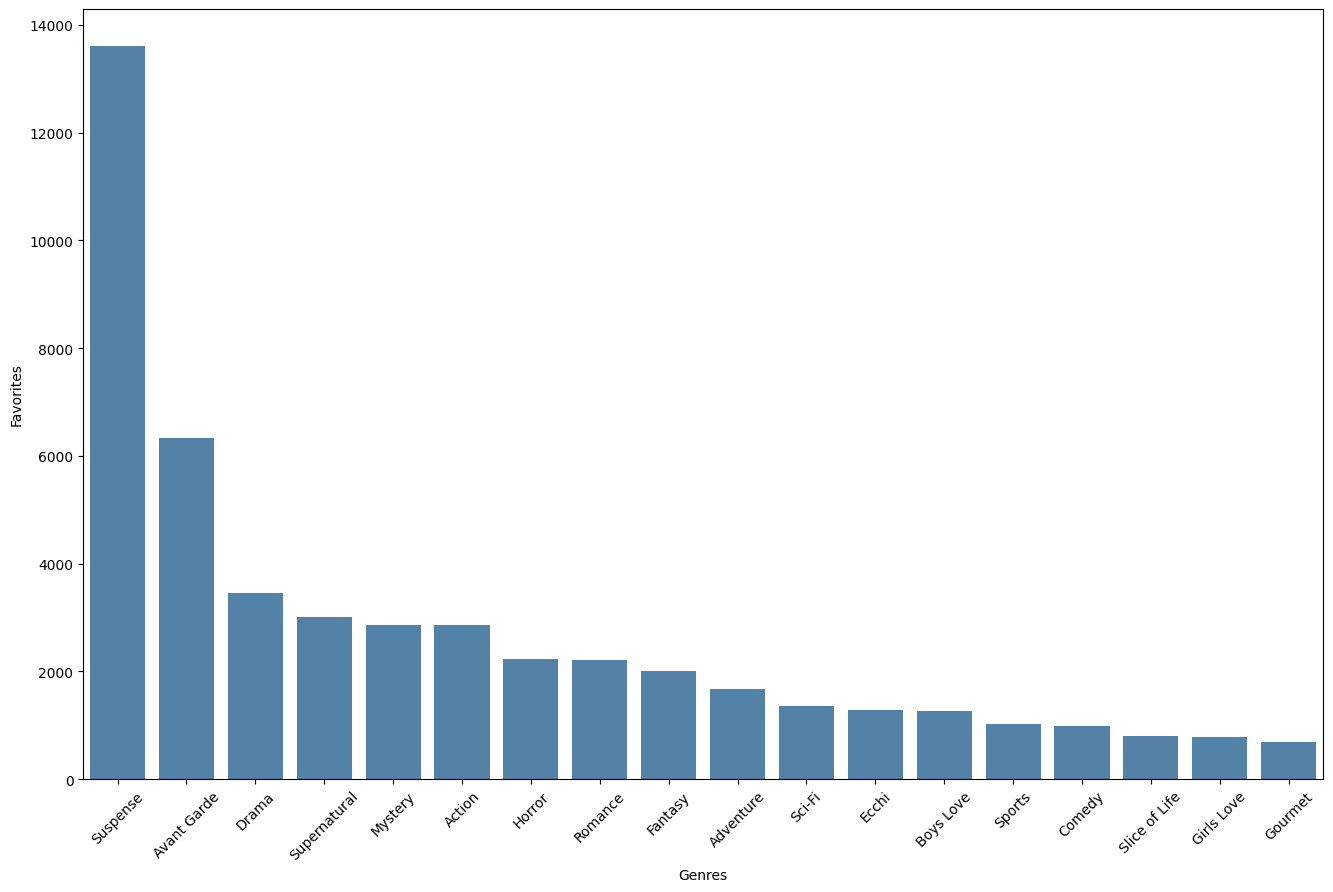

In [ ]:
plot_bar_por_genero("Favorites", "mean")

Já considerando a quantidade de Favoritos, novamente, Suspense foi aquele que recebeu mais favoritos em média pelos usuários.

### Avaliando Gêneros por Mediana

É possível notar pelos describes de cada um que o desvio padrão para o Score, Memebers e Favorites é grande. Por isso, achamos interessante também comparar Gêneros com base na mediana, uma vez que ela não é sensível aos outliers.

#### Avaliando Gêneros por Score

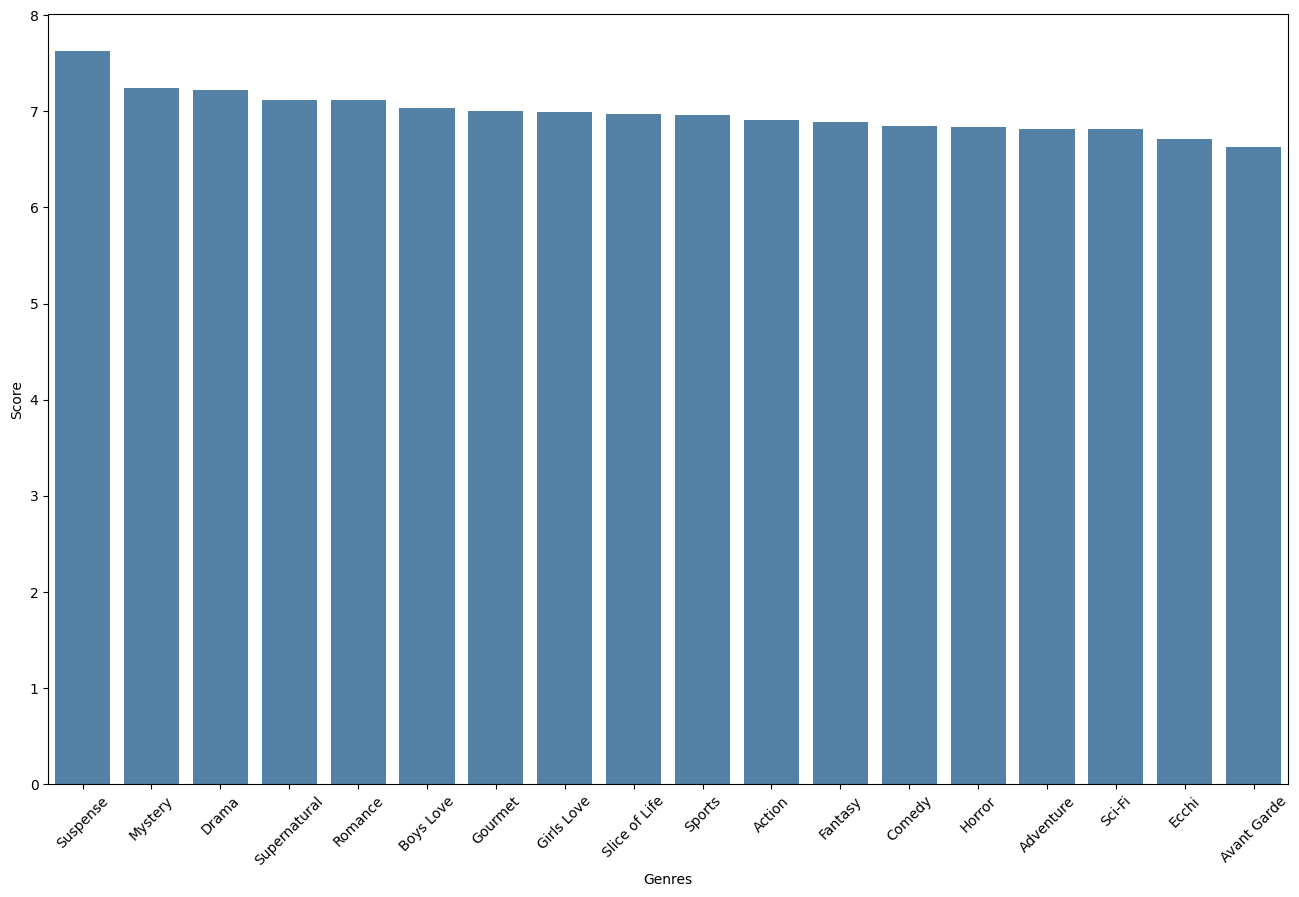

In [ ]:
plot_bar_por_genero("Score", "median")

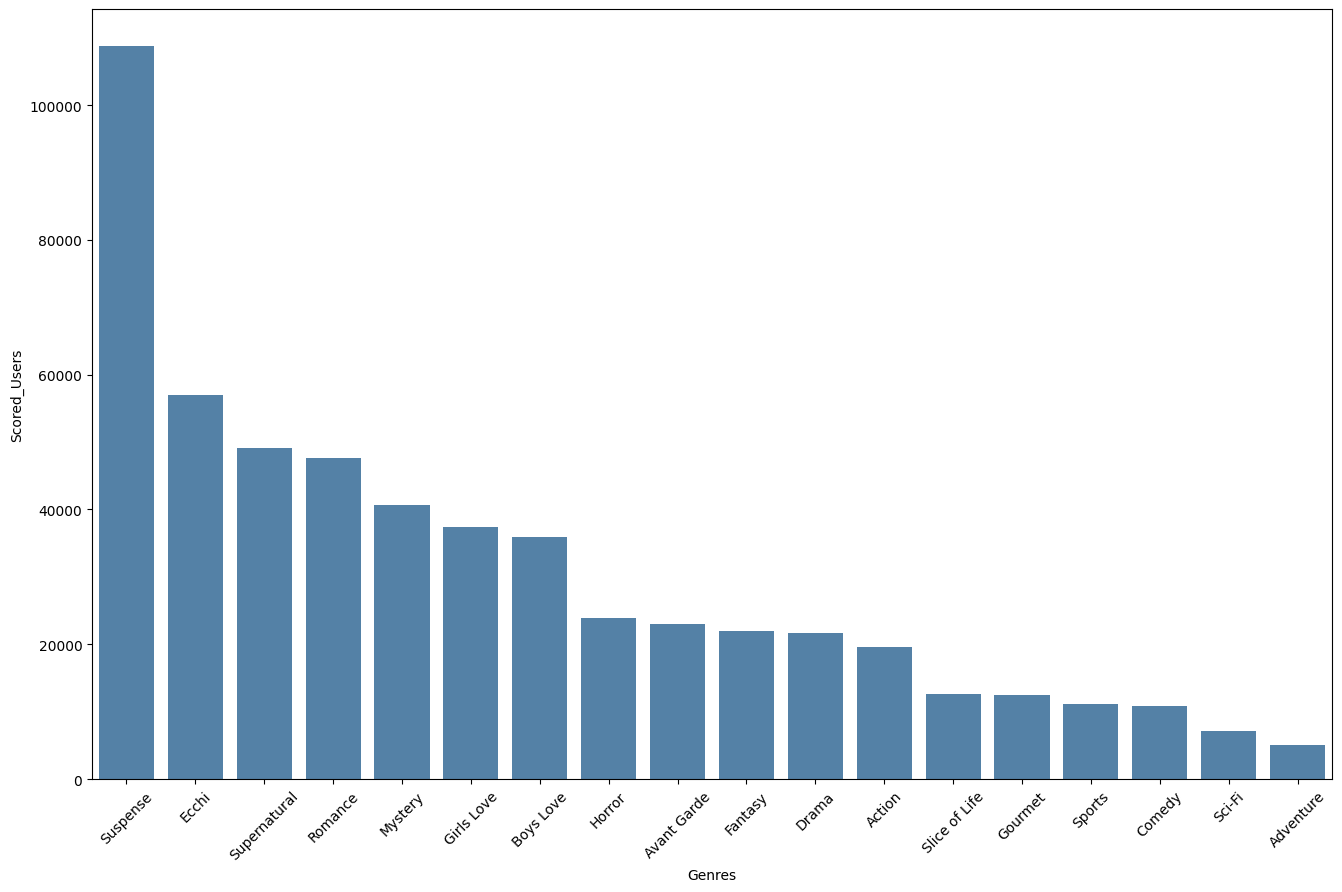

In [ ]:
plot_bar_por_genero("Scored_Users", "median")

#### Avaliando Gêneros por Quantidade de Membros

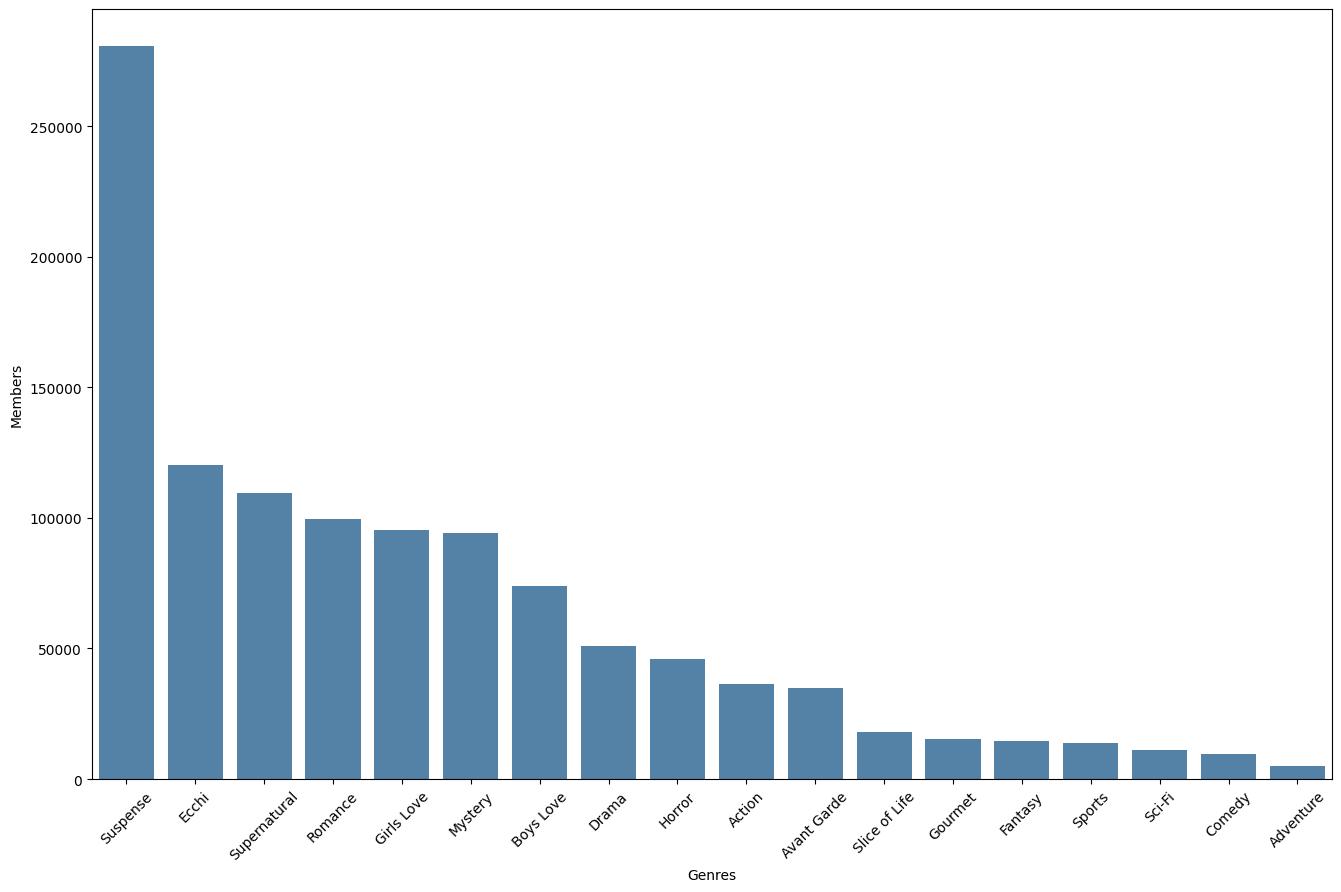

In [ ]:
plot_bar_por_genero("Members", "median")

#### Avaliando Gêneros por Favoritos

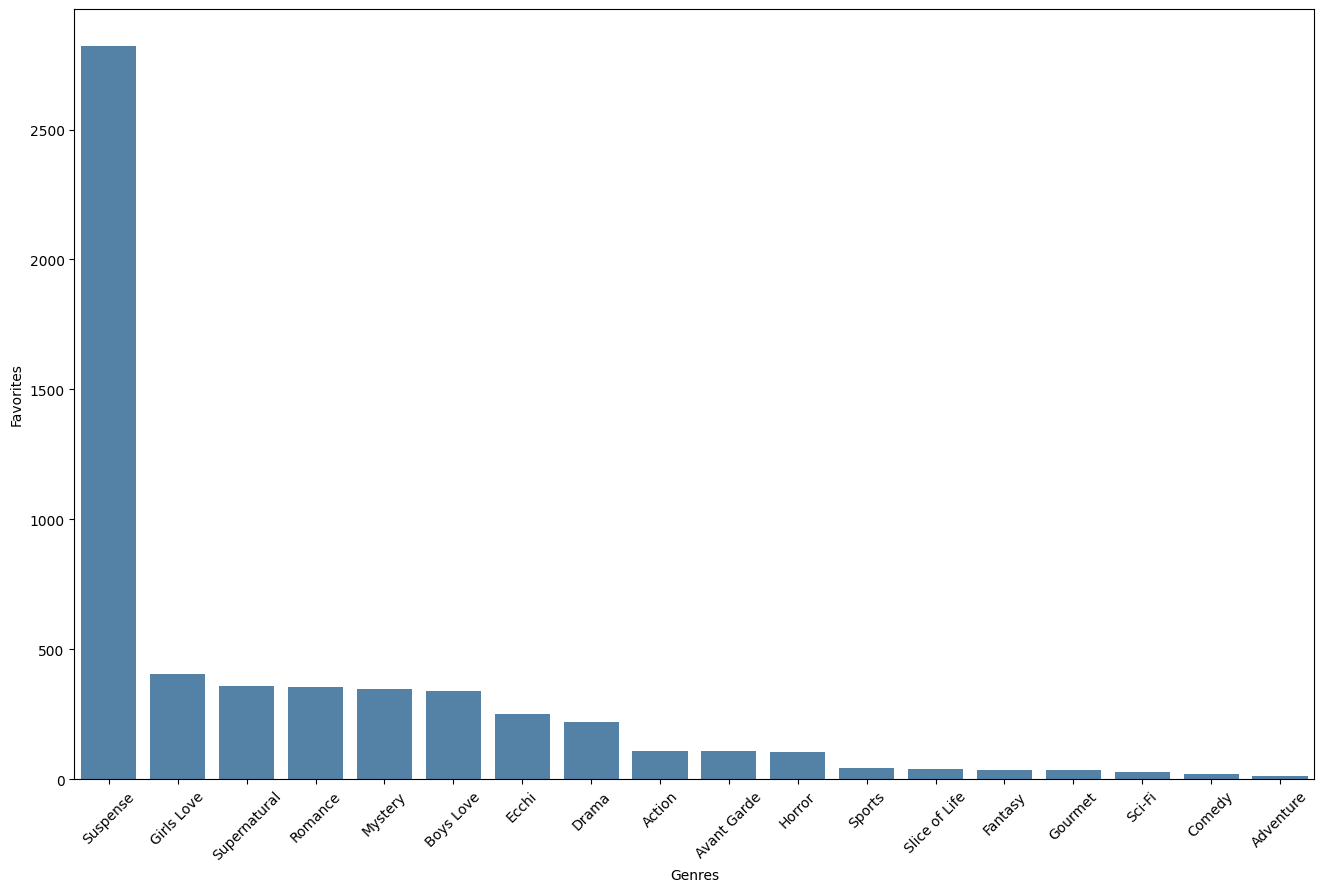

In [ ]:
plot_bar_por_genero("Favorites", "median")

Após essas análise, é possível perceber que independente de avaliarmos pela média ou pela mediana, temos que suspense é o Gênero mais bem avaliado nos três quesitos.

## Análises por Demografias

Será que esses interesses variam de acordo com o públic alvo?

### Avaliando Gêneros por Demografias

A popularidade de Gêneros se mantem entre as diferentes demografias de animes?

Uma questão muito comum em animes e produções japonesas é separar as obras por demografias. Elas são agrupadas da seguinte forma:

*   **Shounen:** São as produções voltadas ao público masculino jovem/adoslecente
*   **Shoujo:** São as produções voltadas ao público feminino jovem/adoslecente

*   **Seinen:** São as produções voltadas ao público masculino adulto
*   **Josei:** São as produções voltadas ao público feminino adulto

*   **Kids:** São as produções para o público infantil

Nós comparamos os Scores médios de cada Gênenro para cada Demografia. Além disso, realizamos o plot das demografias voltadas a uma faixa étaria em comum.

#### Realiza comparação da quantidade média de Membros por de Gênero para as Demografias jovens


In [ ]:
def plot_line_baseado_grupo_demografia(demografia_1, demografia_2):
  df_separado = criar_dataframe_com_todos_grupos_separados()
  df_separado = df_separado[df_separado["Genres"] != "Unknown"]

  filtro_demografia_1 = (df_separado["Demographics"] == demografia_1)
  filtro_demografia_2 = (df_separado["Demographics"] == demografia_2)

  df_demografia = df_separado[filtro_demografia_1 | filtro_demografia_2]

  dados_plot_demografia = (
                            df_demografia.
                              groupby(["Demographics", "Genres"]).
                              mean(numeric_only = True)
                          )

  plot = sns.lineplot(data=dados_plot_demografia, x="Genres", y="Members", hue="Demographics", marker="o")
  plt.xticks(rotation=45)
  plt.show()

  dados_plot_demografia = dados_plot_demografia.reset_index()

  return

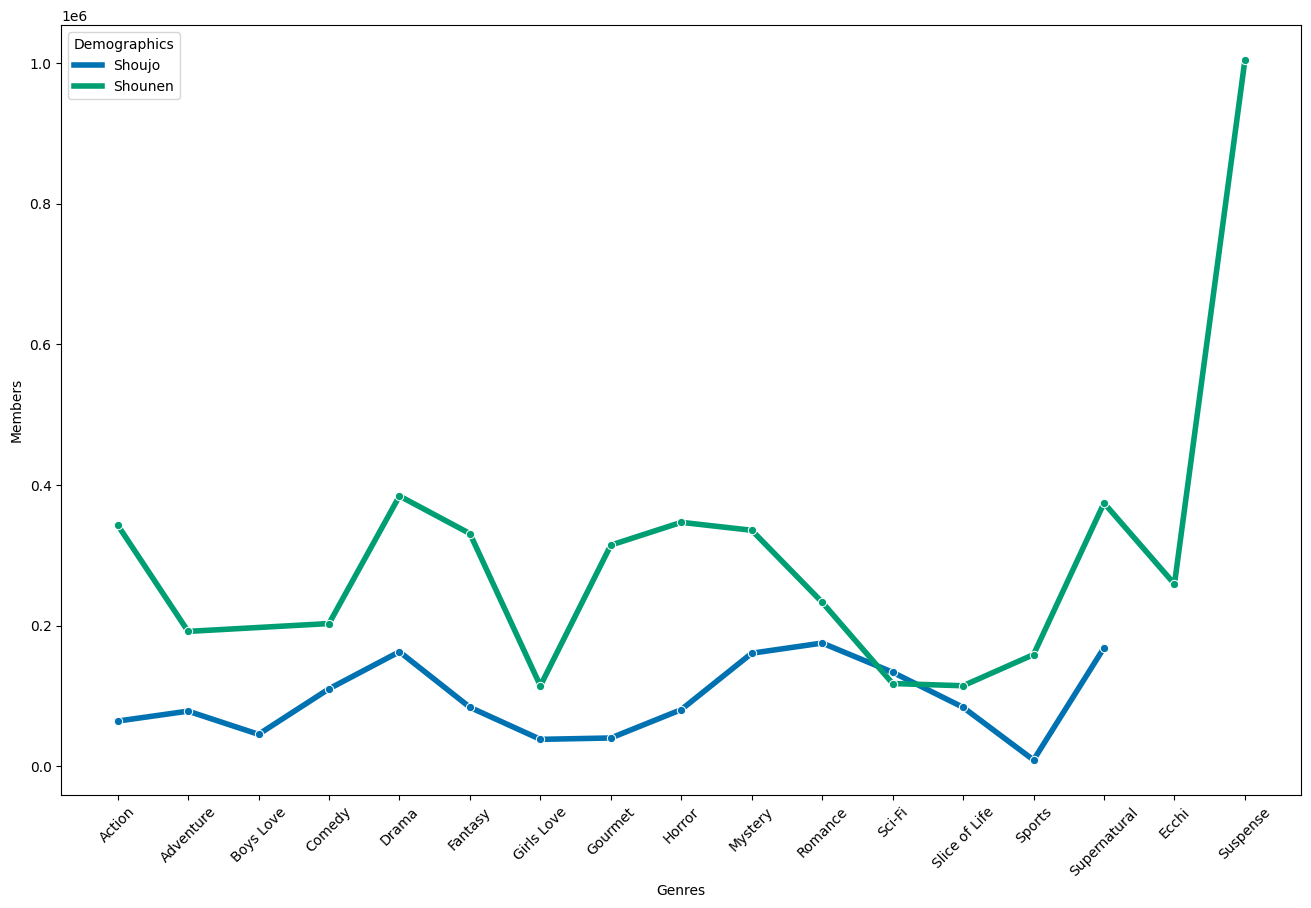

In [ ]:
plot_line_baseado_grupo_demografia("Shounen", "Shoujo")

#### Realiza comparação da quantidade média de Membros por Gênero para as Demografias adultas

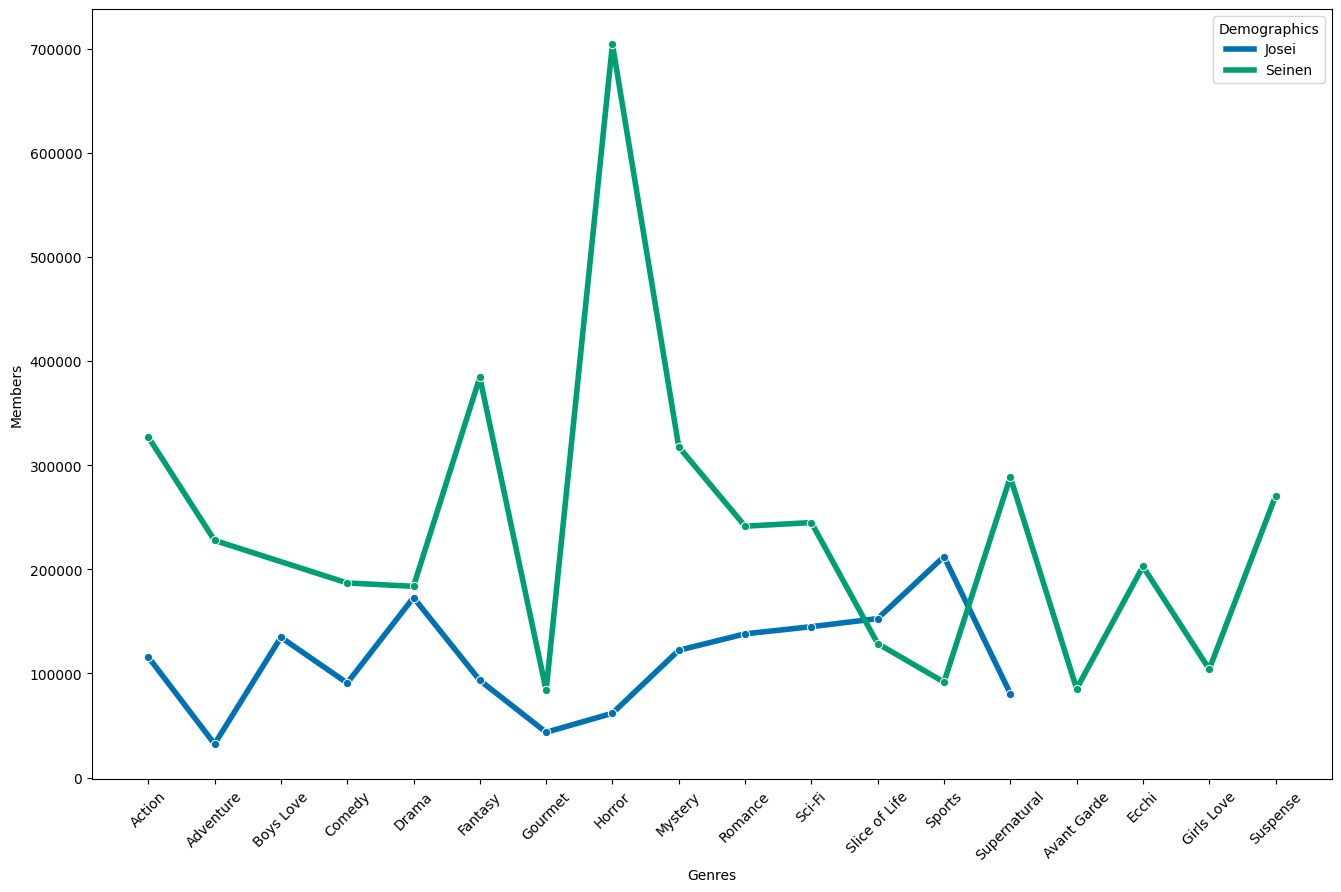

In [ ]:
plot_line_baseado_grupo_demografia("Seinen", "Josei")

#### Realiza comparação da quantidade média de Membros por Gênero para a Demografia infantil

In [ ]:
def plot_generos_por_demografia_infantil():
  df_separado = criar_dataframe_com_todos_grupos_separados()
  df_separado = df_separado[df_separado["Genres"] != "Unknown"]

  df_demografia_infatil = df_separado[df_separado["Demographics"] == "Kids"]

  dados_plot_demografia_infantil = (
                                      df_demografia_infatil.
                                        groupby(["Demographics", "Genres"]).
                                        mean(numeric_only = True).
                                        sort_values(by="Members", ascending=False).
                                        reset_index()
                                    )

  plot = sns.barplot(data=dados_plot_demografia_infantil, x="Genres", y="Members", color="steelblue")
  plt.xticks(rotation=45)
  plt.show()

  return

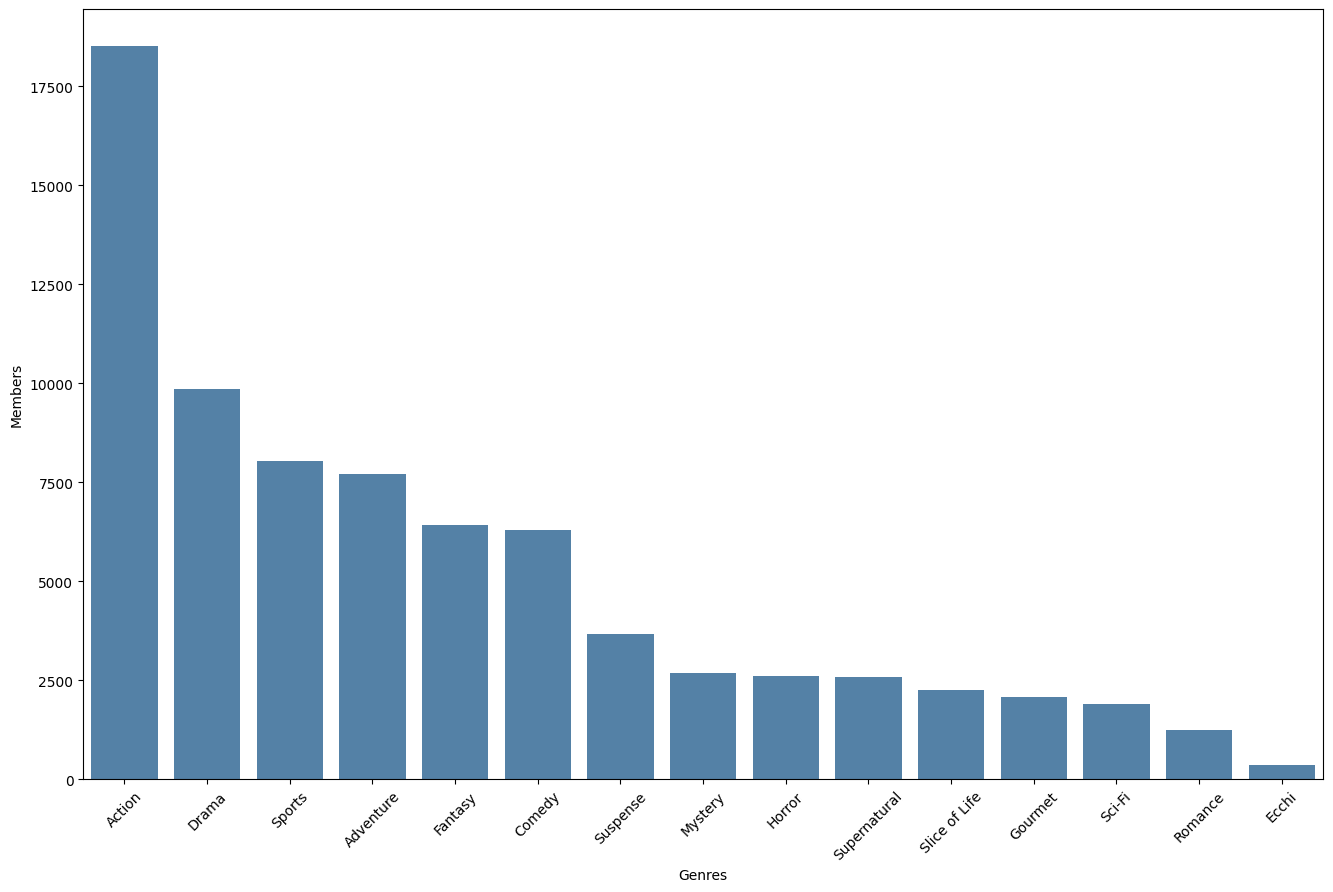

In [ ]:
plot_generos_por_demografia_infantil()

Com isso, conseguimos verificar quais Gêneros são mais prevalentes sobre cada demografia e como eles alternam entre elas.

### Avaliando Temas por Demografia

Os temas mais comuns em animes mudam de acordo com a demografia alvo?

Agora que já conhecemos as Demografias e já tivemos uma análise geral dos Gêneros e Temas. Podemos ver também se existe algum Tema de anime que é mais comum entre certas demografias.

In [ ]:
def plot_bar_temas_por_demografia(demografia):
  df_temas_demografia = criar_dataframe_com_todos_grupos_separados()
  df_temas_demografia = df_temas_demografia[df_temas_demografia["Themes"] != "Unknown"]

  dados_plot = (
                  df_temas_demografia.loc[df_temas_demografia["Demographics"] == demografia, ["Themes", "Title"]].
                    groupby("Themes").
                    count().
                    rename(columns = {"Title": "Quantidade_Animes"}).
                    sort_values(by="Quantidade_Animes", ascending=False).
                    reset_index()
               )

  plot = sns.barplot(data=dados_plot, x="Quantidade_Animes", y="Themes", color="steelblue")
  plt.show()
  return

#### Temas mais prevalentes entre as Demografias jovens

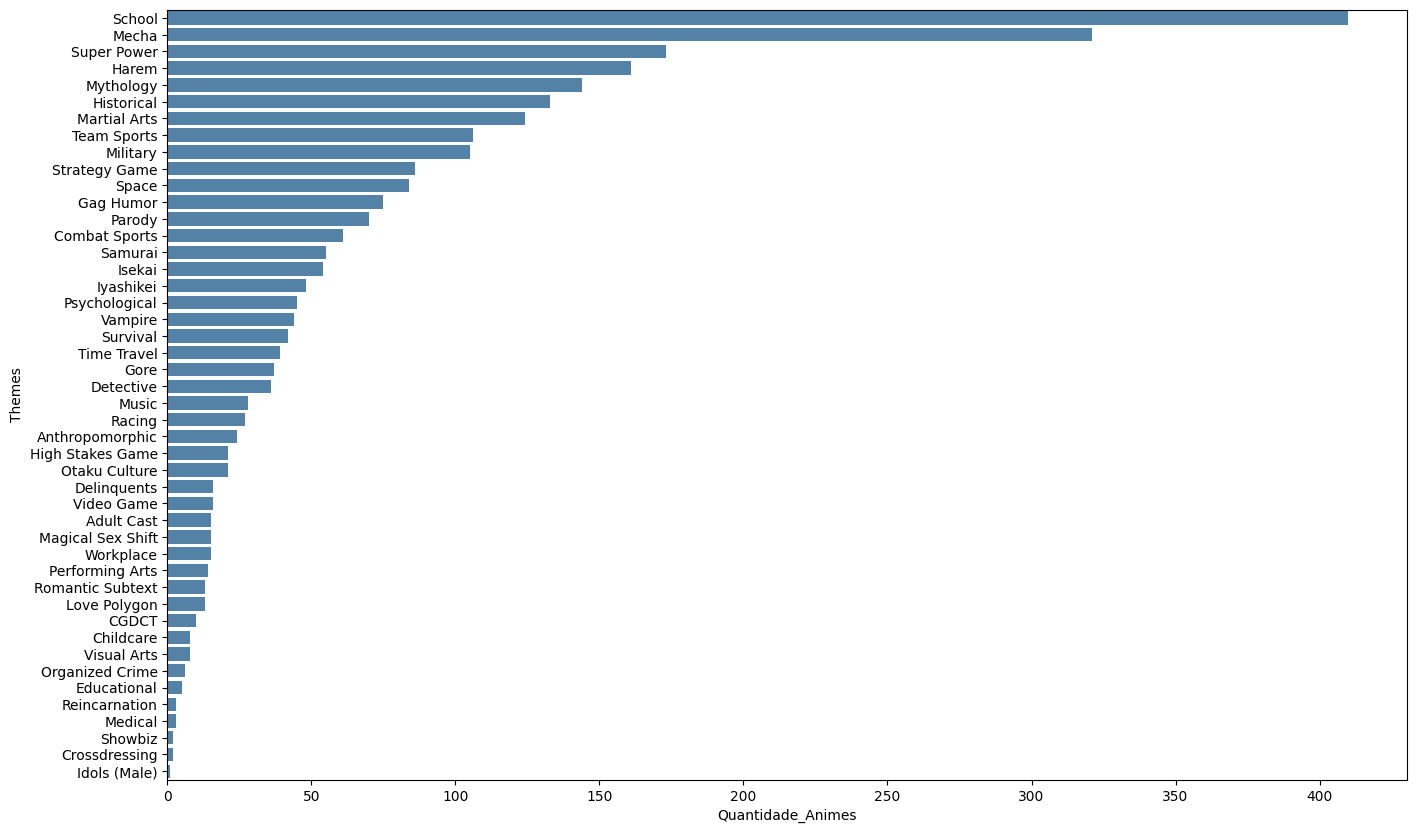

In [ ]:
plot_bar_temas_por_demografia("Shounen")

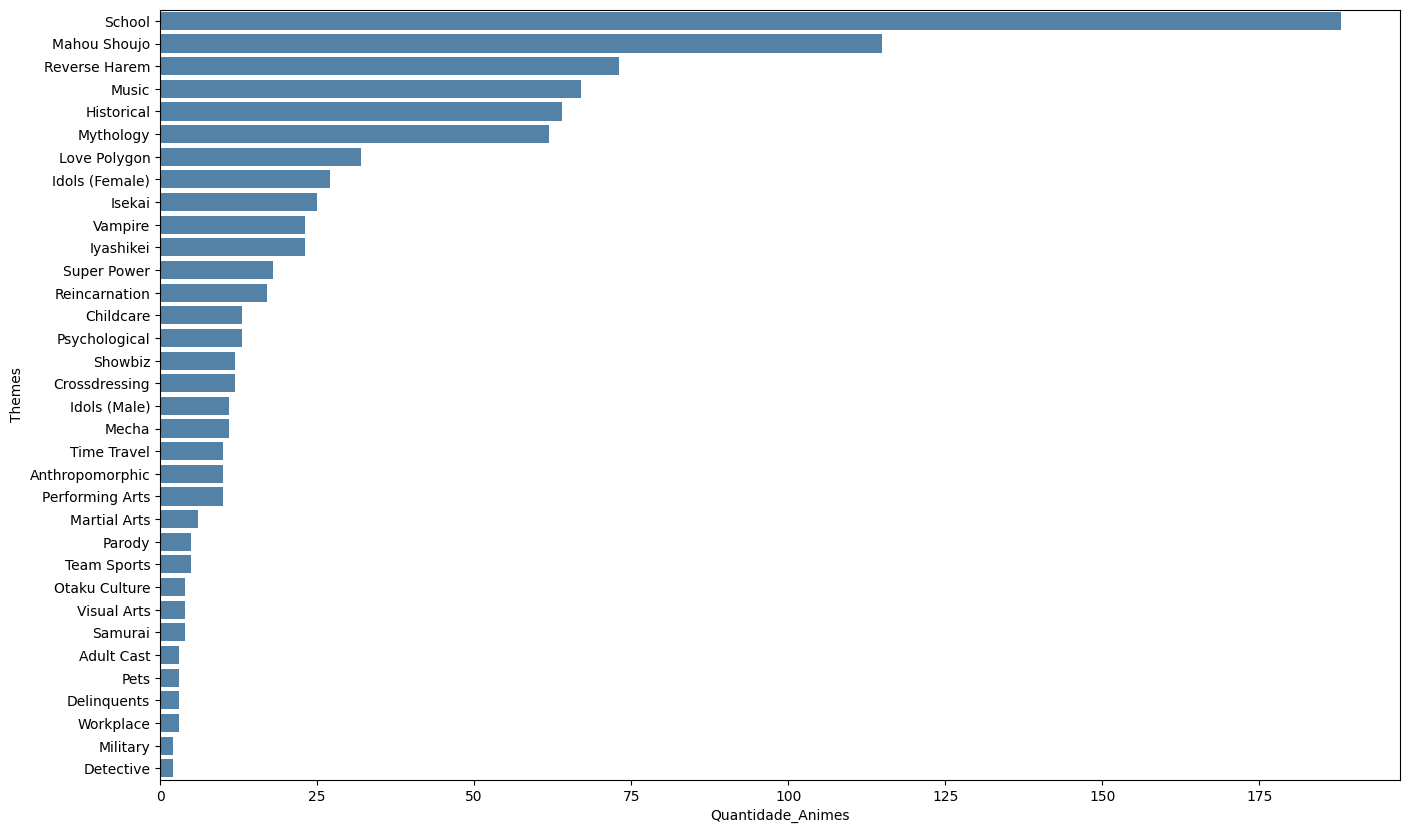

In [ ]:
plot_bar_temas_por_demografia("Shoujo")

#### Temas mais prevalentes entre as Demografias adultas

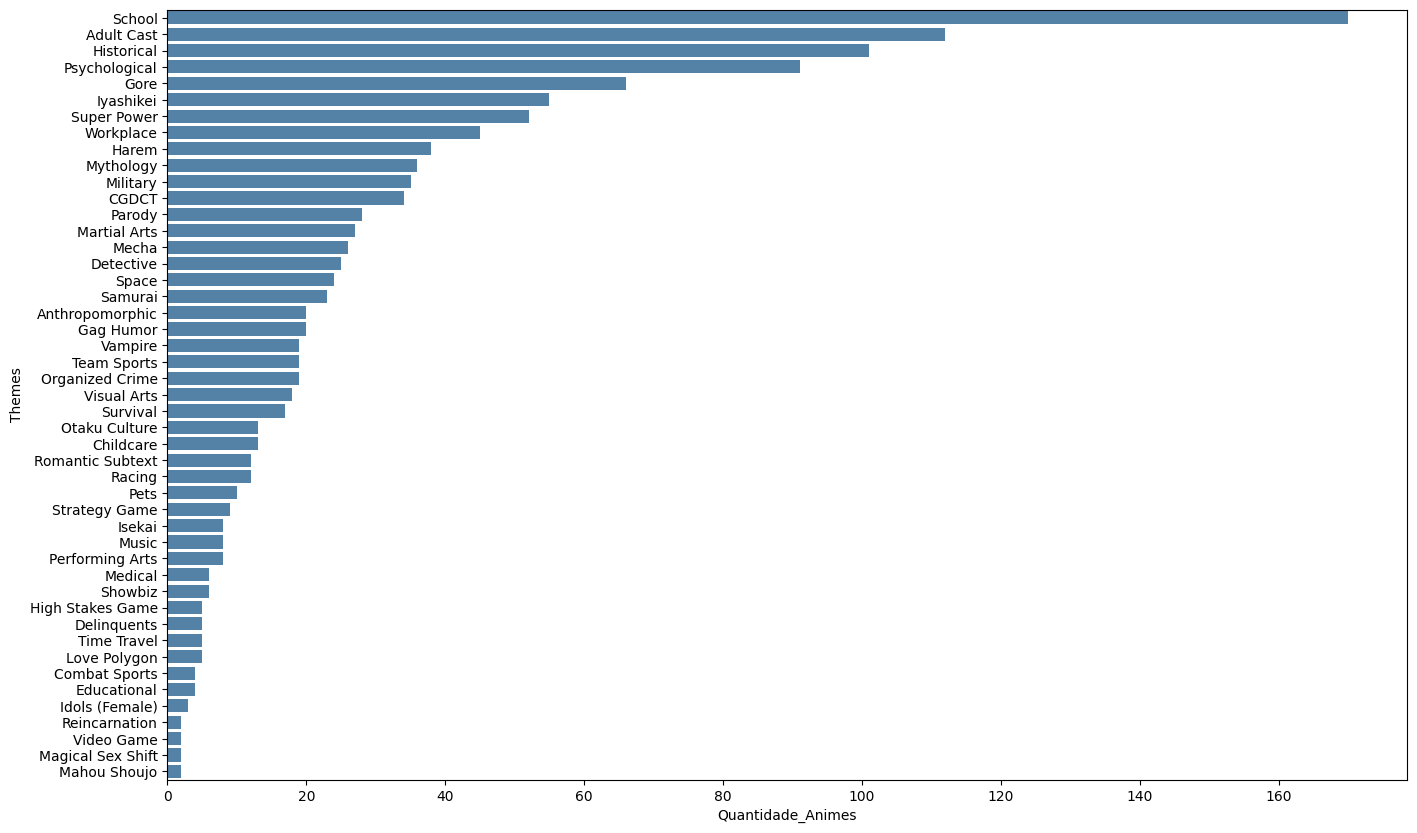

In [ ]:
plot_bar_temas_por_demografia("Seinen")

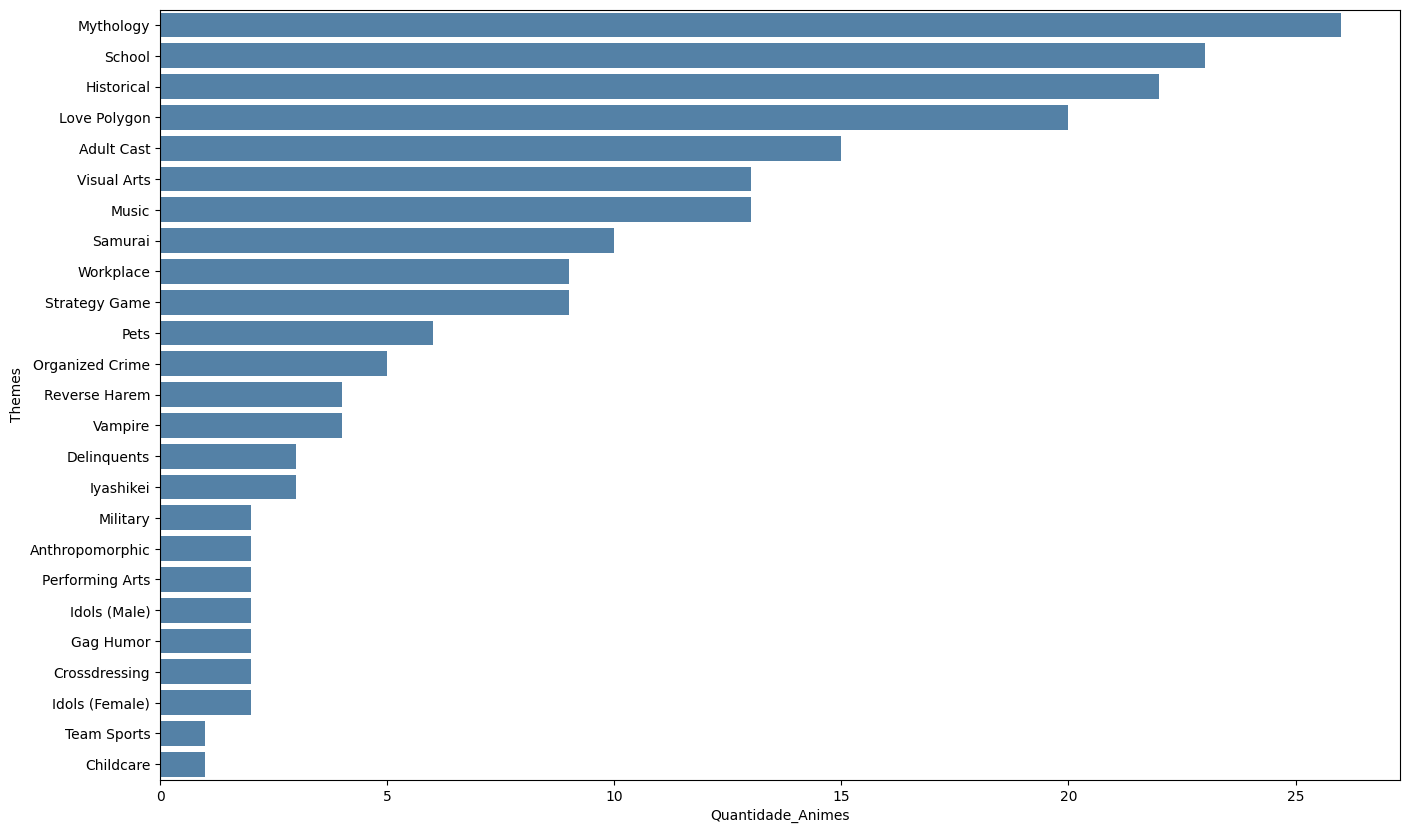

In [ ]:
plot_bar_temas_por_demografia("Josei")

#### Temas mais prevalentes para a Demografia infantil

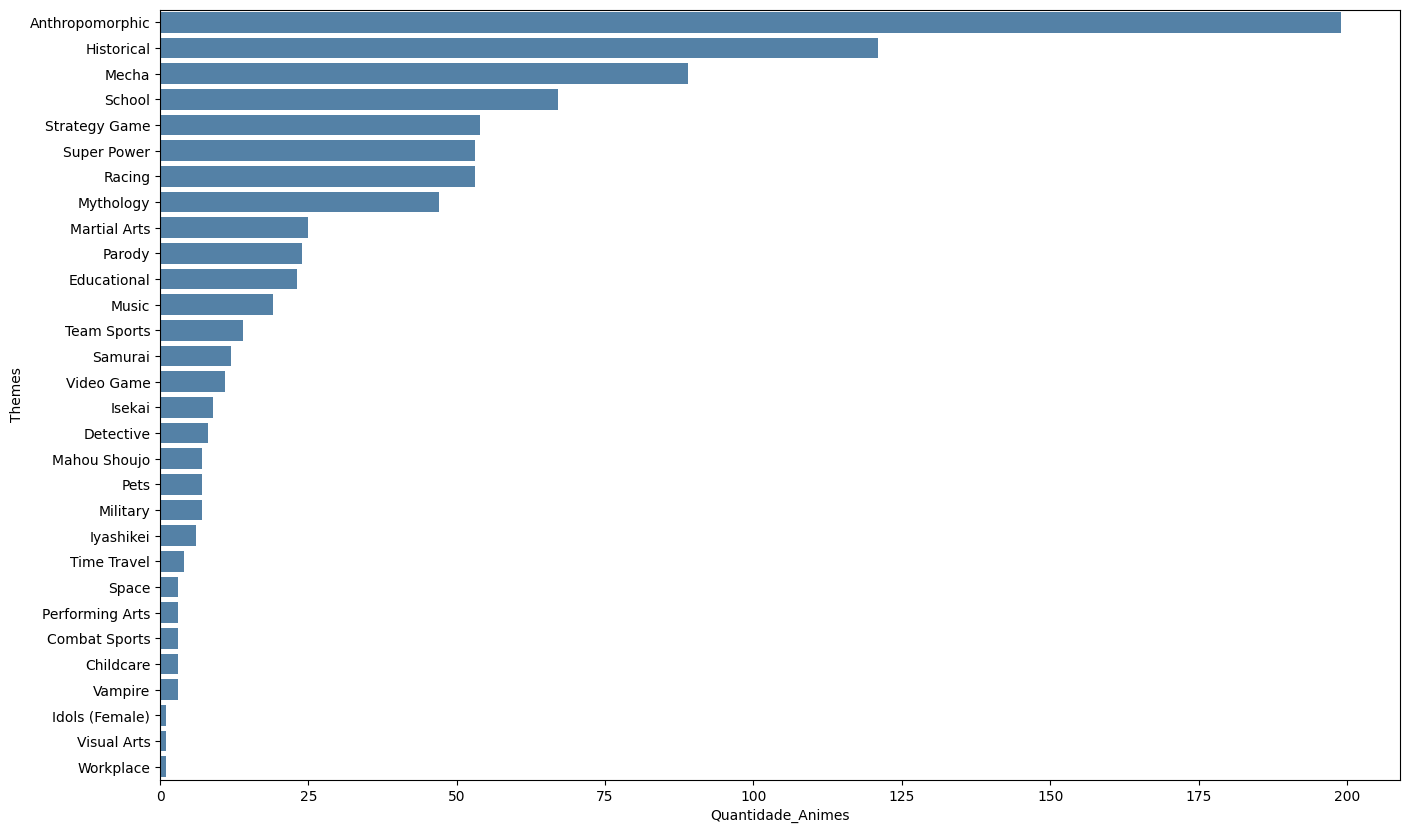

In [ ]:
plot_bar_temas_por_demografia("Kids")

Com isso, conseguimos verificar que tanto os Gêneros quanto os Temas são características que variam de acordo com o público alvo e que pode afetar diretamente a pouplaridade de um anime.

# Teste de Hipótese
___

## Teste de Permutação

No último tópico verificamos que os Gêneros e Temas aparentam ter uma influência sobre a recepção e popularidade de um anime.

Neste caso, queremos verificar se essa situação observada pode ser explicada pelo acaso. Para isso, iremos utilizar um Teste de Permutação, considerando o Gênero mais bem avaliado que foi o Suspense.

Primeiro, devemos separar entre os animes que são de Suspense e aqueles que não são desse Gênero.

In [ ]:
def separar_animes_suspense_nao_suspense():
  def identificar_animes_suspense(linha):
    genero_anime = linha["Genres"]

    if(genero_anime == "Suspense"):
      return 1

    return 0

  df_genero_animes = criar_dataframe_com_generos_separados()
  df_genero_animes = df_genero_animes[df_genero_animes["Genres"] != "Unknown"]

  df_ajustado = df_genero_animes[["Genres", "Members"]].copy()
  df_ajustado["identificador_suspense"] = df_ajustado.apply(identificar_animes_suspense, axis = 1)

  return df_ajustado.copy()

In [ ]:
def get_estatistica_observada_animes_suspense():
  df_filtrado = separar_animes_suspense_nao_suspense()
  df_medias = df_filtrado.groupby("identificador_suspense").mean(numeric_only = True).reset_index()

  media_animes_suspense = df_medias.loc[df_medias["identificador_suspense"] == 1, "Members"].iloc[0]
  media_animes_nao_suspense = df_medias.loc[df_medias["identificador_suspense"] == 0, "Members"].iloc[0]

  return (media_animes_suspense - media_animes_nao_suspense)

In [ ]:
valor_observado = get_estatistica_observada_animes_suspense()
print(f"A estatística observada da diferença entre as médias de animes de Suspense e não Suspense é: {valor_observado}")

A estatística observada da diferença entre as médias de animes de Suspense e não Suspense é: 399486.7365420477


Agora que temos a estatística observada para a méida, podemos aplicar um teste de permutação para verificar que essa estatística poderia ser explicada por uma mera aleatoriedade.

In [ ]:
def aplicar_teste_permutacao_animes_suspense():
  QUANTIDADE_TESTES = 10000

  df_filtrado = separar_animes_suspense_nao_suspense()
  coluna_flag_suspense = df_filtrado["identificador_suspense"].values

  medias_diferenca = np.zeros(QUANTIDADE_TESTES)

  for i in range(QUANTIDADE_TESTES):
    np.random.shuffle(coluna_flag_suspense)

    df_filtrado["identificador_suspense"] = coluna_flag_suspense
    df_medias = df_filtrado.groupby("identificador_suspense").mean(numeric_only = True).reset_index()

    media_casas_terreas = df_medias.loc[df_medias["identificador_suspense"] == 1, "Members"].iloc[0]
    media_casas_nao_terreas = df_medias.loc[df_medias["identificador_suspense"] == 0, "Members"].iloc[0]

    medias_diferenca[i] = (media_casas_terreas - media_casas_nao_terreas)

  limite_inferior = np.percentile(medias_diferenca, 2.5)
  limite_superior = np.percentile(medias_diferenca, 97.5)

  return (limite_inferior, limite_superior)

In [ ]:
limite_inferior, limite_superior = aplicar_teste_permutacao_animes_suspense()
print(f"({limite_inferior}, {limite_superior})")

(-65159.94679911052, 84601.96839099831)


In [ ]:
def devemos_aceitar_hipotese_nula(limite_inferior, limite_superior, valor_observado):
  nao_eh_aceita = (valor_observado < limite_inferior) | (valor_observado > limite_superior)

  if(~nao_eh_aceita):
    print(f"Devemos aceitar a hipótese nula, pois: {limite_inferior} < {valor_observado} < {limite_superior}")
  else:
    print(f"Devemos regeitar a hipótese nula, pois o valor observado {valor_observado} está fora do limite  ({limite_inferior}, {limite_superior})")

  return ~nao_eh_aceita

In [ ]:
devemos_aceitar_hipotese_nula(limite_inferior, limite_superior, valor_observado)

Devemos regeitar a hipótese nula, pois o valor observado 399486.7365420477 está fora do limite  (-65159.94679911052, 84601.96839099831)


False

Uma vez que o valor observado está muito além do intervalo gerado pelo teste de permutação, sabemos que podemos descartar a hipótese nula.

## Intervalo de Confiança

Também podemos fazer um intervalo de confiança para avaliar o tempo médio de duração dos episódios de cada tipo de mídia a fim de deixar mais claro a diferênça entre elas e o porquê de considerá-las como algo uniforme seria um equívoco.

In [ ]:
def calcular_intervalo_confianca_tempo_medio_tipo_midia():
  QUANTIDADE_TESTES = 5000
  tipos = ['TV', 'Movie', 'ONA', 'OVA', 'Special', 'Music']

  for tipo in tipos:

    df_tipo = df_animes_anime_list[df_animes_anime_list['Type'] == tipo]
    tempo_medio = np.zeros(QUANTIDADE_TESTES)

    for i in range(QUANTIDADE_TESTES):
      df_tipo_novo = df_tipo.sample(n=len(df_tipo), replace=True)
      tempo_medio[i] = df_tipo_novo['Duration_Minutes'].mean()

    LI = np.percentile(tempo_medio, 2.5)
    LS = np.percentile(tempo_medio, 97.5)

    if(LI - math.floor(LI) >= 0.60):
      LI = math.floor(LI) + 1 + (LI - math.floor(LI) - 0.6)
    if(LS - math.floor(LS) >= 0.60):
      LS = math.floor(LS) + 1 + (LS - math.floor(LS) - 0.6)

    print(tipo, "\n", "IC: ", (LI.round(2),LS.round(2)))

  return

In [ ]:
calcular_intervalo_confianca_tempo_medio_tipo_midia()

TV 
 IC:  (18.52, 19.33)
Movie 
 IC:  (49.19, 51.26)
ONA 
 IC:  (11.37, 12.37)
OVA 
 IC:  (27.44, 28.29)
Special 
 IC:  (20.14, 22.38)
Music 
 IC:  (3.25, 3.54)


# Pergunta 2 -- Temas predominantes por época
O objetivo nessa pergunta é investigar se dados certo períodos de tempo, aqui estamos considerando 10 anos, existem temas, presentes em animes, que predominam sobre outros, e mais do que isso observar também a tendência sobre essa predominância ao longo das gerações de anime.
___

In [ ]:
#cria dataframe para análise de animes com base em temas
df_temas_para_pergunta2 = criar_dataframe_com_temas_separados()

#remove linhas sem data de inicio de exibição
index_unknown_aired_date = df_temas_para_pergunta2[df_temas_para_pergunta2['Start_Aired'] == 'Unknown'].index.values.tolist()
df_temas_para_pergunta2 = df_temas_para_pergunta2.drop(index_unknown_aired_date)

#transforma coluna de data de exibição em numérica, levando em conta apenas o ano
df_temas_para_pergunta2['Start_Aired'] = df_temas_para_pergunta2['Start_Aired'].str.slice(start=-4).astype(float)

In [ ]:
def plot_bar_temas_predominantes(atributo, df_atributo, start, end):
  dados_plot = (
      df_atributo.loc[(df_atributo['Start_Aired'] >= start) & (df_atributo['Start_Aired'] <= end)]
      .groupby('Themes').max(numeric_only = True).sort_values(by=[atributo], ascending=False).reset_index()
      )

  plot = sns.barplot(data=dados_plot, x=atributo, y="Themes", color="steelblue")
  plt.show()
  return

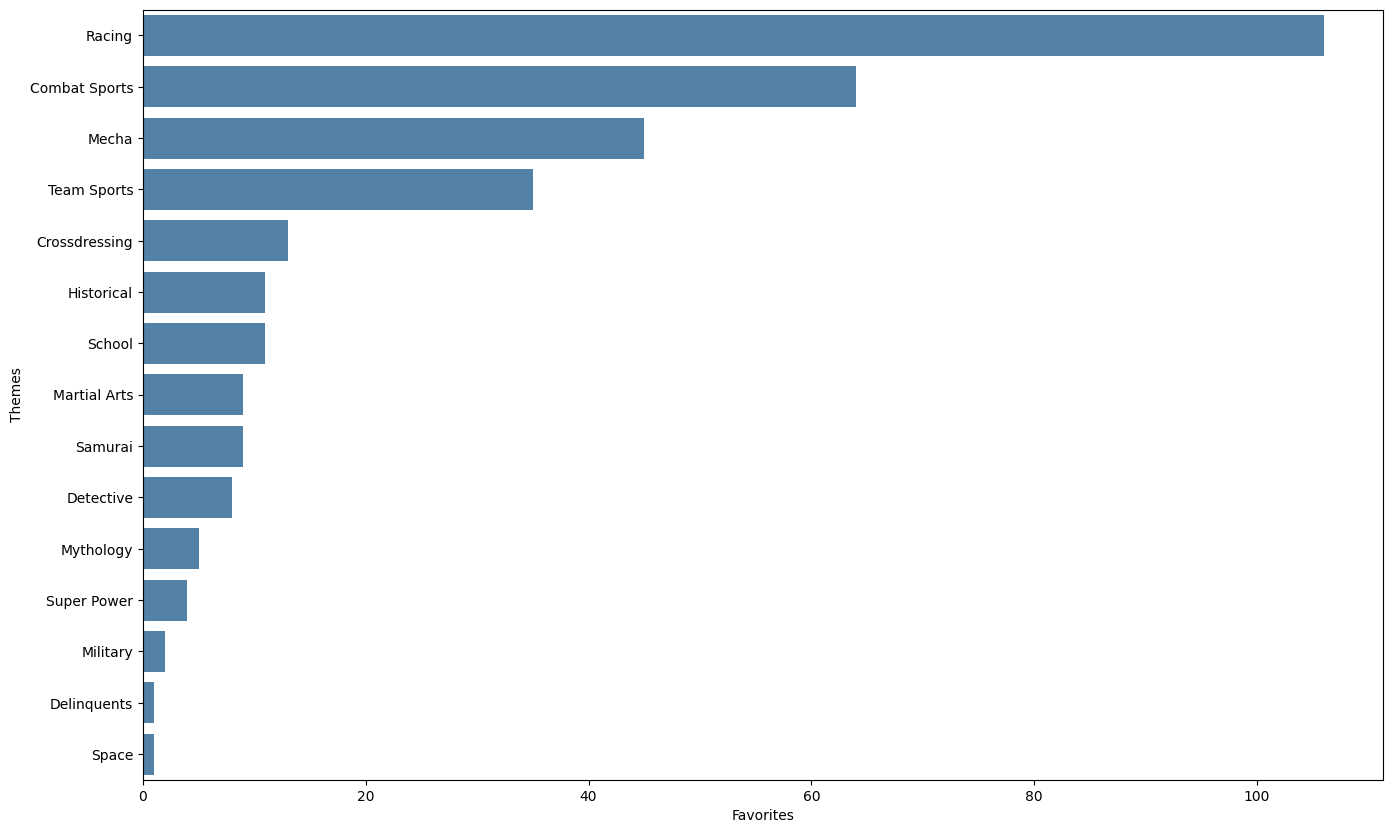

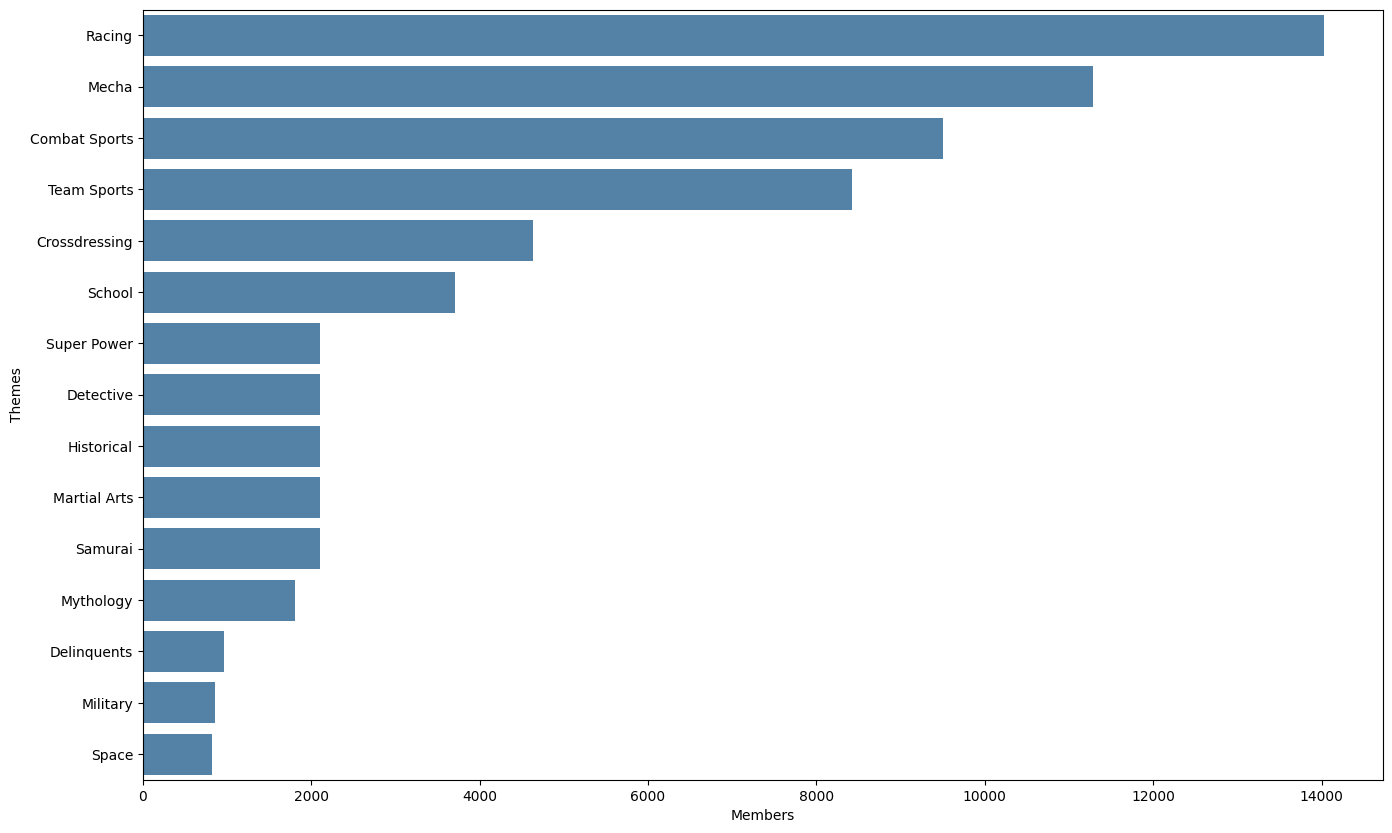

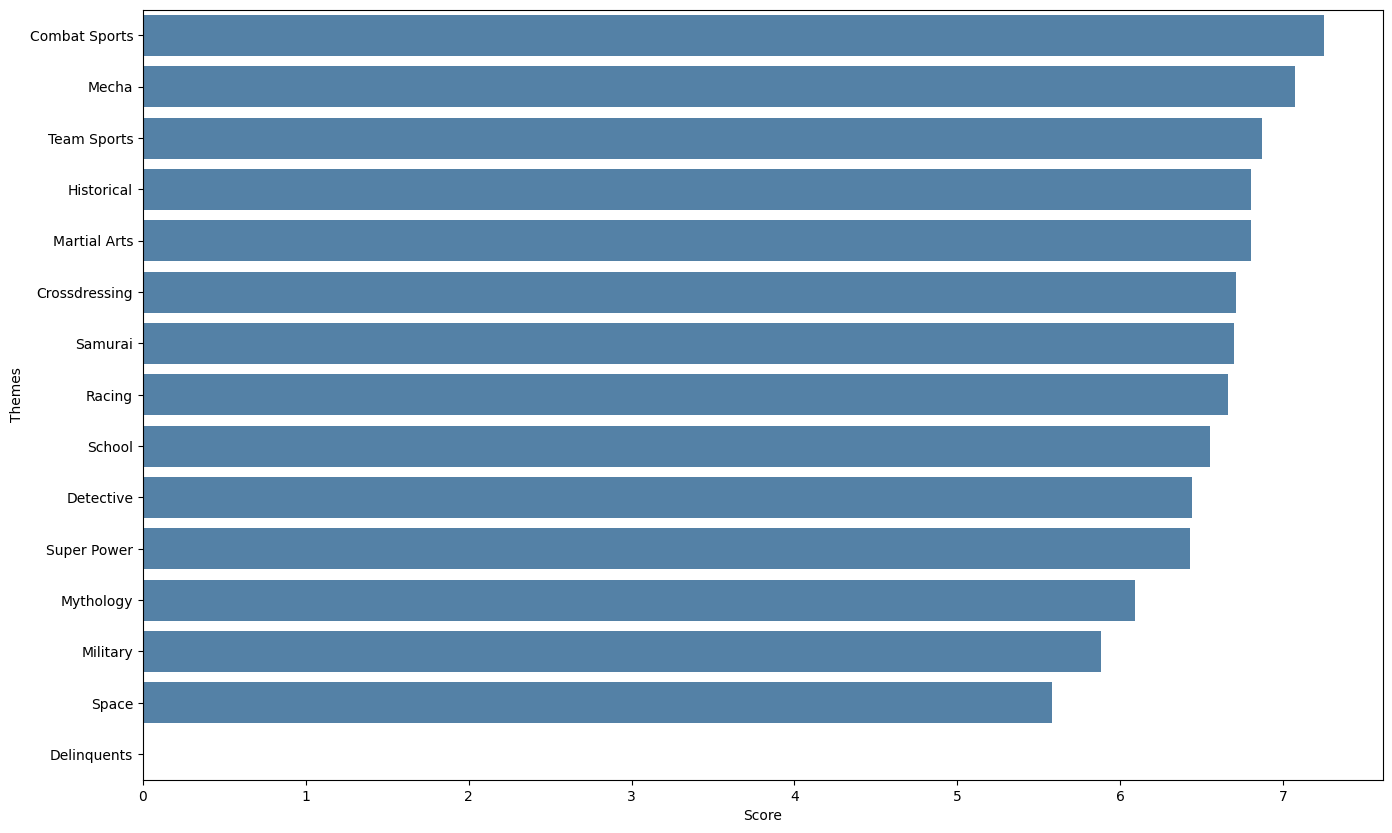

In [ ]:
plot_bar_temas_predominantes('Favorites', df_temas_para_pergunta2, 1960, 1969)
plot_bar_temas_predominantes('Members', df_temas_para_pergunta2, 1960, 1969)
plot_bar_temas_predominantes('Score', df_temas_para_pergunta2, 1960, 1969)

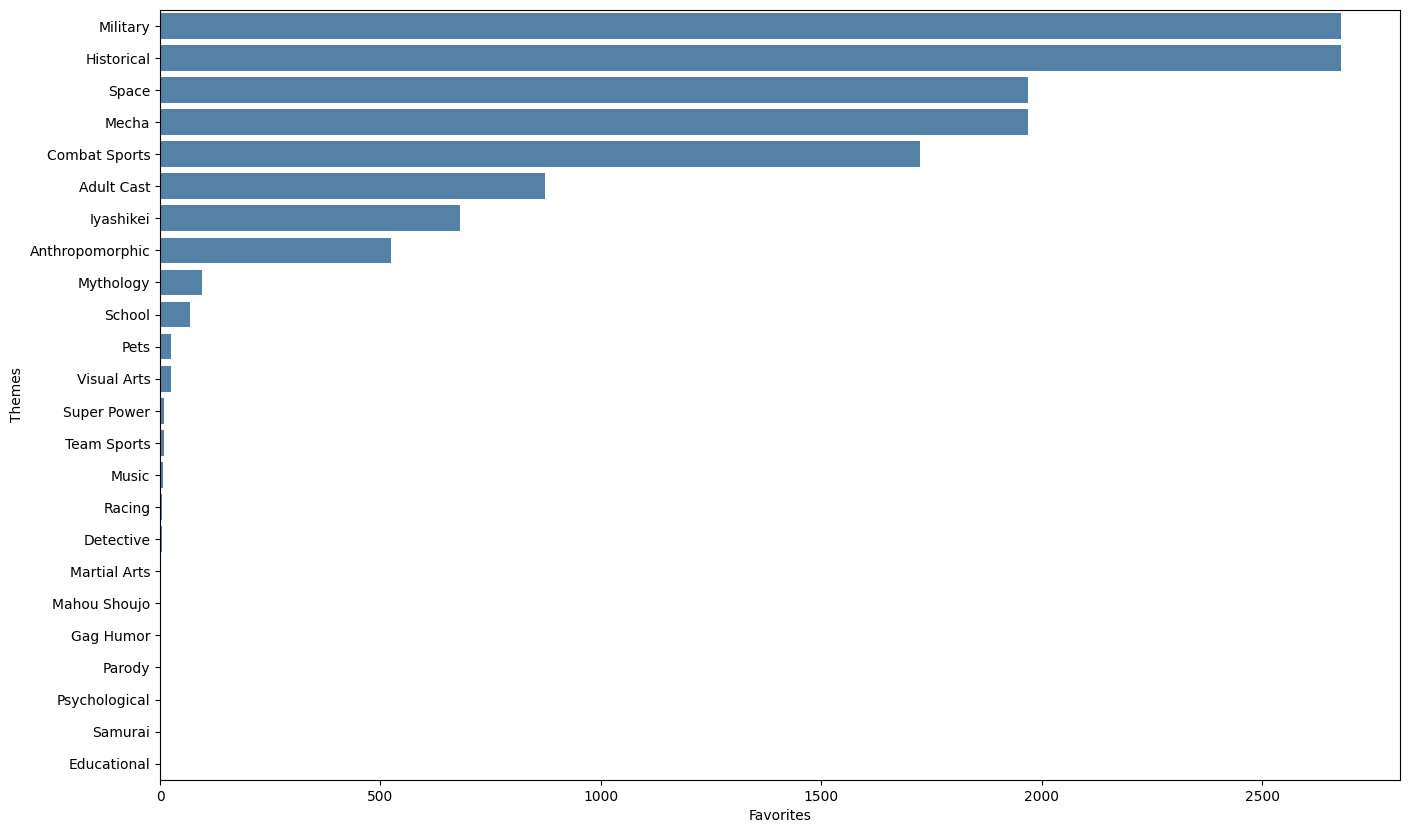

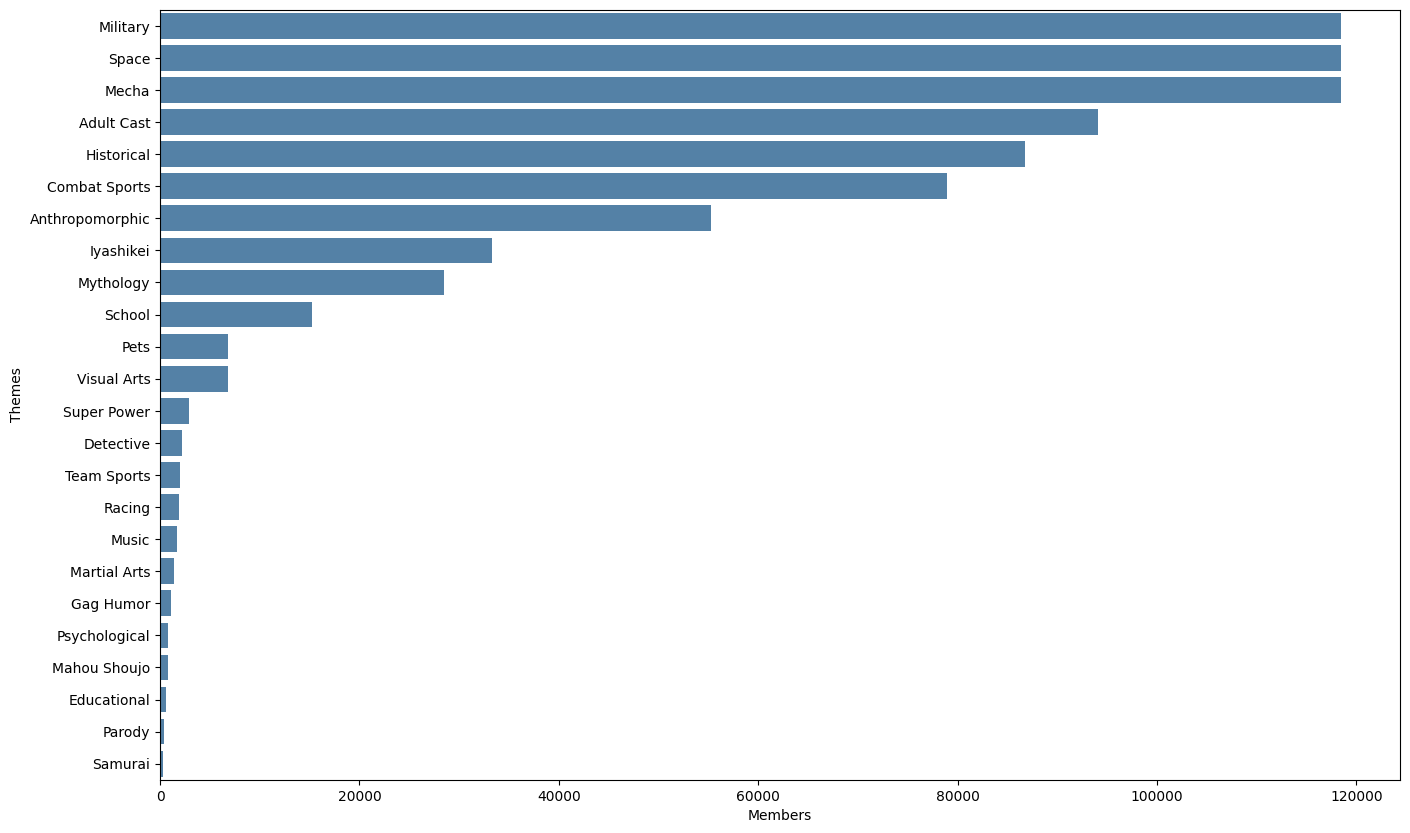

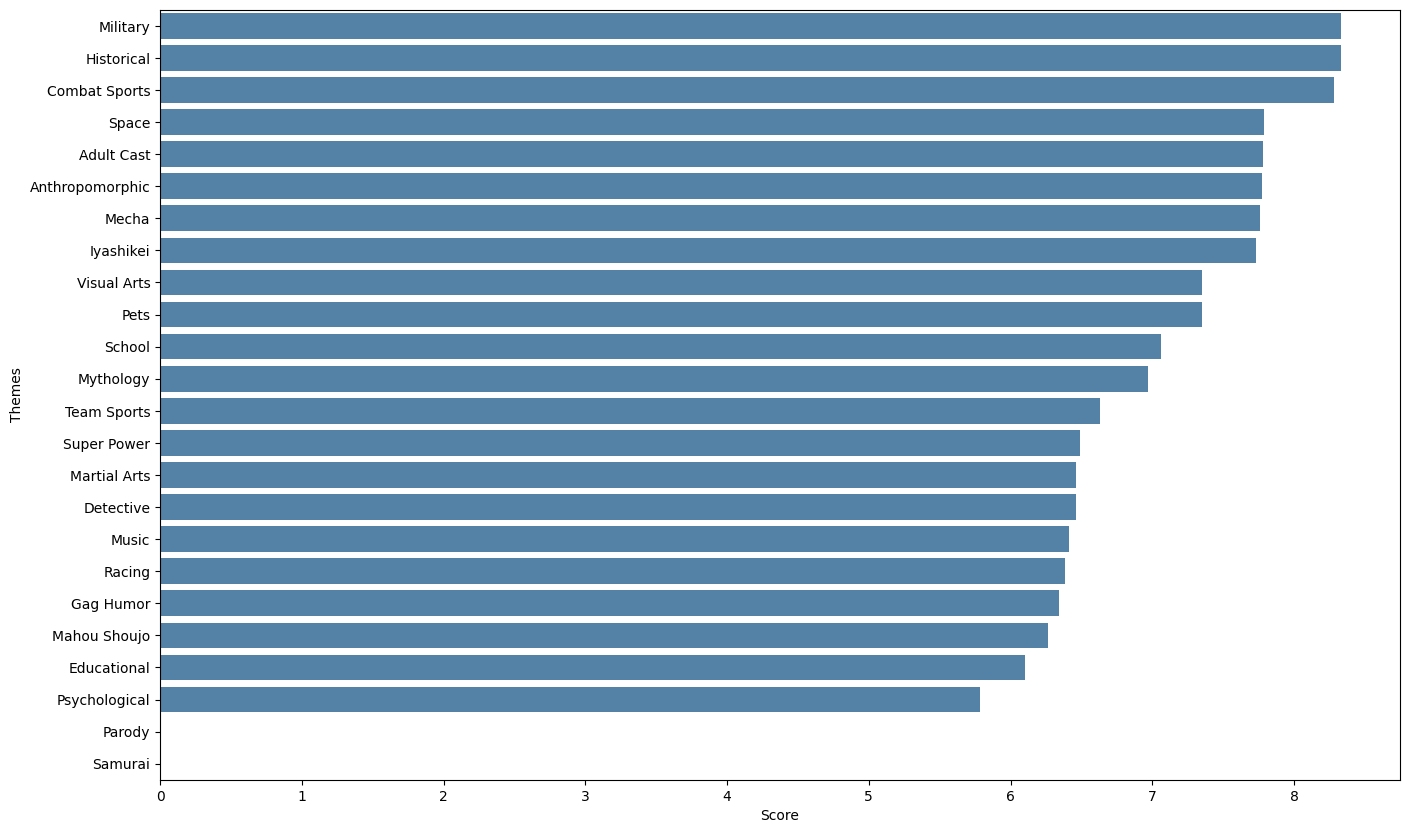

In [ ]:
plot_bar_temas_predominantes('Favorites', df_temas_para_pergunta2, 1970, 1979)
plot_bar_temas_predominantes('Members', df_temas_para_pergunta2, 1970, 1979)
plot_bar_temas_predominantes('Score', df_temas_para_pergunta2, 1970, 1979)

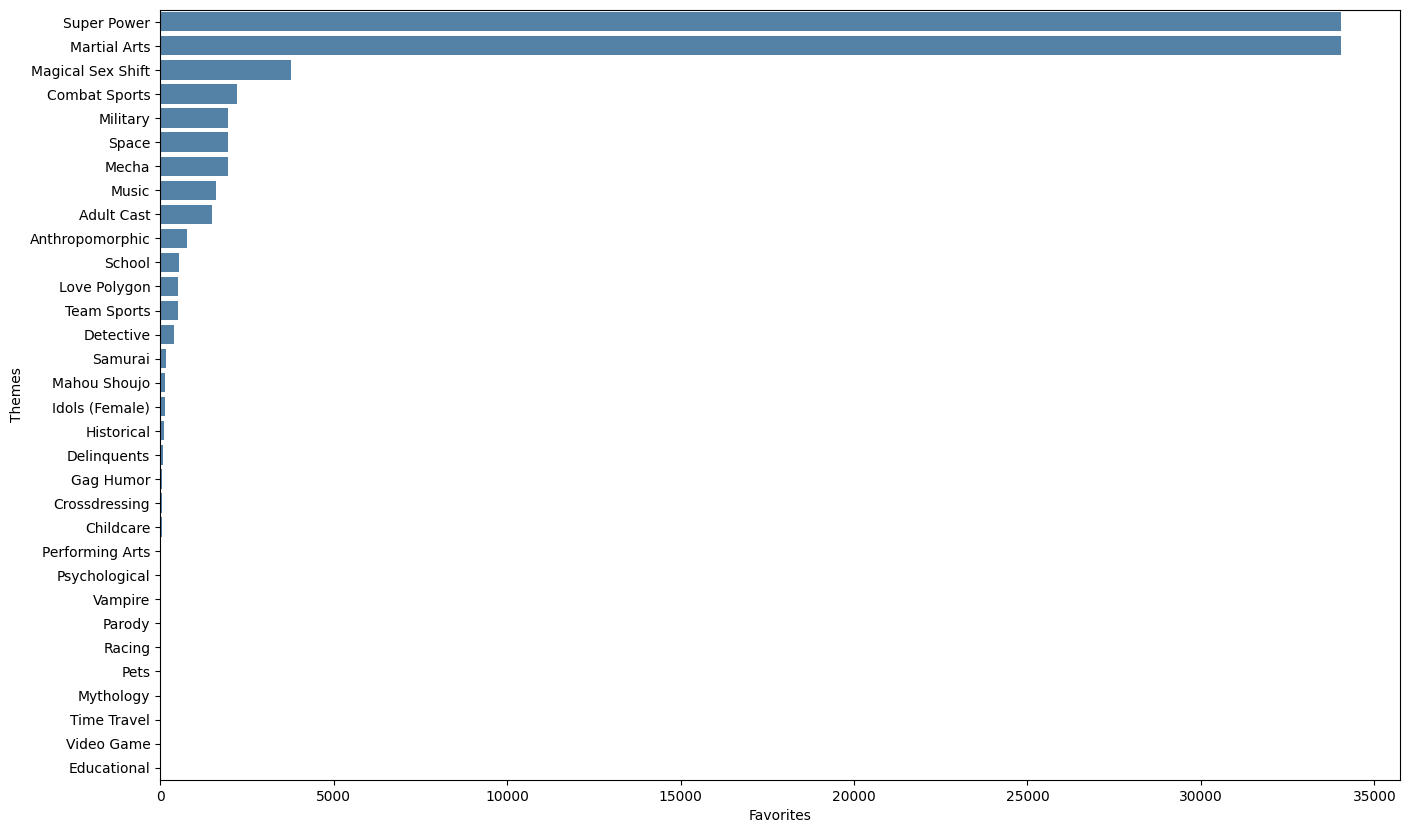

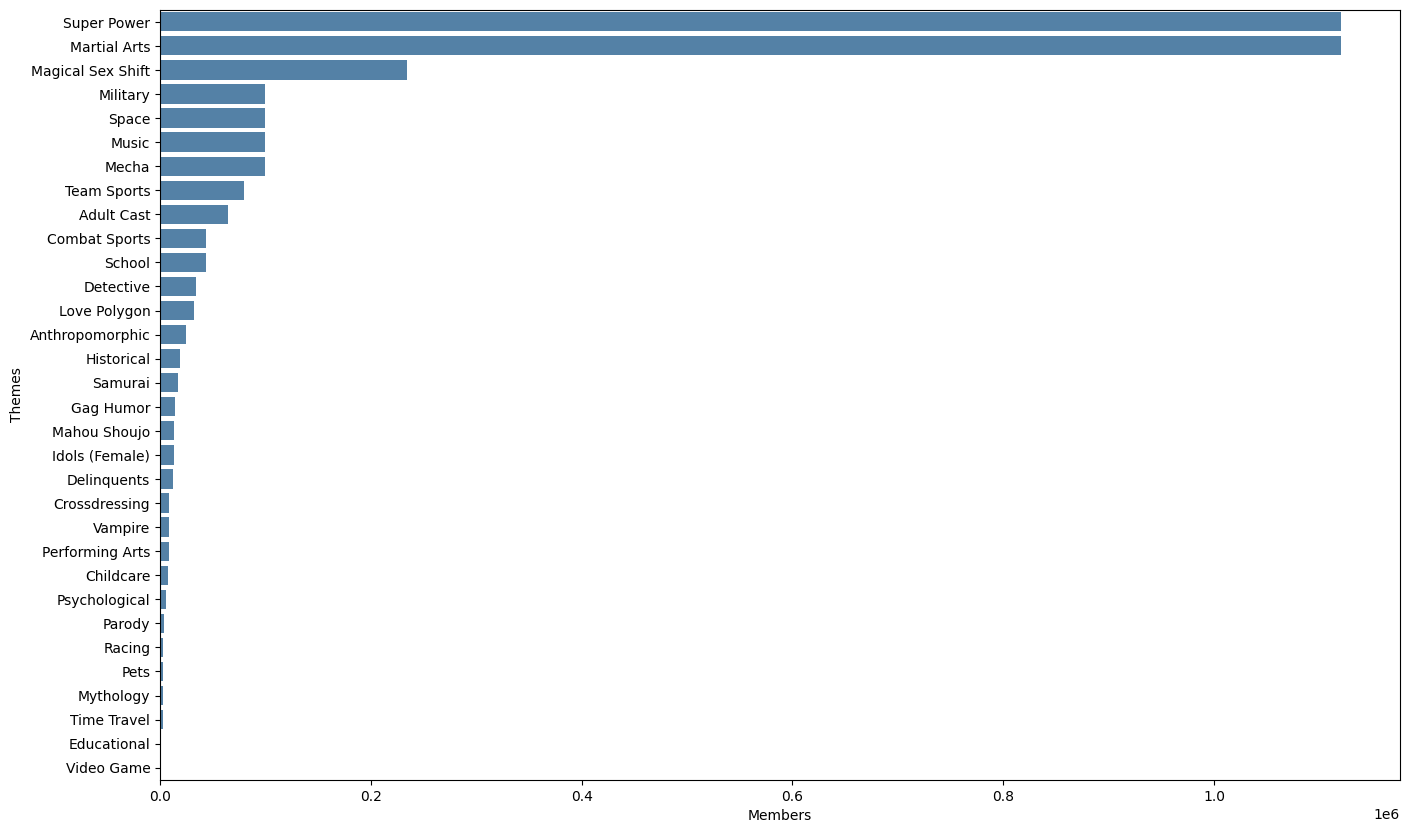

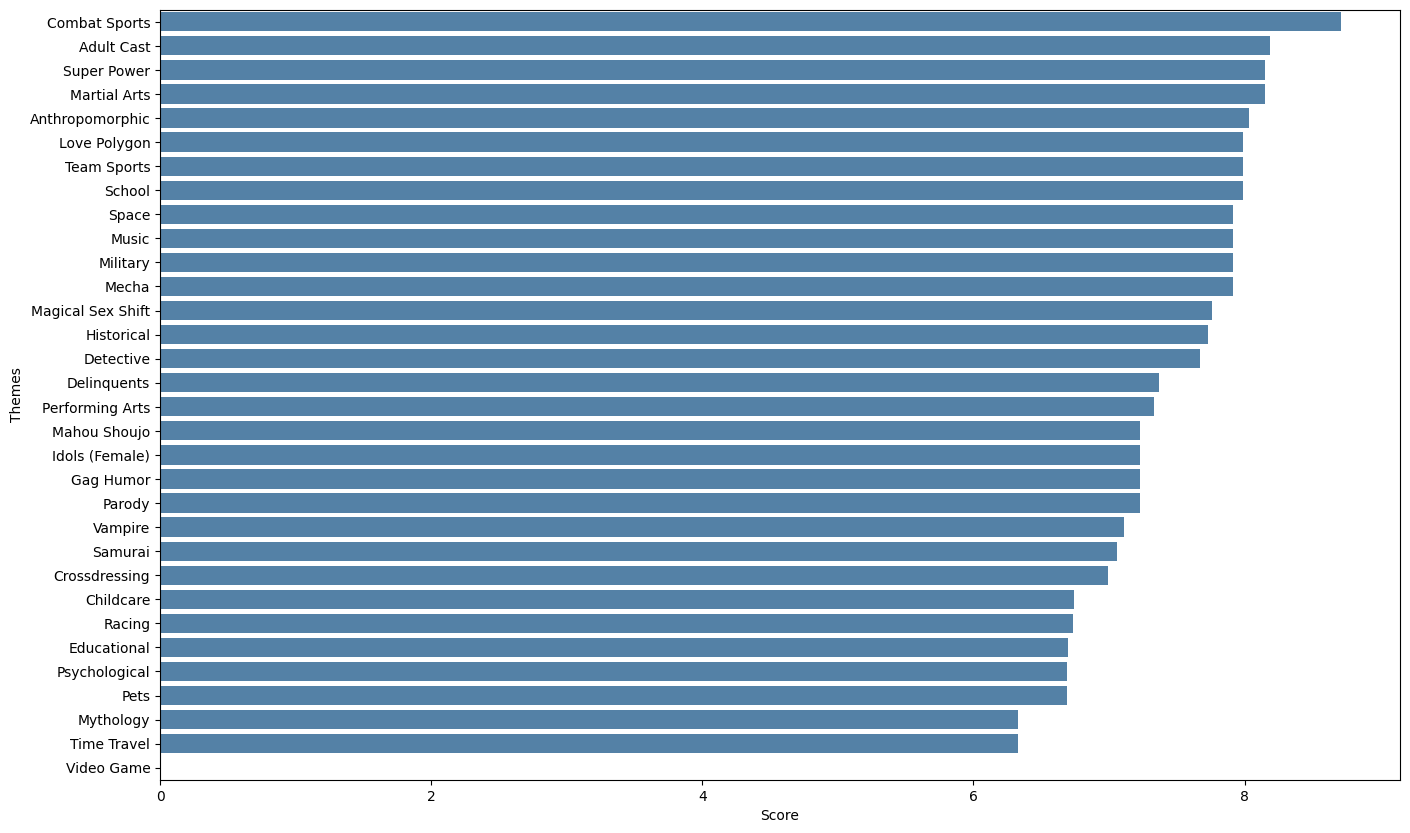

In [ ]:
plot_bar_temas_predominantes('Favorites', df_temas_para_pergunta2, 1980, 1989)
plot_bar_temas_predominantes('Members', df_temas_para_pergunta2, 1980, 1989)
plot_bar_temas_predominantes('Score', df_temas_para_pergunta2, 1980, 1989)

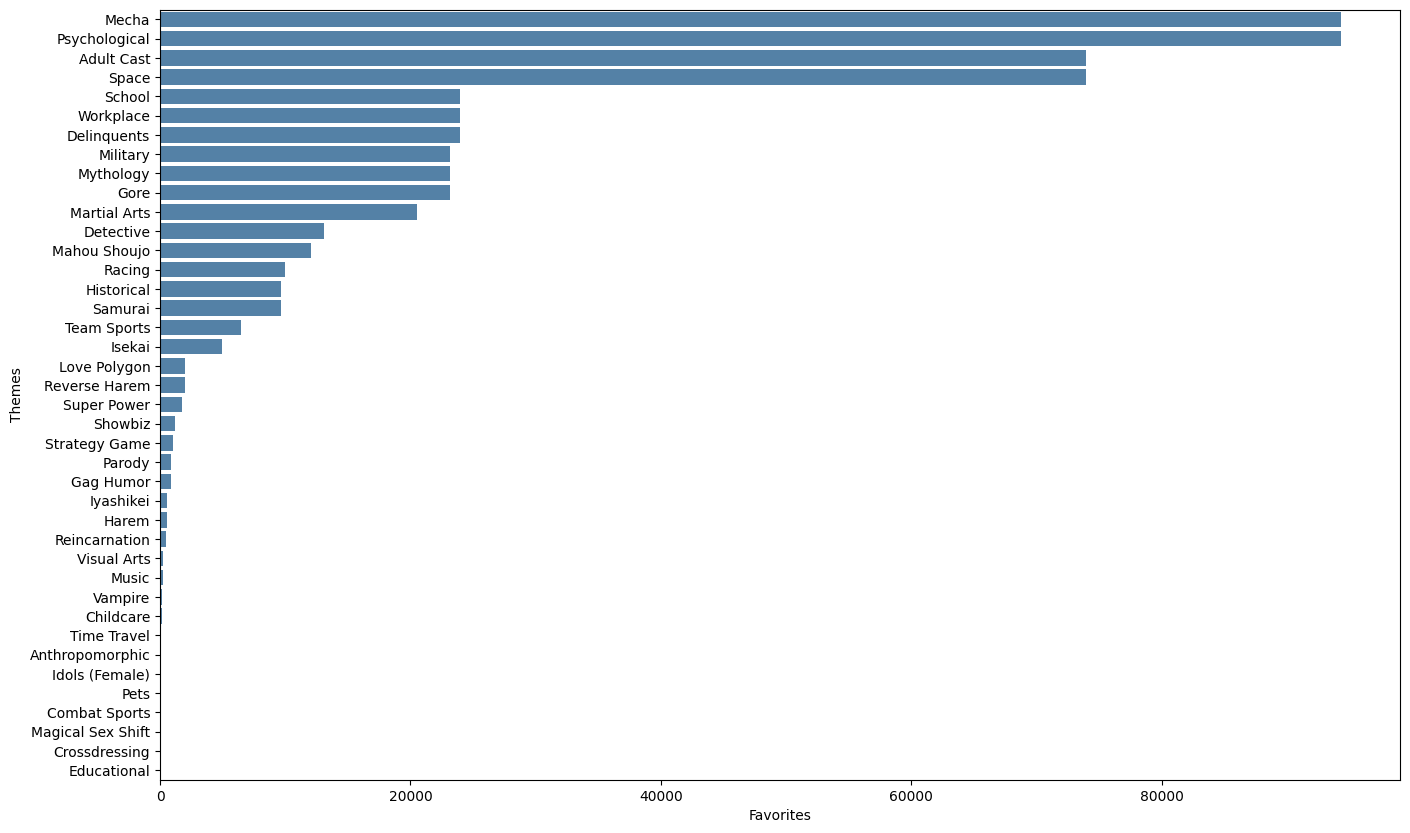

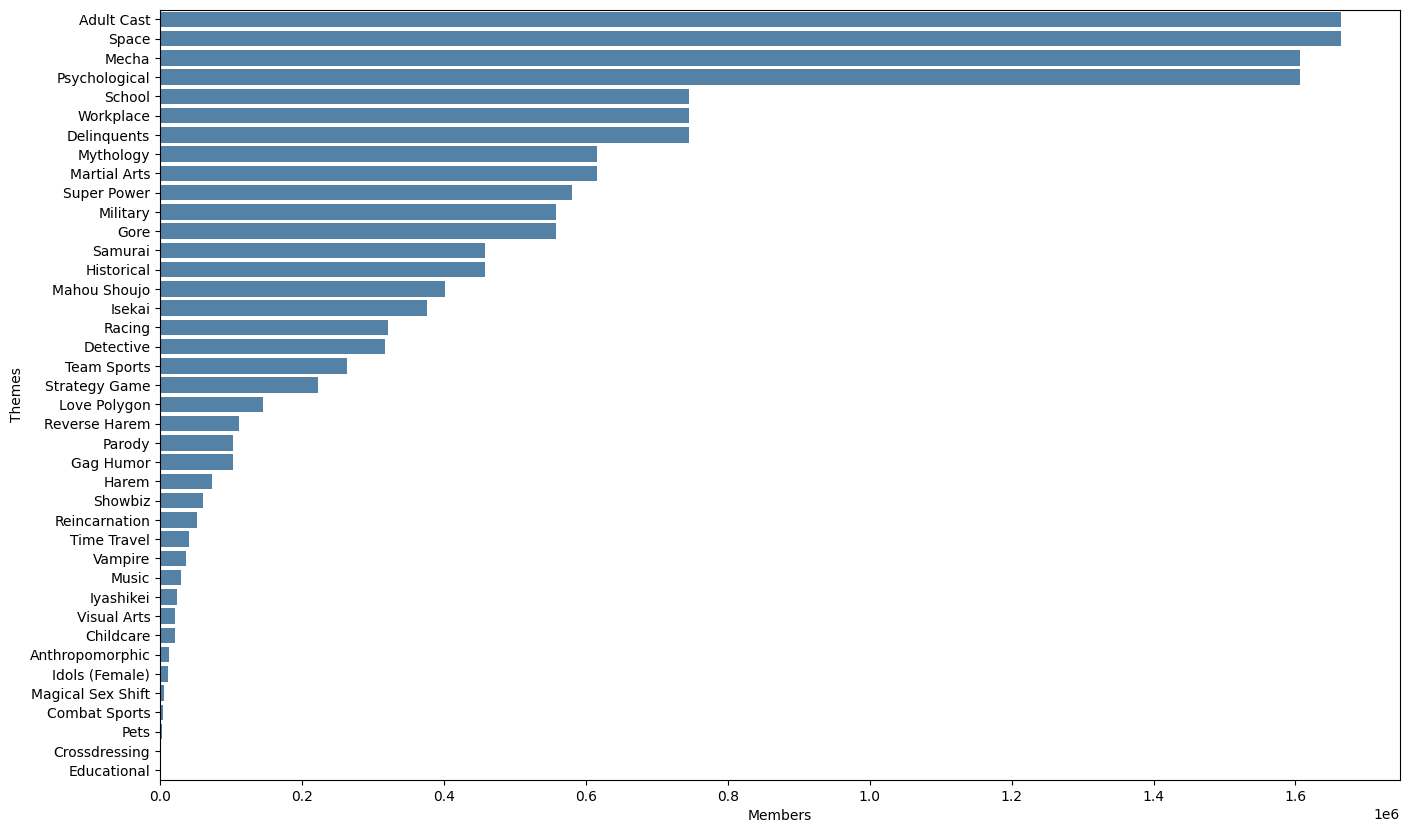

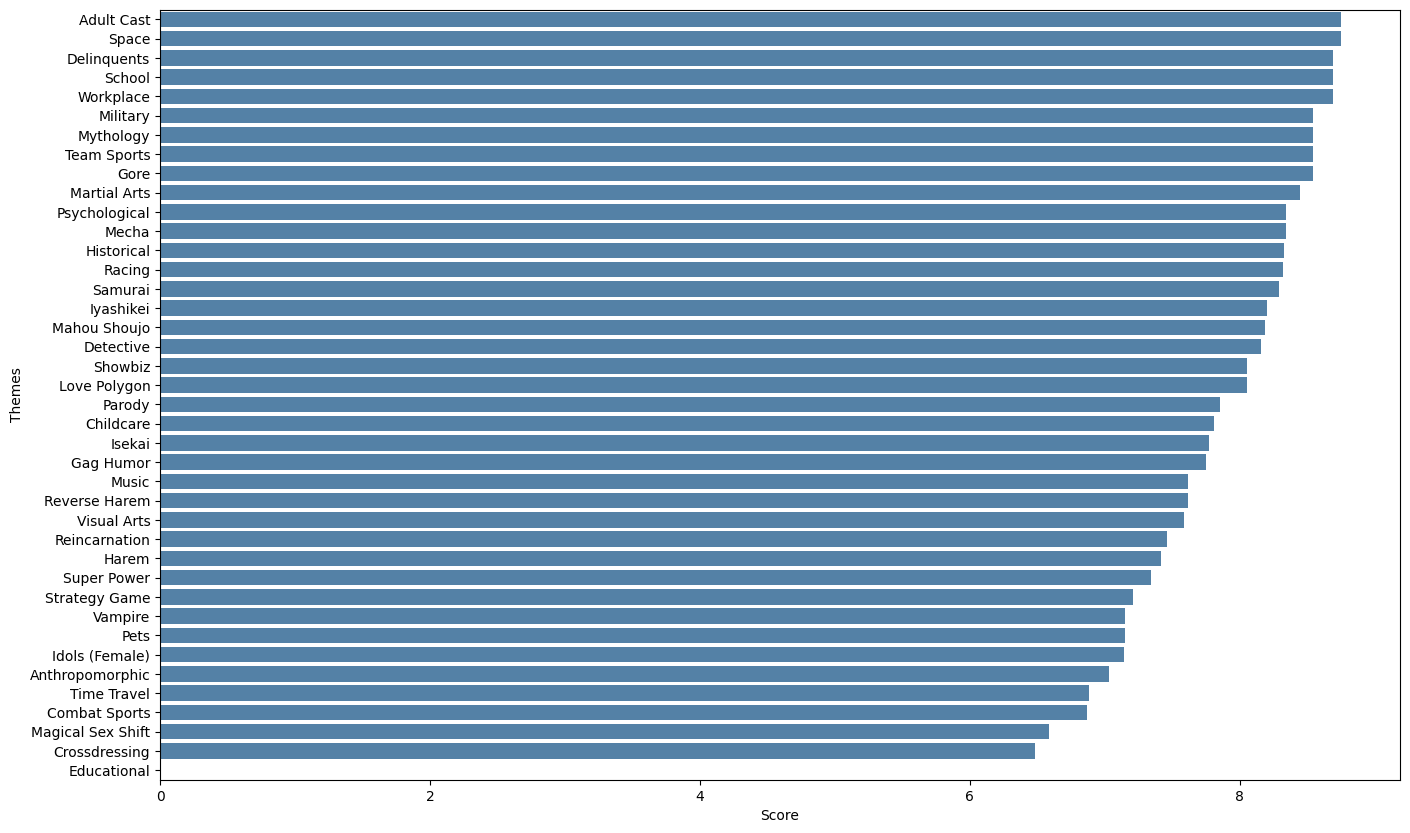

In [ ]:
plot_bar_temas_predominantes('Favorites', df_temas_para_pergunta2, 1990, 1999)
plot_bar_temas_predominantes('Members', df_temas_para_pergunta2, 1990, 1999)
plot_bar_temas_predominantes('Score', df_temas_para_pergunta2, 1990, 1999)

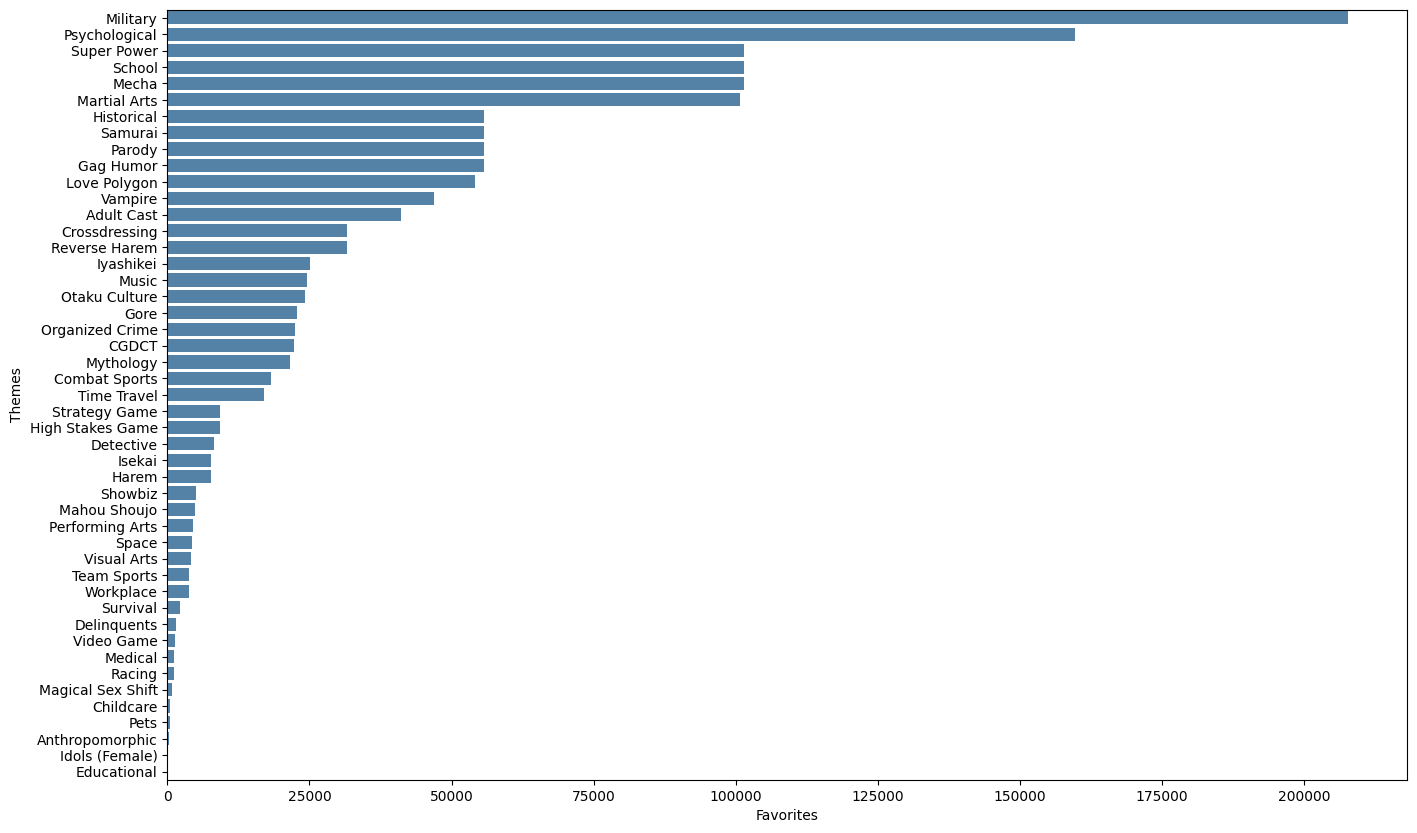

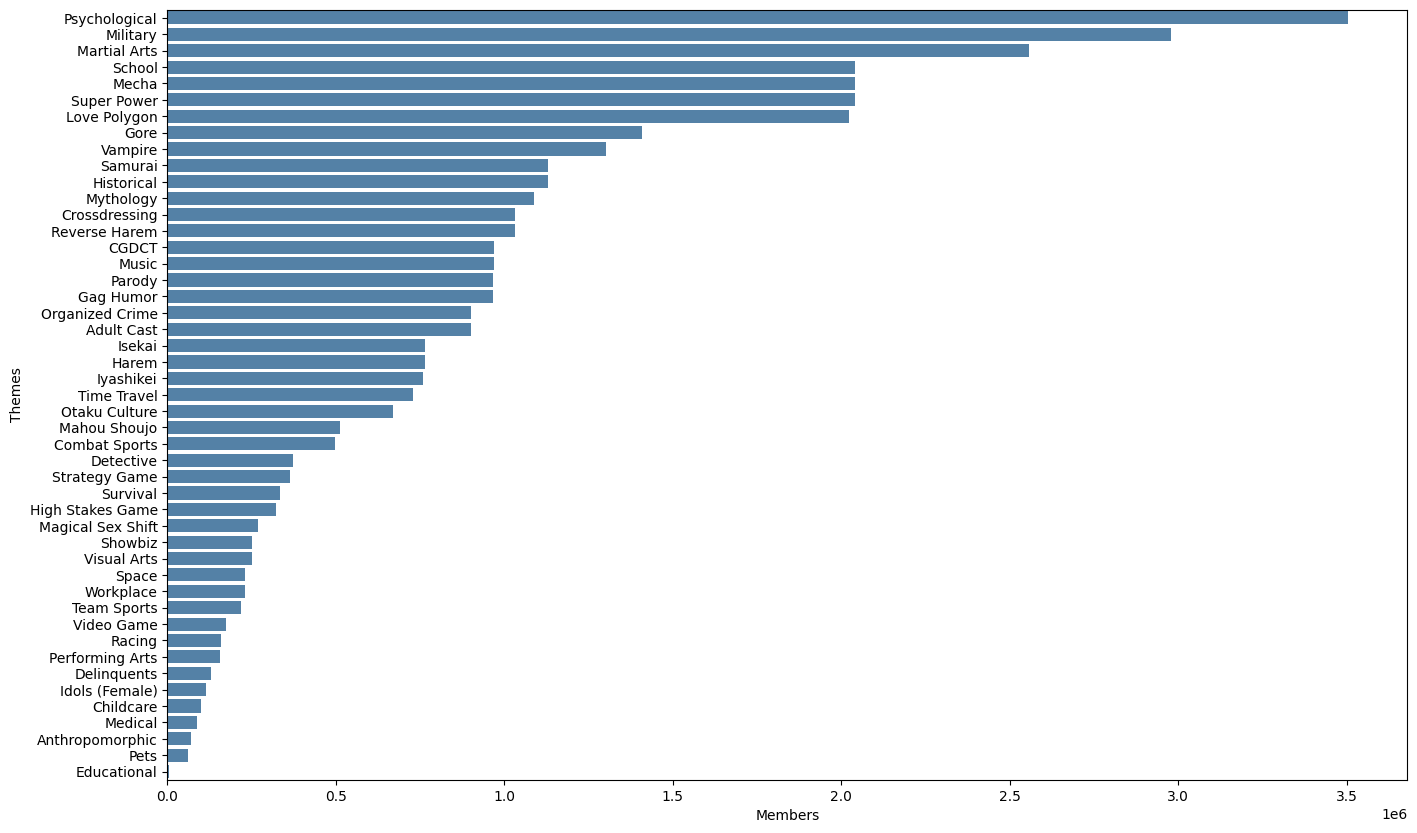

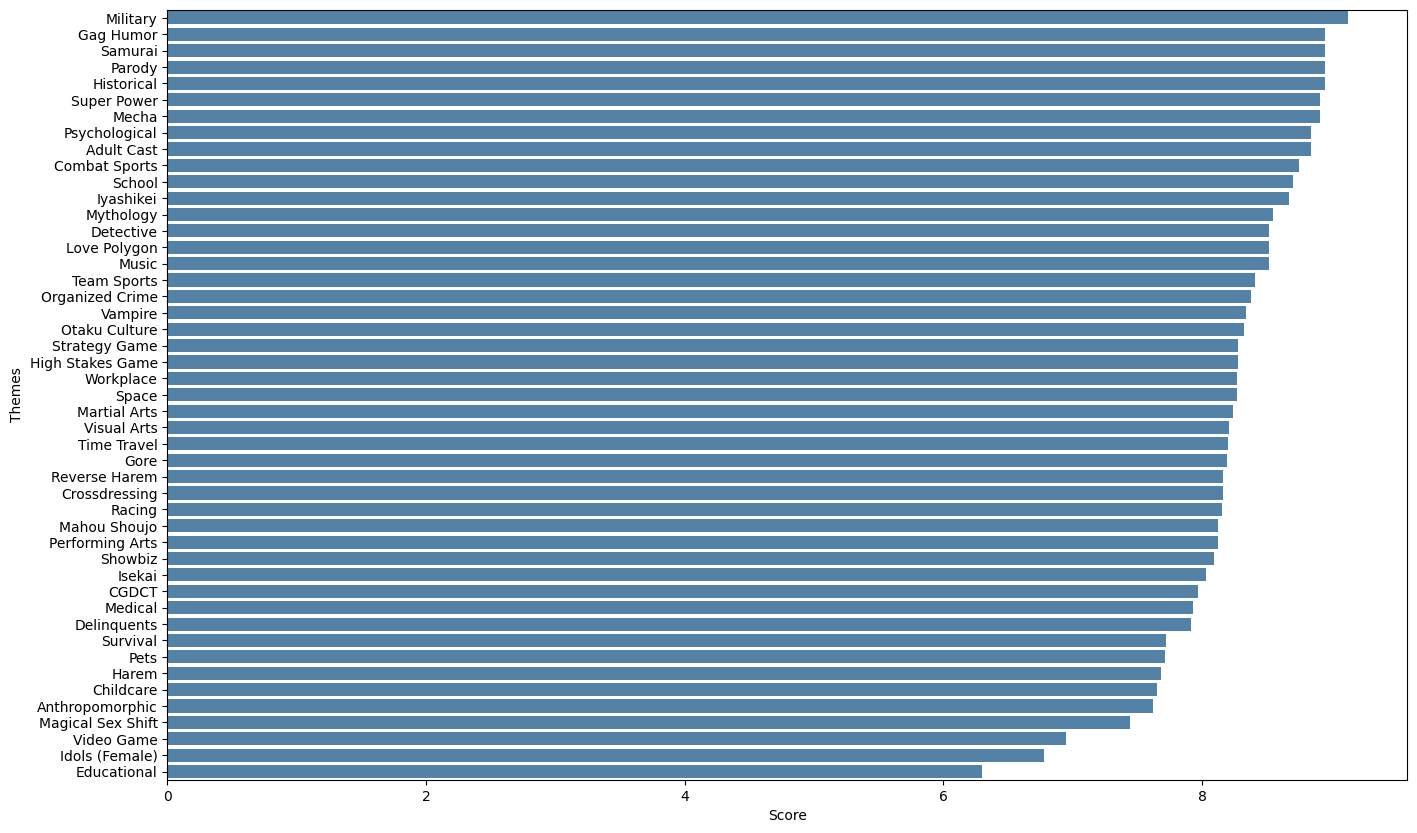

In [ ]:
plot_bar_temas_predominantes('Favorites', df_temas_para_pergunta2, 2000, 2009)
plot_bar_temas_predominantes('Members', df_temas_para_pergunta2, 2000, 2009)
plot_bar_temas_predominantes('Score', df_temas_para_pergunta2, 2000, 2009)

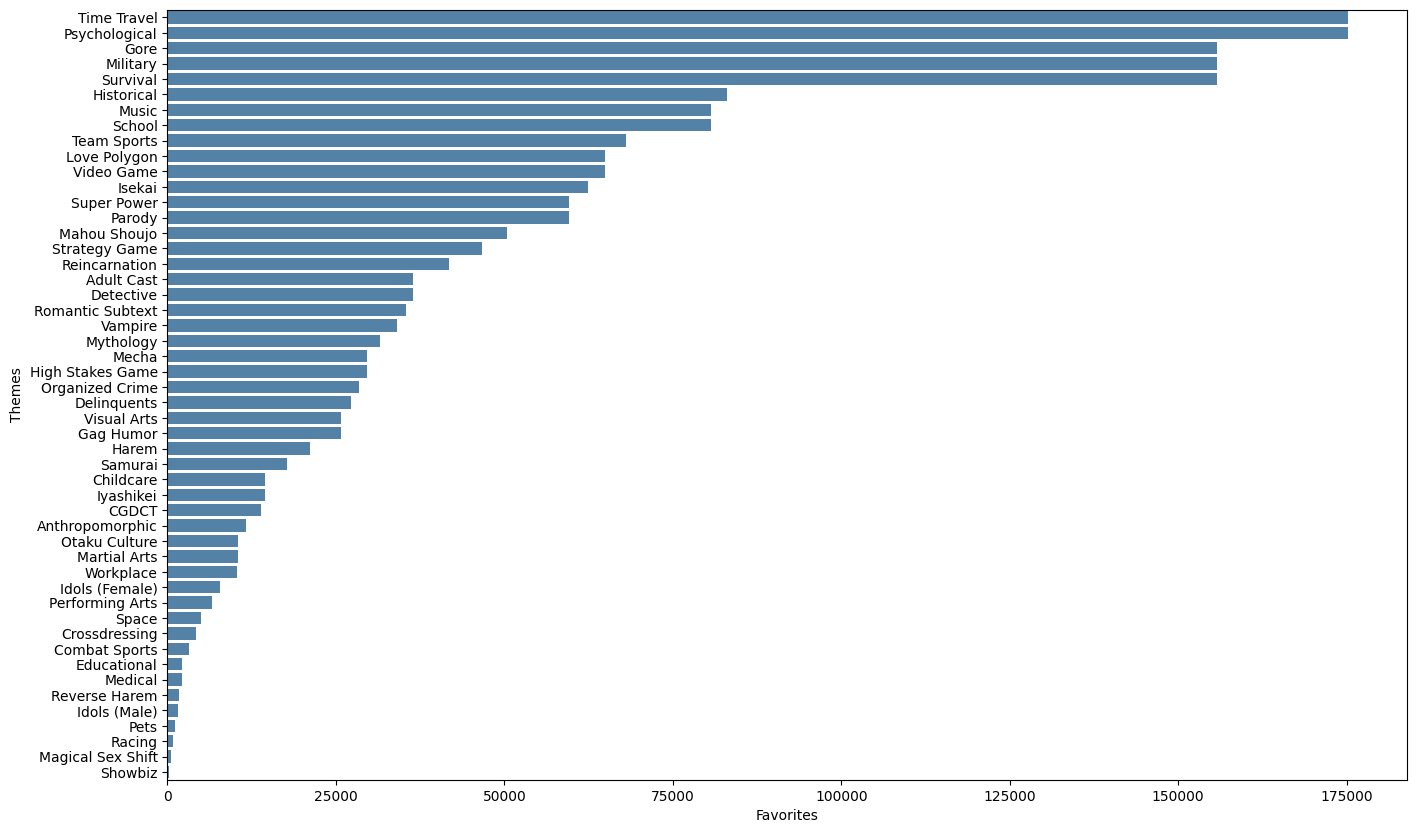

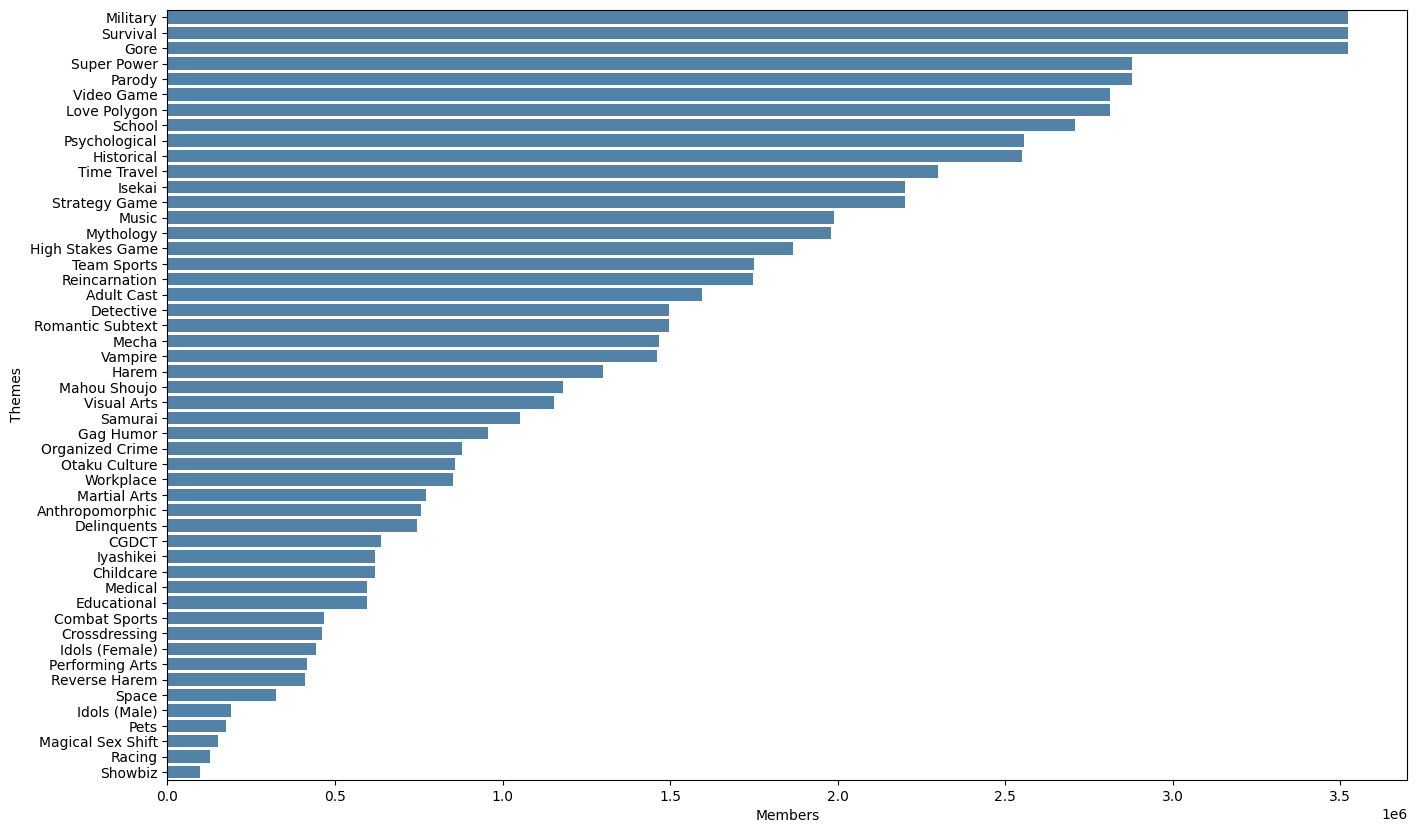

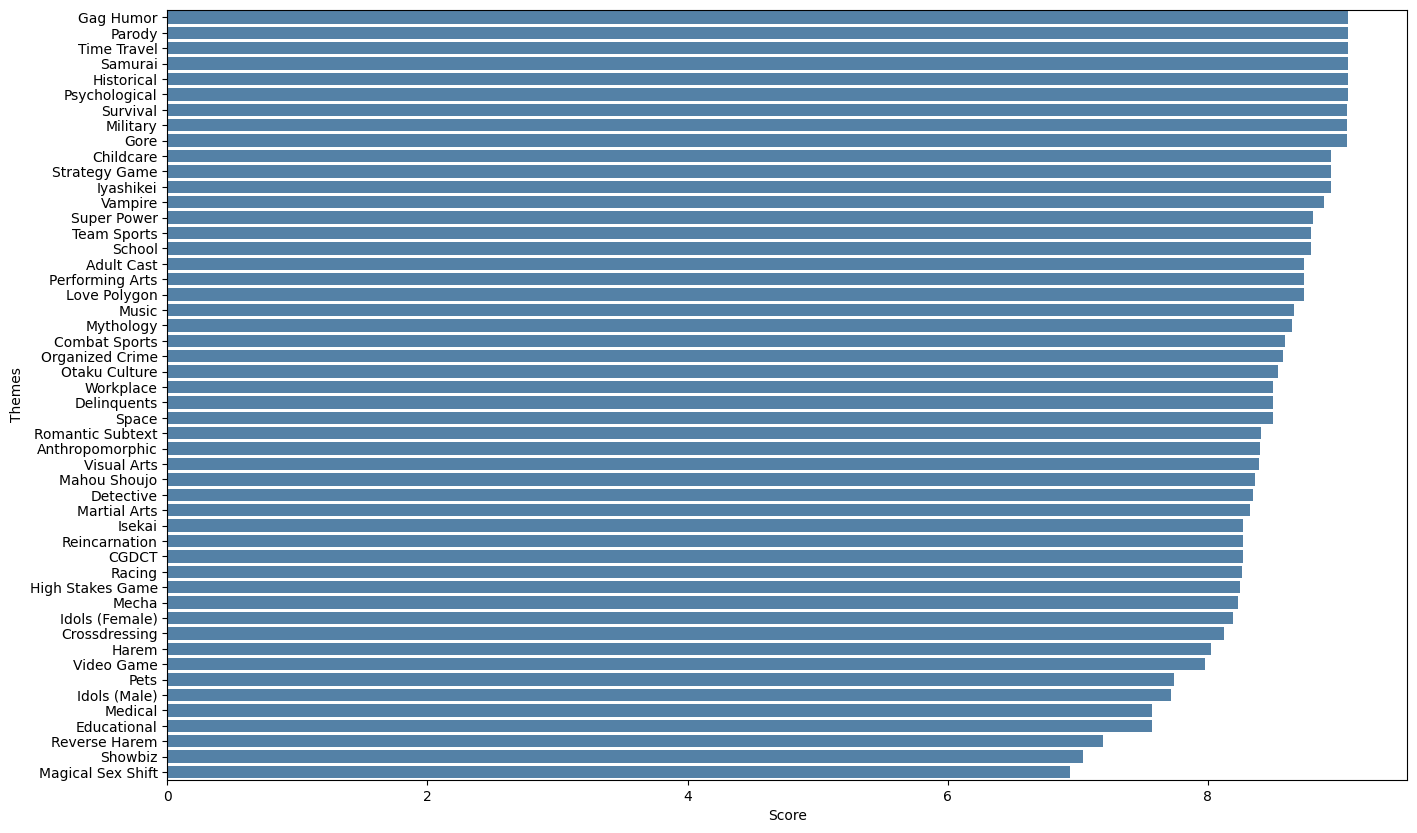

In [ ]:
plot_bar_temas_predominantes('Favorites', df_temas_para_pergunta2, 2010, 2019)
plot_bar_temas_predominantes('Members', df_temas_para_pergunta2, 2010, 2019)
plot_bar_temas_predominantes('Score', df_temas_para_pergunta2, 2010, 2019)

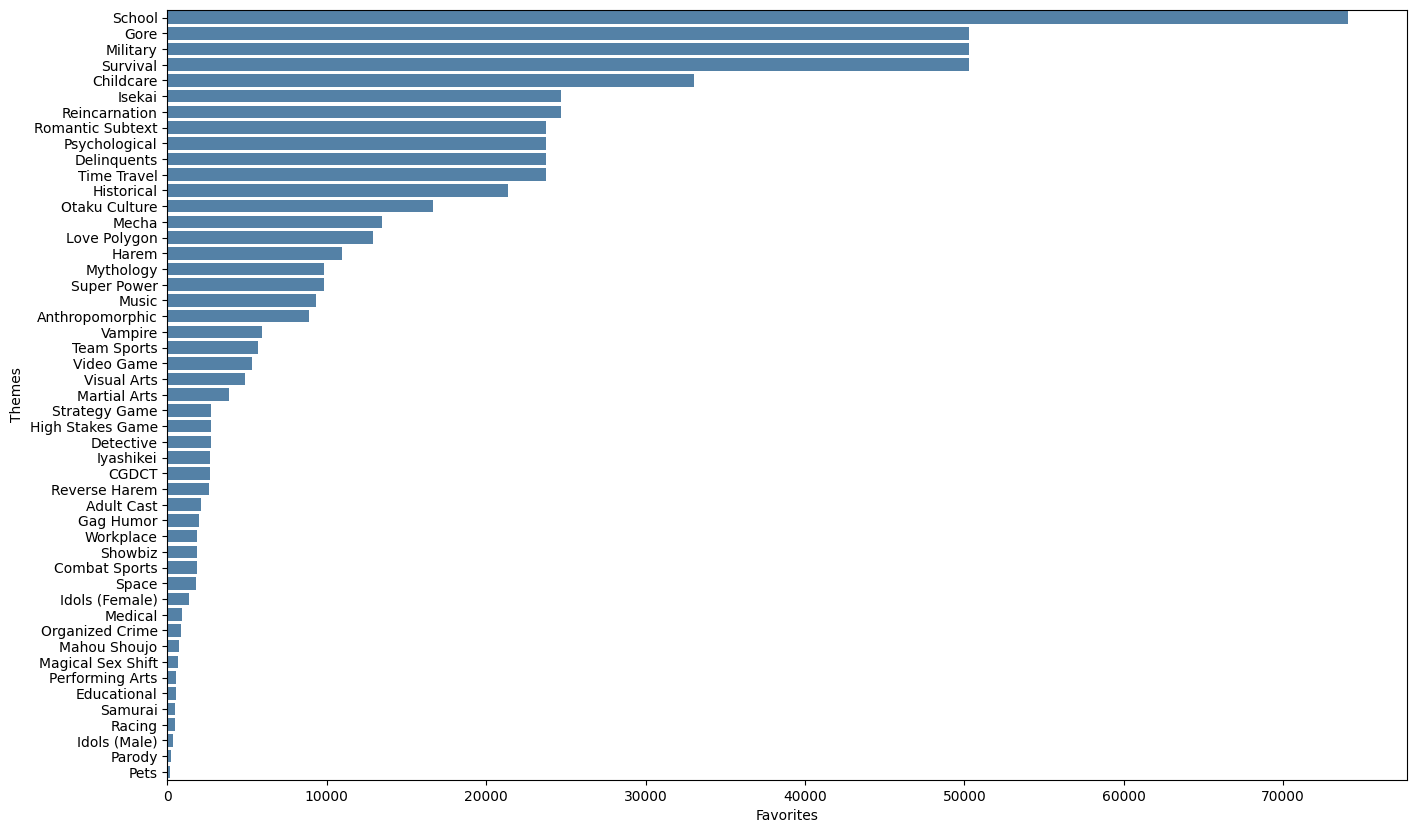

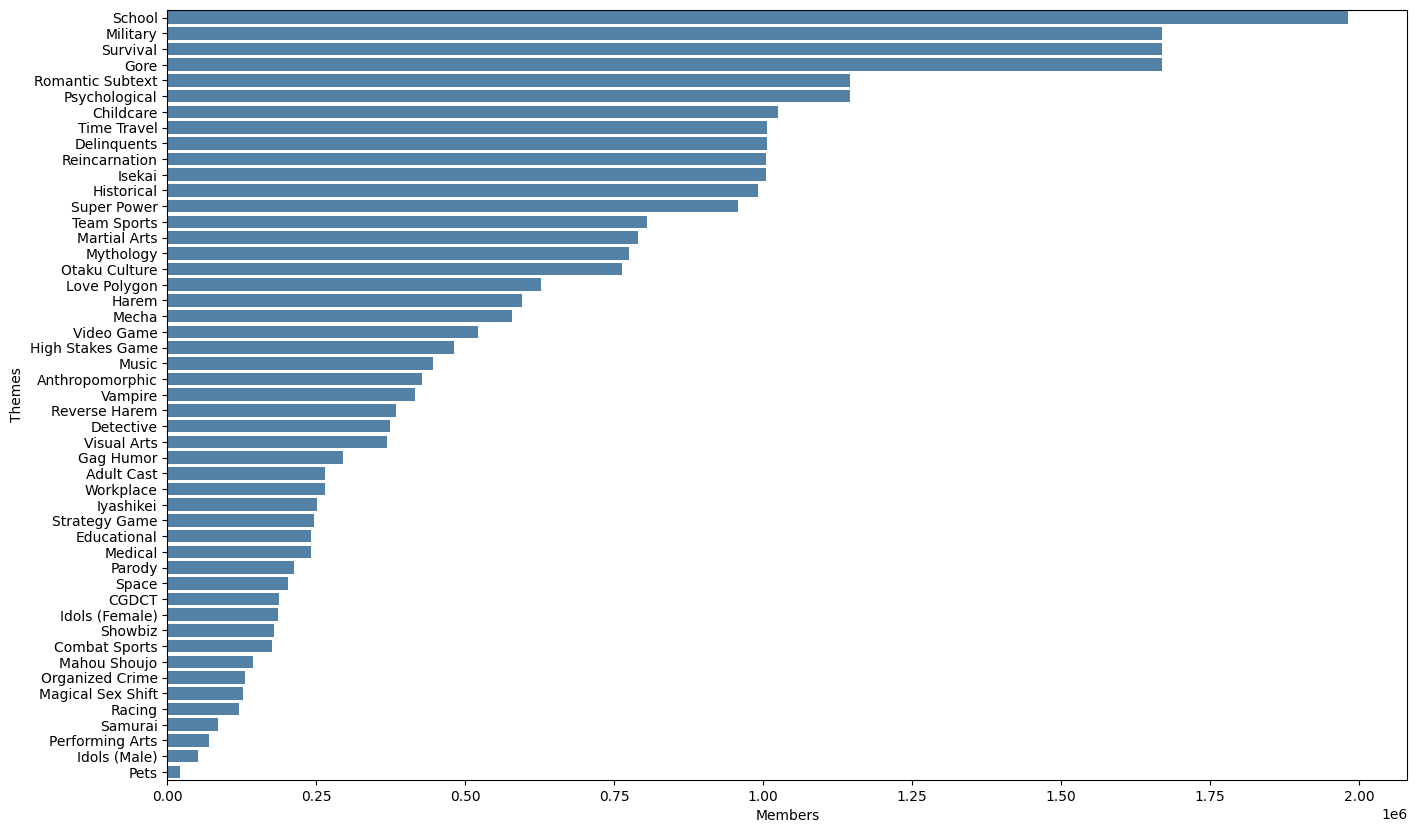

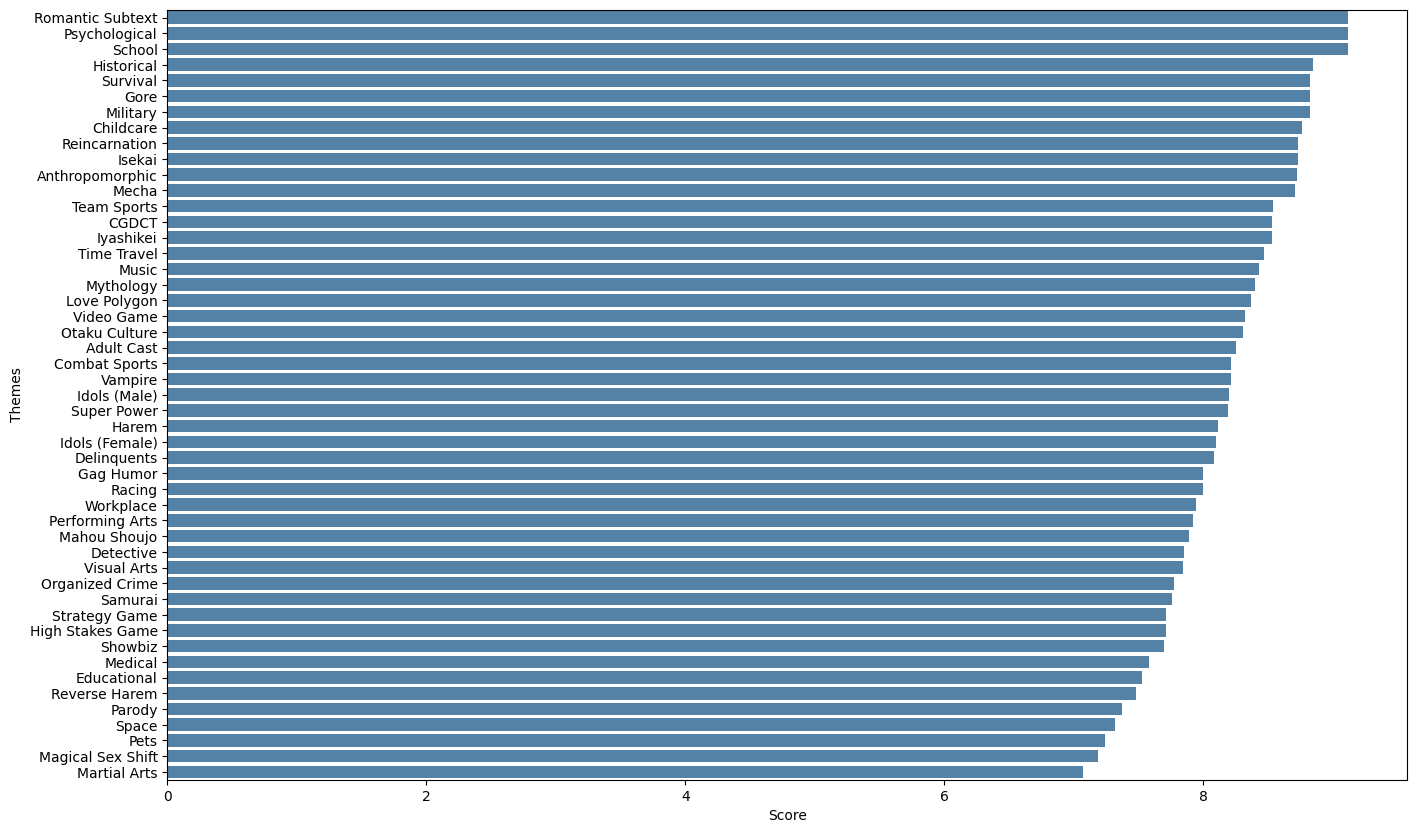

In [ ]:
plot_bar_temas_predominantes('Favorites', df_temas_para_pergunta2, 2020, 2029)
plot_bar_temas_predominantes('Members', df_temas_para_pergunta2, 2020, 2029)
plot_bar_temas_predominantes('Score', df_temas_para_pergunta2, 2020, 2029)

É possível observar uma leve mudança, ao longo das décadas, de temas que predominavam em animes mais bem sucedidos e populares. Muitos dos temas predominantes, em dadas épocas, podem ser explicados por certos eventos historico-culturais, como é o caso da década de 80 com o tema "Martial Arts" sendo fortemente predominante em função dos filmes de luta populares desse período, como Rocky, e artistas marciais famosos como Bruce Lee. A análise de predominância com base em temas presentes nos animes pode ajudar a compreender o quanto esses temas podem influenciar na popularidade e sucesso de um anime, e auxilia a predizer se um anime será popular com base nessas características deles.

# Pergunta 3 - Animes que possivelmente influenciaram os outros baseando-se em Gênero e Tema
___

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MultiLabelBinarizer

df_animes_proximos = df_animes_anime_list.copy()
df_animes_proximos.replace('Unknown', pd.NA, inplace=True)

# Remover linhas onde os temas (Themes) ou gêneros (Genres) são NaN
df_animes_proximos.dropna(subset=['Themes', 'Genres'], inplace=True)

# Inicializar o MultiLabelBinarizer para Temas e Gêneros
mlb_themes = MultiLabelBinarizer()
mlb_genres = MultiLabelBinarizer()

# Transformar as colunas Temas e Gêneros em uma representação binária
# Cada tema e gênero único terá sua própria coluna com 0 ou 1
themes_binarized = mlb_themes.fit_transform(df_animes_proximos['Themes'])
genres_binarized = mlb_genres.fit_transform(df_animes_proximos['Genres'])

# Combinar as características binarizadas dos Temas e Gêneros em uma única matriz de características
features = np.hstack((themes_binarized, genres_binarized))

# Criar o modelo K-NN (K-Nearest Neighbors) com 10 vizinhos e usando a distância euclidiana
knn = NearestNeighbors(n_neighbors=10, metric='euclidean')

# Treinar o modelo com as características
knn.fit(features)

#exemplo de animes semelhantes a death note
death_note = df_animes_proximos[df_animes_proximos['Title'] == 'Death Note'].index[0]

# Encontrar os 5 vizinhos mais próximos do segundo anime no DataFrame
distances, indices = knn.kneighbors([features[death_note]])

# Imprimir os títulos dos 10 animes mais próximos do anime especificado
for index in indices[0]:
    print(df_animes_proximos.iloc[index]['Title'], " / Lançamento: ", df_animes_proximos.iloc[index]['Start_Aired'])


Death Note  / Lançamento:  Oct 4, 2006
Death Note: Rewrite  / Lançamento:  Aug 31, 2007
Bloody Night  / Lançamento:  May 21, 2006
Pet  / Lançamento:  Jan 6, 2020
Jigoku Shoujo Mitsuganae  / Lançamento:  Oct 4, 2008
Mouryou no Hako  / Lançamento:  Oct 8, 2008
Saint Luminous Jogakuin  / Lançamento:  Oct 6, 1998
Kakurenbo  / Lançamento:  Sep 1, 2004
Manga "Bakemonogatari" Shaft Seisaku Tokubetsu PV  / Lançamento:  Feb 16, 2022
Mirai Nikki: Redial  / Lançamento:  Jun 19, 2013


# Modelo previsão com Regressão Multipla
___


Agora que já realizamos a visualização dos dados e os testes de hipótes, podemos tentar criar um modelo de predição para o dataframe e responder a quarta pergunta do trabalho: "É possível prever a popularidade de um anime com base em outras características?".

Para isso, devemos definir as nossas variáveis de predição e a nossa variável de resposta, além de verificar possíveis correlações entre outras variáveis.

## Verificando correlações

Primeiro iremos verificar a correlação entre as variáveis numéricas da base de dados.

Uma coisa importante de considerar é que temos algumas variáveis que foram derivadas a partir de outras.

A primeria delas é o "Scored_Users", "Score" e o "Ranked", que são

*   "Scored_Users": É a quantidade de usuários que atribuiram uma pontuação para o anime associado.
*   "Score": É a pontuação final calculada pelo MyAnimeList com base na média das notas atribuidas por cada "Scored_User".
*   "Ranked": É a posição do anime em relação aos outros com base em seu "Score".

Outras duas variáveis numéricas que estão diretamente relacionadas são a "Popularity" e "Members".

*   "Members": É a quantidade de usuários que adicionaram aquele anime a sua lista no MyAnimeList.
*   "Popularity": É a posição do anime com base na quantidade de membros que ele tem.

Assim, quanto mais membros um anime tem, mais popular ele é e maior será a sua posição (mais próxima do 1° lugar, assim o valor da posição no ranking diminui com base na quantidade de membros).

Nós podemos fazer um pairplot sobre os valores numéricos que são relevantes:

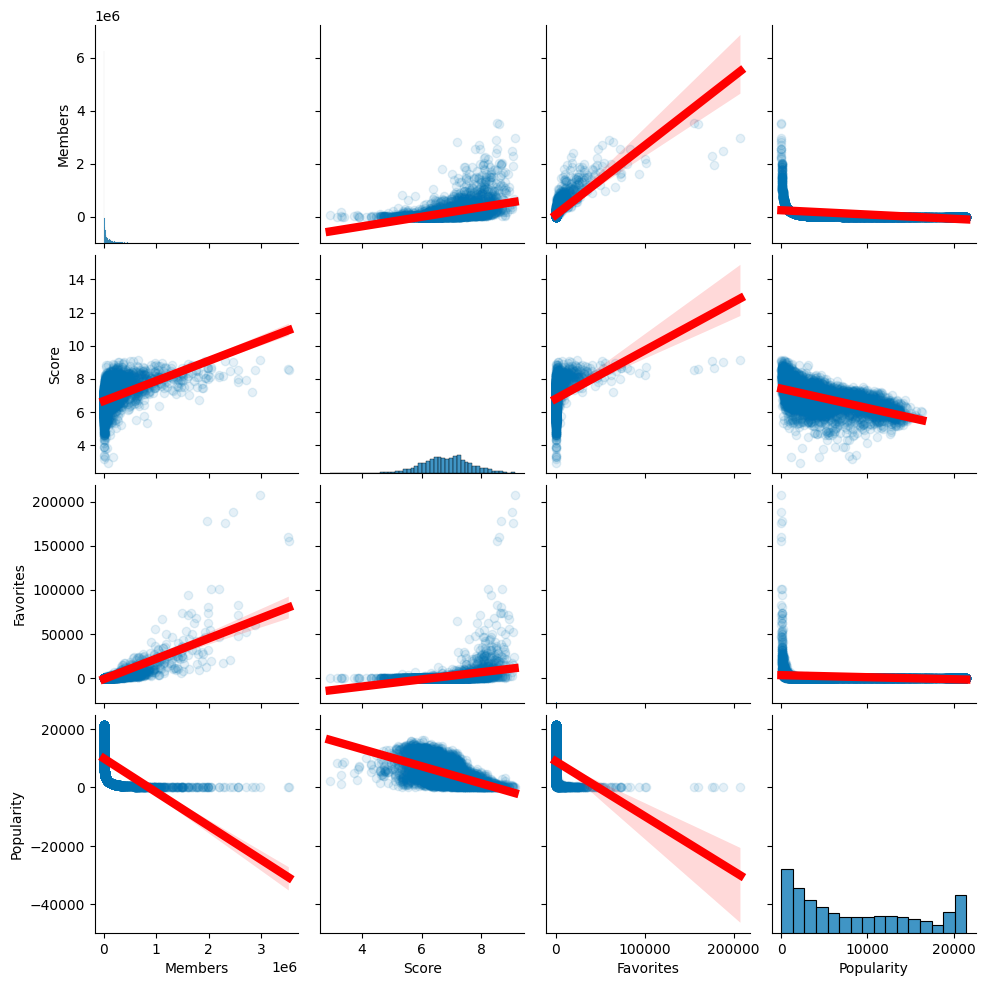

In [ ]:
plot = sns.pairplot(
  df_my_anime_list[["Members", "Score", "Favorites", "Popularity"]],
  kind = "reg",
  plot_kws = {
      'line_kws': { 'color': 'red' },
      'scatter_kws': { 'alpha':  0.1 }
  }
)

plt.show()

É possível notar pelo pairplot que há uma relação muito forte entre a quantidade de Membros e a quantidade de Favoritos

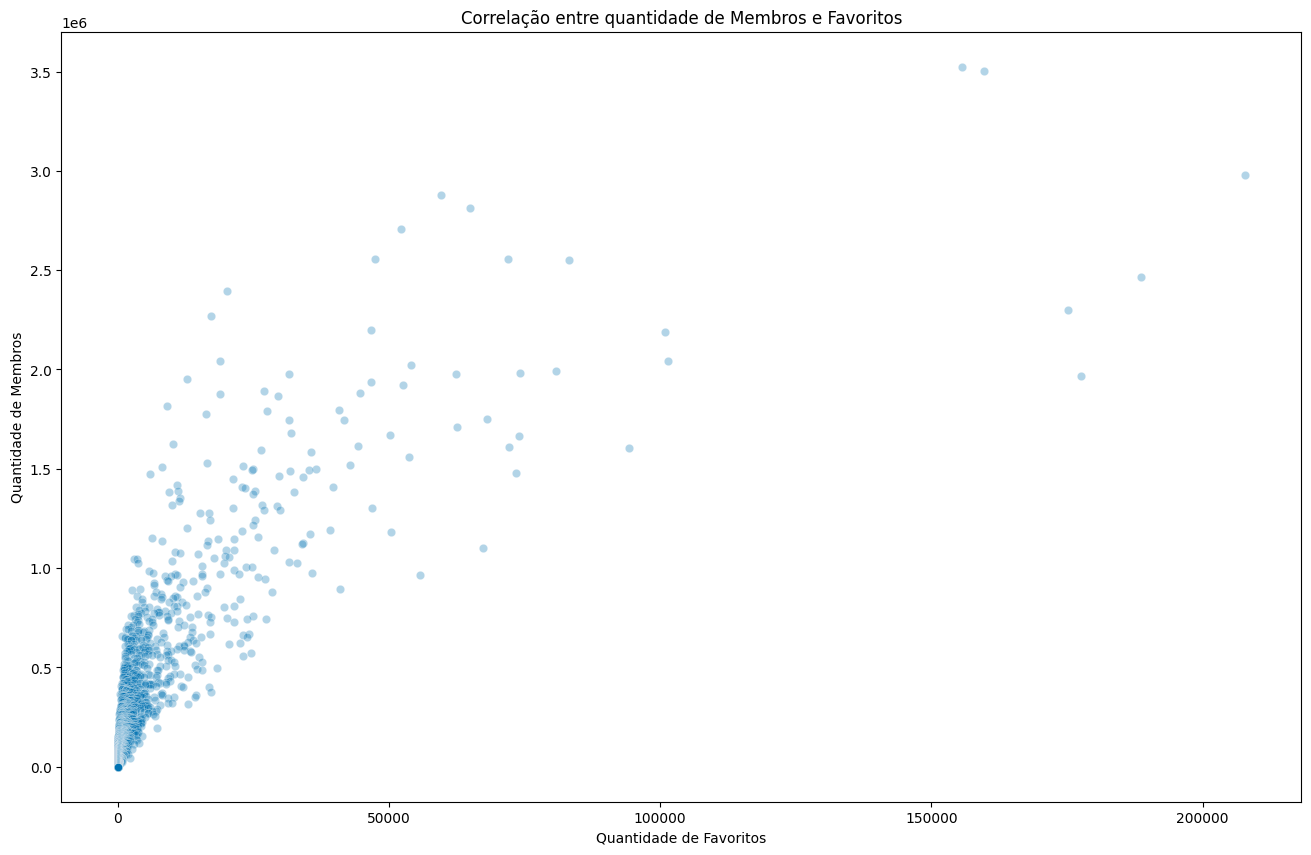

In [ ]:
plot = sns.scatterplot(
    df_my_anime_list[["Members", "Favorites"]],
    x = df_my_anime_list["Favorites"],
    y = df_my_anime_list["Members"],
    alpha = 0.3
)

plot.set(title = "Correlação entre quantidade de Membros e Favoritos")
plot.set_ylabel("Quantidade de Membros")
plot.set_xlabel("Quantidade de Favoritos")

plt.show()

Ao fazer o plot de Membros por Score, não conseguimos ver uma relação muito clara entre os dois:

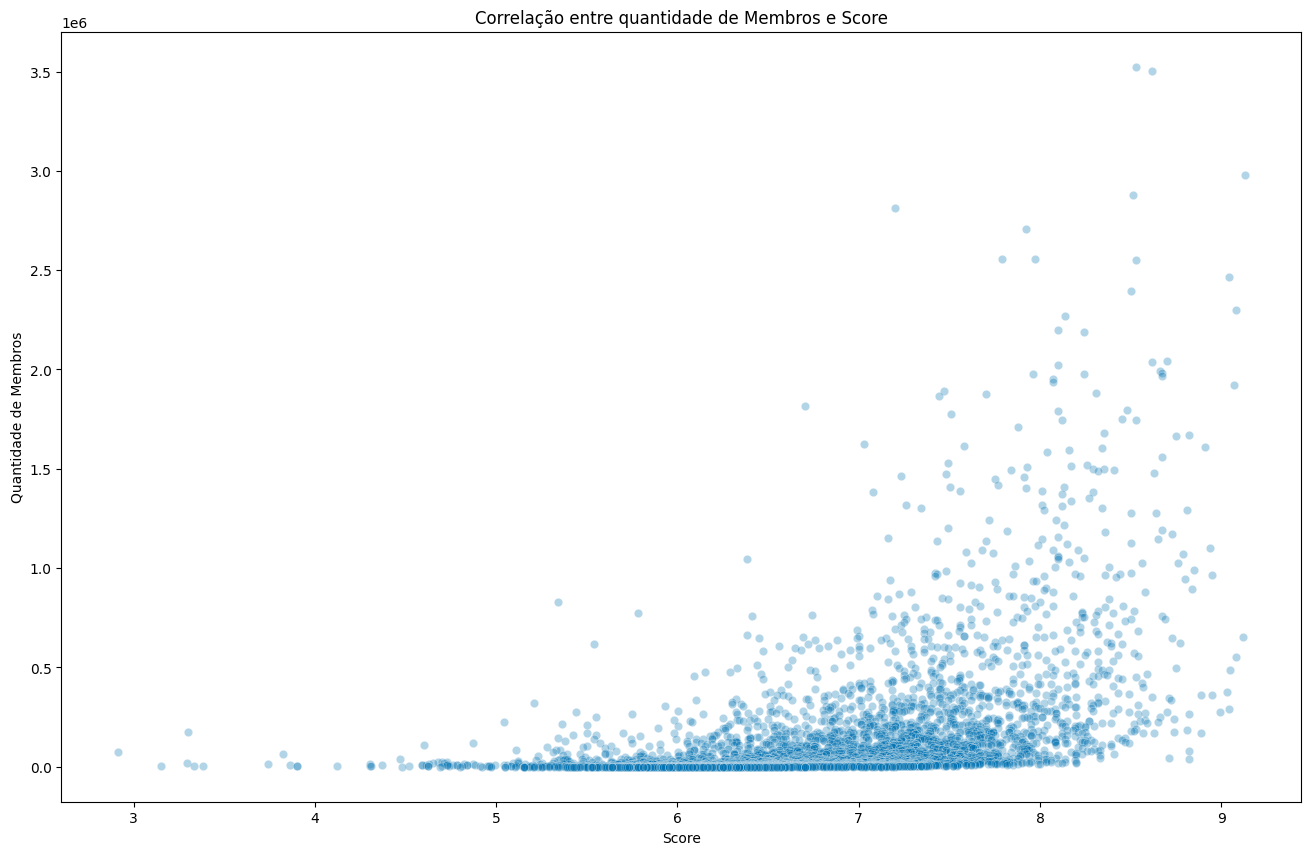

In [ ]:
plot = sns.scatterplot(
    df_my_anime_list[["Members", "Score"]],
    x = df_my_anime_list["Score"],
    y = df_my_anime_list["Members"],
    alpha = 0.3
)

plot.set(title = "Correlação entre quantidade de Membros e Score")
plot.set_ylabel("Quantidade de Membros")
plot.set_xlabel("Score")

plt.show()

Ao fazer o plot de Membros por Score, não conseguimos ver uma relação muito clara entre os dois. Contudo, se utilizarmos o ranking da Popularidade pelo Score, conseguimos ver uma relação mais clara:

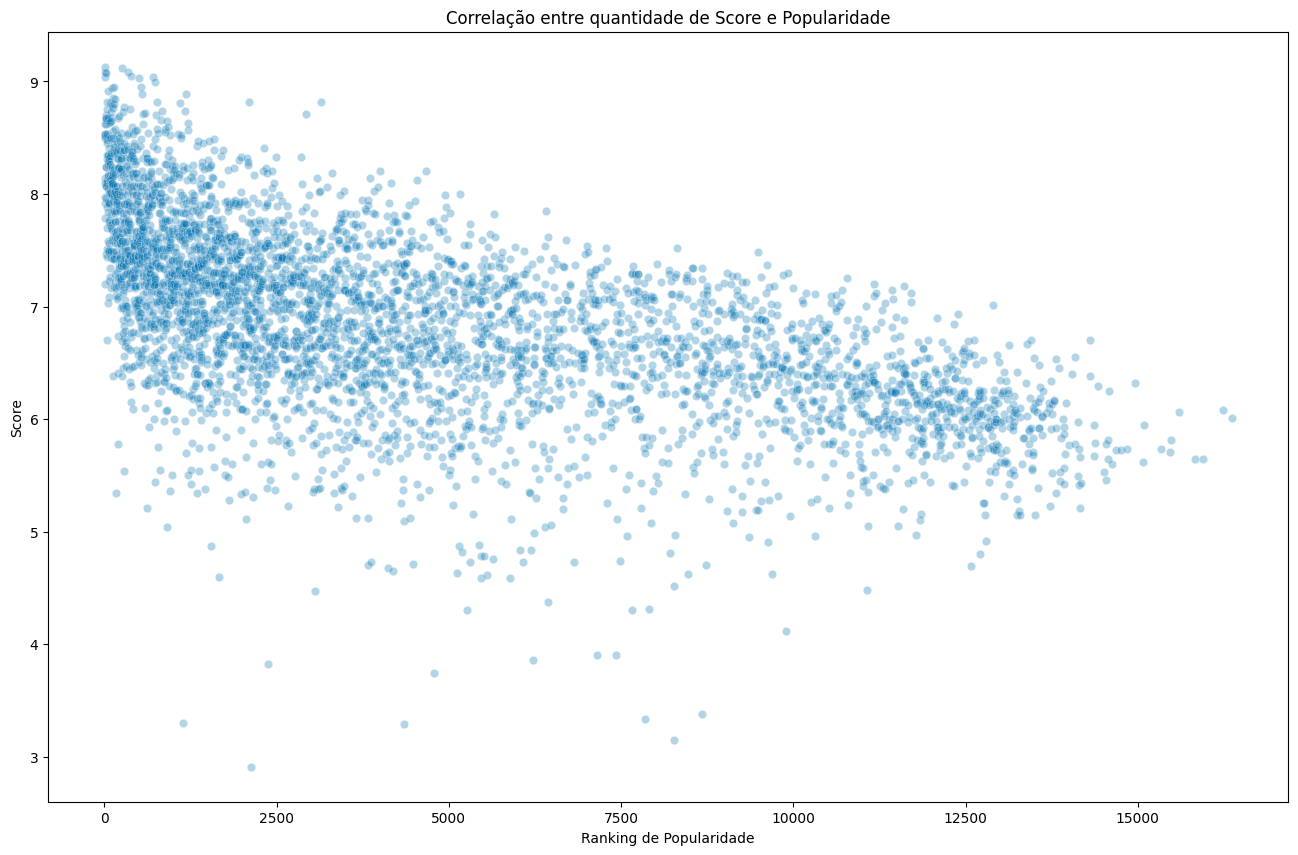

In [ ]:
plot = sns.scatterplot(
    df_my_anime_list[["Score", "Popularity"]],
    x = df_my_anime_list["Popularity"],
    y = df_my_anime_list["Score"],
    alpha = 0.3
)

plot.set(title = "Correlação entre quantidade de Score e Popularidade")
plot.set_ylabel("Score")
plot.set_xlabel("Ranking de Popularidade")

plt.show()

Com isso, vemos uma tendência dos animes mais populares a ter uma pontuação maior.

Agora que já verificamos as relações entre as variáveis numéricas, podemos começar a testar os modelos com elas e as variáveis categóricas.

## Testando Modelos

Primeiro iremos definir algumas funções que irão auxiliar testar diferentes conjuntos de variáveis de predição:

In [ ]:
# Adapta do dataframe para ter apenas informações relevantes para as regressões
def criar_df_para_regressao():
  df_referencia = criar_dataframe_com_todos_grupos_separados()

  df_regressao = df_referencia[['Demographics', 'Themes', 'Genres', 'Members', 'Favorites', 'Score']].copy()
  df_regressao = df_regressao[(df_regressao['Demographics'] != 'Unknown') & (df_regressao['Themes'] != 'Unknown') & (df_regressao['Genres'] != 'Unknown')]
  df_regressao['Score'] = df_regressao['Score'].fillna(0)

  return df_regressao

In [ ]:
def z_normalizar(coluna):
  return (coluna - coluna.mean()) / coluna.std(ddof = 1)

Como iremos lidar com variáveis categóricas como "Themes", "Genres" e "Demographics", nós precisamos converê-las para que possam ser usadas no modelo de regressão.

Para isso, iremos utilizar o One Hot Enconding, que fará um mapeamento de cada uma dessa variável categórica a valores (semelhante a uma tabela binária):

In [ ]:
def one_hot_encoding_para(df, coluna):
  dummies = pd.get_dummies(df[coluna])

  df_encoding = pd.concat([df, dummies], axis = 1)
  df_encoding = df_encoding.drop([coluna], axis = 1)

  return df_encoding

Um exemplo de mapeamento seria o seguinte para as demografias:

In [ ]:
df_teste_one_hot_encoding = criar_df_para_regressao()
one_hot_encoding_para(df_teste_one_hot_encoding, 'Demographics')

Themes   Genres  Members  Favorites  Score  Josei  Kids  \
0                 Gore   Action  3524109     155695  8.531      0     0   
1                 Gore    Drama  3524109     155695  8.531      0     0   
2             Military   Action  3524109     155695  8.531      0     0   
3             Military    Drama  3524109     155695  8.531      0     0   
4             Survival   Action  3524109     155695  8.531      0     0   
...                ...      ...      ...        ...    ...    ...   ...   
18011  Anthropomorphic  Fantasy       15          0  0.000      0     1   
18012  Anthropomorphic  Fantasy       15          0  0.000      0     1   
18014  Anthropomorphic  Fantasy       15          0  0.000      0     1   
18016  Anthropomorphic  Fantasy       15          0  0.000      0     1   
18017  Anthropomorphic  Fantasy       15          0  0.000      0     1   

       Seinen  Shoujo  Shounen  
0           0       0        1  
1           0       0        1  
2           0       0        1  
3           0       0        1  
4           0       0        1  
...       ...     ...      ...  
18011       0       0        0  
18012       0       0        0  
18014       0       0        0  
18016       0       0        0  
18017       0       0        0  

[5735 rows x 10 columns]

Assim, é possível notar que, para cada valor diferente da variável categórica, haverá uma nova coluna indicando 1 ou 0, caso aquela linha pertença a demografia ou não, respectivamente.

Por fim, temos a função para criar as diferentes regressões que iremos testar. No caso, iremos utilizar o método OLS da Statsmodels:

In [ ]:
def gerar_regrecao(df_regressao):
  # Devemos z-normalizar as colunas numéricas
  df_regressao['Score'] = z_normalizar(df_regressao['Score'])
  df_regressao['Favorites'] = z_normalizar(df_regressao['Favorites'])
  df_regressao['Members'] = z_normalizar(df_regressao['Members'])

  # Gerar modelo da regressão com Stats Model
  variaveis_predicao = df_regressao.drop(['Members'], axis = 1)
  variavel_resposta = df_regressao['Members']

  variaveis_predicao = sm.add_constant(variaveis_predicao)
  modelo = sm.OLS(variavel_resposta, variaveis_predicao).fit()

  print(modelo.summary())

  # Código equivalente para gerar utilizando sklearn
  # modelo = LinearRegression()
  # modelo.fit(variaveis_predicao, variavel_resposta)

  # print(modelo.predict(variaveis_predicao))
  # print(modelo.score(variaveis_predicao, variavel_resposta))

  return modelo

### Regressão com todas características

Membros = Favoritos + Socre + Temas + Genero + Demografia

A primeira regressão que iremos testar é uma com todas as variáveis numéricas e categóricas, que estamos considerando.

In [ ]:
def criar_regressao_completa():
  df_regressao = criar_df_para_regressao()

  df_regressao = one_hot_encoding_para(df_regressao, 'Demographics')
  df_regressao = df_regressao.drop(['Kids'], axis = 1)

  df_regressao = one_hot_encoding_para(df_regressao, 'Genres')
  df_regressao = df_regressao.drop(['Avant Garde'], axis = 1)

  df_regressao = one_hot_encoding_para(df_regressao, 'Themes')
  df_regressao = df_regressao.drop(['Magical Sex Shift'], axis = 1)

  return gerar_regrecao(df_regressao)

In [ ]:
modelo_completo = criar_regressao_completa()

                            OLS Regression Results                            
Dep. Variable:                Members   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     207.2
Date:                Thu, 30 Nov 2023   Prob (F-statistic):               0.00
Time:                        23:20:08   Log-Likelihood:                -4436.4
No. Observations:                5735   AIC:                             9019.
Df Residuals:                    5662   BIC:                             9505.
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.4650      0.548  

Devido ao alto valor de "t" e o baixo valor de "P>|t|", além dos intervalos de confiânça não centrados em zero, podemos ver como as variáveis numéricas "Score" e "Favorites" possuem alta relevância para o modelo.

Por outro lado, as variáveis categóricas ficam um pouco defícil de serem análisadas como um todo. Para isso, iremos fazer uma regressão para cada uma separadamente e iremos compará-los.

**Observação**: Um detalhe importante é remover uma coluna ao fazer o One Hot Enconding a fim de não ter variáveis multicolineares. Caso não fizéssemos isso, haveria um aviso na parte de Notes. No caso, optamos por remover sempre a coluna que seria menos relevate para o modelo. O critério de remoção foram aquelas qeu que possuem menos animes associados a eles.

### Regressão com Temas

Membros = Favoritos + Score + Temas

In [ ]:
def criar_regressao_temas():
  df_regressao = criar_df_para_regressao()

  # Como são só Temas, vamos remover as colunas 'Demographics', 'Genres'
  df_regressao = df_regressao.drop(['Demographics', 'Genres'], axis = 1)
  df_regressao = one_hot_encoding_para(df_regressao, 'Themes')

  # Para evitar multi-colinearidade devemos remover uma coluna
  # Iremos remover a coluna com o Tema menos comum
  df_regressao = df_regressao.drop(['Magical Sex Shift'], axis = 1)

  return gerar_regrecao(df_regressao)

In [ ]:
modelo_regressao_temas = criar_regressao_temas()

                            OLS Regression Results                            
Dep. Variable:                Members   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     280.6
Date:                Thu, 30 Nov 2023   Prob (F-statistic):               0.00
Time:                        23:20:09   Log-Likelihood:                -4530.0
No. Observations:                5735   AIC:                             9164.
Df Residuals:                    5683   BIC:                             9510.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1657      0.130  

Ao criar um modelo com apenas os Temas de variáveis categóricas, vemos que ele se aproxima muito do modelo original, com um R² = 0.716. Assim, é possível notar que os temas possuem uma relevância para o modelo.

### Regressão com Gêneros

Membros = Favoritos + Score + Generos

In [ ]:
def criar_regressao_generos():
  df_regressao = criar_df_para_regressao()

  # Como são só Temas, vamos remover as colunas 'Demographics', 'Themes'
  df_regressao = df_regressao.drop(['Demographics', 'Themes'], axis = 1)
  df_regressao = one_hot_encoding_para(df_regressao, 'Genres')

  # Para evitar multi-colinearidade devemos remover uma coluna
  # Iremos remover a coluna com o Tema menos comum
  df_regressao = df_regressao.drop(['Avant Garde'], axis = 1)

  return gerar_regrecao(df_regressao)

In [ ]:
modelo_regressao_generos = criar_regressao_generos()

                            OLS Regression Results                            
Dep. Variable:                Members   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     587.6
Date:                Thu, 30 Nov 2023   Prob (F-statistic):               0.00
Time:                        23:20:09   Log-Likelihood:                -5031.6
No. Observations:                5735   AIC:                         1.010e+04
Df Residuals:                    5715   BIC:                         1.024e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2278      0.583      0.391

Neste caso, por mais que tenhamos um R² razoável, é possível ver que todos os gêneros possuem intervalos de confiânça centrados em zero e que variam entre valores positivos e negativos.

Além disso, verificamos que o valor "t" é bem baixo e o "P>|t|" é muito alto, indicando que essas variáveis não possuem muita influência no modelo.

Assim, podemos desconsiderar os gêneros no modelo final.

### Regressão com Demografias

Membros = Favoritos + Score + Demografia

In [ ]:
def criar_regressao_demografias():
  df_regressao = criar_df_para_regressao()

  # Como são só Temas, vamos remover as colunas 'Themes', 'Genres'
  df_regressao = df_regressao.drop(['Themes', 'Genres'], axis = 1)
  df_regressao = one_hot_encoding_para(df_regressao, 'Demographics')

  # Para evitar multi-colinearidade devemos remover uma coluna
  # Iremos remover a coluna com o Tema menos comum
  df_regressao = df_regressao.drop(['Kids'], axis = 1)

  return gerar_regrecao(df_regressao)

In [ ]:
modelo_regressao_demografias = criar_regressao_demografias()

                            OLS Regression Results                            
Dep. Variable:                Members   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     1820.
Date:                Thu, 30 Nov 2023   Prob (F-statistic):               0.00
Time:                        23:20:09   Log-Likelihood:                -5077.6
No. Observations:                5735   AIC:                         1.017e+04
Df Residuals:                    5728   BIC:                         1.022e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1257      0.029     -4.299      0.0

Por fim, temos as demografias, em que os seus coeficientes demonstram que quando as elas são voltadas para o público feminino a quantidade de membros tende a ser menor.

### Regressão final

Membros = Favoritos + Score + Temas + Demografia

Então, acreditamos que seja interessante utilizar as variáveis categóricas de temas e demografia para tentar prever a quantidade de membros de um anime.

In [ ]:
def criar_regressao_final():
  df_regressao = criar_df_para_regressao()
  df_regressao = df_regressao.drop(['Genres'], axis = 1)

  df_regressao = one_hot_encoding_para(df_regressao, 'Demographics')
  df_regressao = df_regressao.drop(['Kids'], axis = 1)

  df_regressao = one_hot_encoding_para(df_regressao, 'Themes')
  df_regressao = df_regressao.drop(['Magical Sex Shift'], axis = 1)

  return gerar_regrecao(df_regressao)

In [ ]:
modelo_regressao_final = criar_regressao_final()

                            OLS Regression Results                            
Dep. Variable:                Members   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     267.0
Date:                Thu, 30 Nov 2023   Prob (F-statistic):               0.00
Time:                        23:20:09   Log-Likelihood:                -4475.4
No. Observations:                5735   AIC:                             9063.
Df Residuals:                    5679   BIC:                             9435.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2651      0.132  

### Regressão apenas com valores-t mais relevantes

Podemos fazer mais um ajuste na regressão, que é eleminar as categorias desnecessárias das Demografias e Temas.

Ao remover aquelas que possuem "t" valor baixo e "P>|t|", além de intervalaos de confiânça variando entre os números positivos e negativos, obtemos a seguinte regressão:

In [ ]:
def criar_regressao_valores_t_relevantes():
  df_regressao = criar_df_para_regressao()
  df_regressao = df_regressao.drop(['Genres'], axis = 1)

  df_regressao = one_hot_encoding_para(df_regressao, 'Demographics')
  df_regressao = df_regressao.drop(['Kids'], axis = 1)

  df_regressao = one_hot_encoding_para(df_regressao, 'Themes')
  df_regressao = df_regressao.drop(['Magical Sex Shift'], axis = 1)

  df_regressao = df_regressao[['Members', 'Favorites', 'Score', 'Survival', 'Gore', 'School', 'Super Power', 'Harem', 'Psychological', 'Romantic Subtext', 'High Stakes Game', 'Shounen', 'Shoujo']].copy()
  return gerar_regrecao(df_regressao)

In [ ]:
modelo_valores_t_relevantes = criar_regressao_valores_t_relevantes()

                            OLS Regression Results                            
Dep. Variable:                Members   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     1142.
Date:                Thu, 30 Nov 2023   Prob (F-statistic):               0.00
Time:                        23:20:10   Log-Likelihood:                -4632.7
No. Observations:                5735   AIC:                             9291.
Df Residuals:                    5722   BIC:                             9378.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1215      0.013  

## Avaliando o Modelo

Nós podemos avaliar a qualidade de um módelo a partir de duas métricas:

* R²: Mede o quanto que a variância da variável dependente pode ser explicada pelas variáveis independentes.
* MSE: O quão distântes estão os pontos da regressão em média. Quanto menor o valor, menor é o erro e melhor a reta captura os pontos.

Ao comparar os valores do R² dos modelos gerados, temos o seguinte:

In [ ]:
print("Os valores de R² para cada modelo gerado foram os seguintes:")
print(f"\t* Modelo completo: {modelo_completo.rsquared}")
print(f"\t* Modelo apenas com Temas: {modelo_regressao_temas.rsquared}")
print(f"\t* Modelo apenas com Gêneros: {modelo_regressao_generos.rsquared}")
print(f"\t* Modelo apenas com Demografias: {modelo_regressao_demografias.rsquared}")
print(f"\t* Modelo Final, com Temas e Demografias: {modelo_regressao_final.rsquared}")
print(f"\t* Modelo apenas com valores 't' relevantes: {modelo_valores_t_relevantes.rsquared}")

Os valores de R² para cada modelo gerado foram os seguintes:
	* Modelo completo: 0.7248864240185722
	* Modelo apenas com Temas: 0.7157571943229346
	* Modelo apenas com Gêneros: 0.6614279636301847
	* Modelo apenas com Demografias: 0.6559422633279886
	* Modelo Final, com Temas e Demografias: 0.7211176470056522
	* Modelo apenas com valores 't' relevantes: 0.705391742472731


Com isso, vemos que os modelos que incluem os temas são os mais próximos do modelo completo.

No entanto, o alto valor R² indica que todos os modelos são interessantes de serem utilizados. Além disso, podemos lembrar que todos obtiveram um valor alto do "f-statistic" nos relatórios gerados anteriormente, que indica que a hipótese nula (considera um modelo sem variáveis preditivas) para esses modelos é regeitada.

Já considerando, os erros quadrados (MSE) temos que:

In [ ]:
print("Os valores do MSE para cada modelo gerado foram os seguintes:")
print(f"\t* Modelo completo: {modelo_completo.mse_model}")
print(f"\t* Modelo apenas com Temas: {modelo_regressao_temas.mse_model}")
print(f"\t* Modelo apenas com Gêneros: {modelo_regressao_generos.mse_model}")
print(f"\t* Modelo apenas com Demografias: {modelo_regressao_demografias.mse_model}")
print(f"\t* Modelo Final, com Temas e Demografias: {modelo_regressao_final.mse_model}")
print(f"\t* Modelo apenas com valores 't' relevantes: {modelo_valores_t_relevantes.mse_model}")

Os valores do MSE para cada modelo gerado foram os seguintes:
	* Modelo completo: 57.72914937947904
	* Modelo apenas com Temas: 80.47356376956286
	* Modelo apenas com Gêneros: 199.61199702397252
	* Modelo apenas com Demografias: 626.8621563204475
	* Modelo Final, com Temas e Demografias: 75.1797925078256
	* Modelo apenas com valores 't' relevantes: 337.0596876115532


Nesse caso, é possível notar que o valor do erro aumenta considerávelmente nos modelos que desconsideram os temas, incluindo o que inclui apenas os maiores valores "t".

Assim, o modelo que possui menos erro entre todos é o Modelo Completo:

> Membros = Favoritos + Score + Temas + Demografia + Genero

Por outro lado, é possível notar que ao remover apenas os Gêneros do Modelo Completo, o erro quadrado não tem um aumento significativo. Isso nos leva ao nosso Modelo Final:

> Membros = Favoritos + Score + Temas + Demografia